In [42]:
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

## Import Fluxes

## Upscaling of Biomass Growth Time-Series

In [2]:
hdf5_file = h5py.File(h5_files[10], 'r')
# Fetching the first five time steps
time_n = list(hdf5_file.keys())[2:]
time_steps = np.linspace(0,len(time_n),len(time_n)+1)
time_steps

NameError: name 'h5py' is not defined

In [3]:
import re

# List of strings
time_strings = time_n

# Function to extract the numerical value from the string
def extract_numeric_value(s):
    # Find the pattern in the string
    match = re.search(r'\d+\.\d+E\+\d+', s)
    # Convert to float and return
    return float(match.group()) if match else 0

# Sort the list based on the extracted numeric value
sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

# Display the first few sorted items as a sample
sorted_time_strings[:10]  # Displaying only the first 10 items for brevity

sorted_time_strings[-95:-20]

NameError: name 'time_n' is not defined

In [28]:
sorted_time_strings

['Time:  0.00000E+00 h',
 'Time:  4.80000E+01 h',
 'Time:  9.60000E+01 h',
 'Time:  1.44000E+02 h',
 'Time:  1.92000E+02 h',
 'Time:  2.40000E+02 h',
 'Time:  2.88000E+02 h',
 'Time:  3.36000E+02 h',
 'Time:  3.84000E+02 h',
 'Time:  4.32000E+02 h',
 'Time:  4.80000E+02 h',
 'Time:  5.28000E+02 h',
 'Time:  5.76000E+02 h',
 'Time:  6.24000E+02 h',
 'Time:  6.72000E+02 h',
 'Time:  7.20000E+02 h',
 'Time:  7.68000E+02 h',
 'Time:  8.16000E+02 h',
 'Time:  8.64000E+02 h',
 'Time:  9.12000E+02 h',
 'Time:  9.60000E+02 h',
 'Time:  1.00800E+03 h',
 'Time:  1.05600E+03 h',
 'Time:  1.10400E+03 h',
 'Time:  1.15200E+03 h',
 'Time:  1.20000E+03 h',
 'Time:  1.24800E+03 h',
 'Time:  1.29600E+03 h',
 'Time:  1.34400E+03 h',
 'Time:  1.39200E+03 h',
 'Time:  1.44000E+03 h',
 'Time:  1.48800E+03 h',
 'Time:  1.53600E+03 h',
 'Time:  1.58400E+03 h',
 'Time:  1.63200E+03 h',
 'Time:  1.68000E+03 h',
 'Time:  1.72800E+03 h',
 'Time:  1.77600E+03 h',
 'Time:  1.82400E+03 h',
 'Time:  1.87200E+03 h',


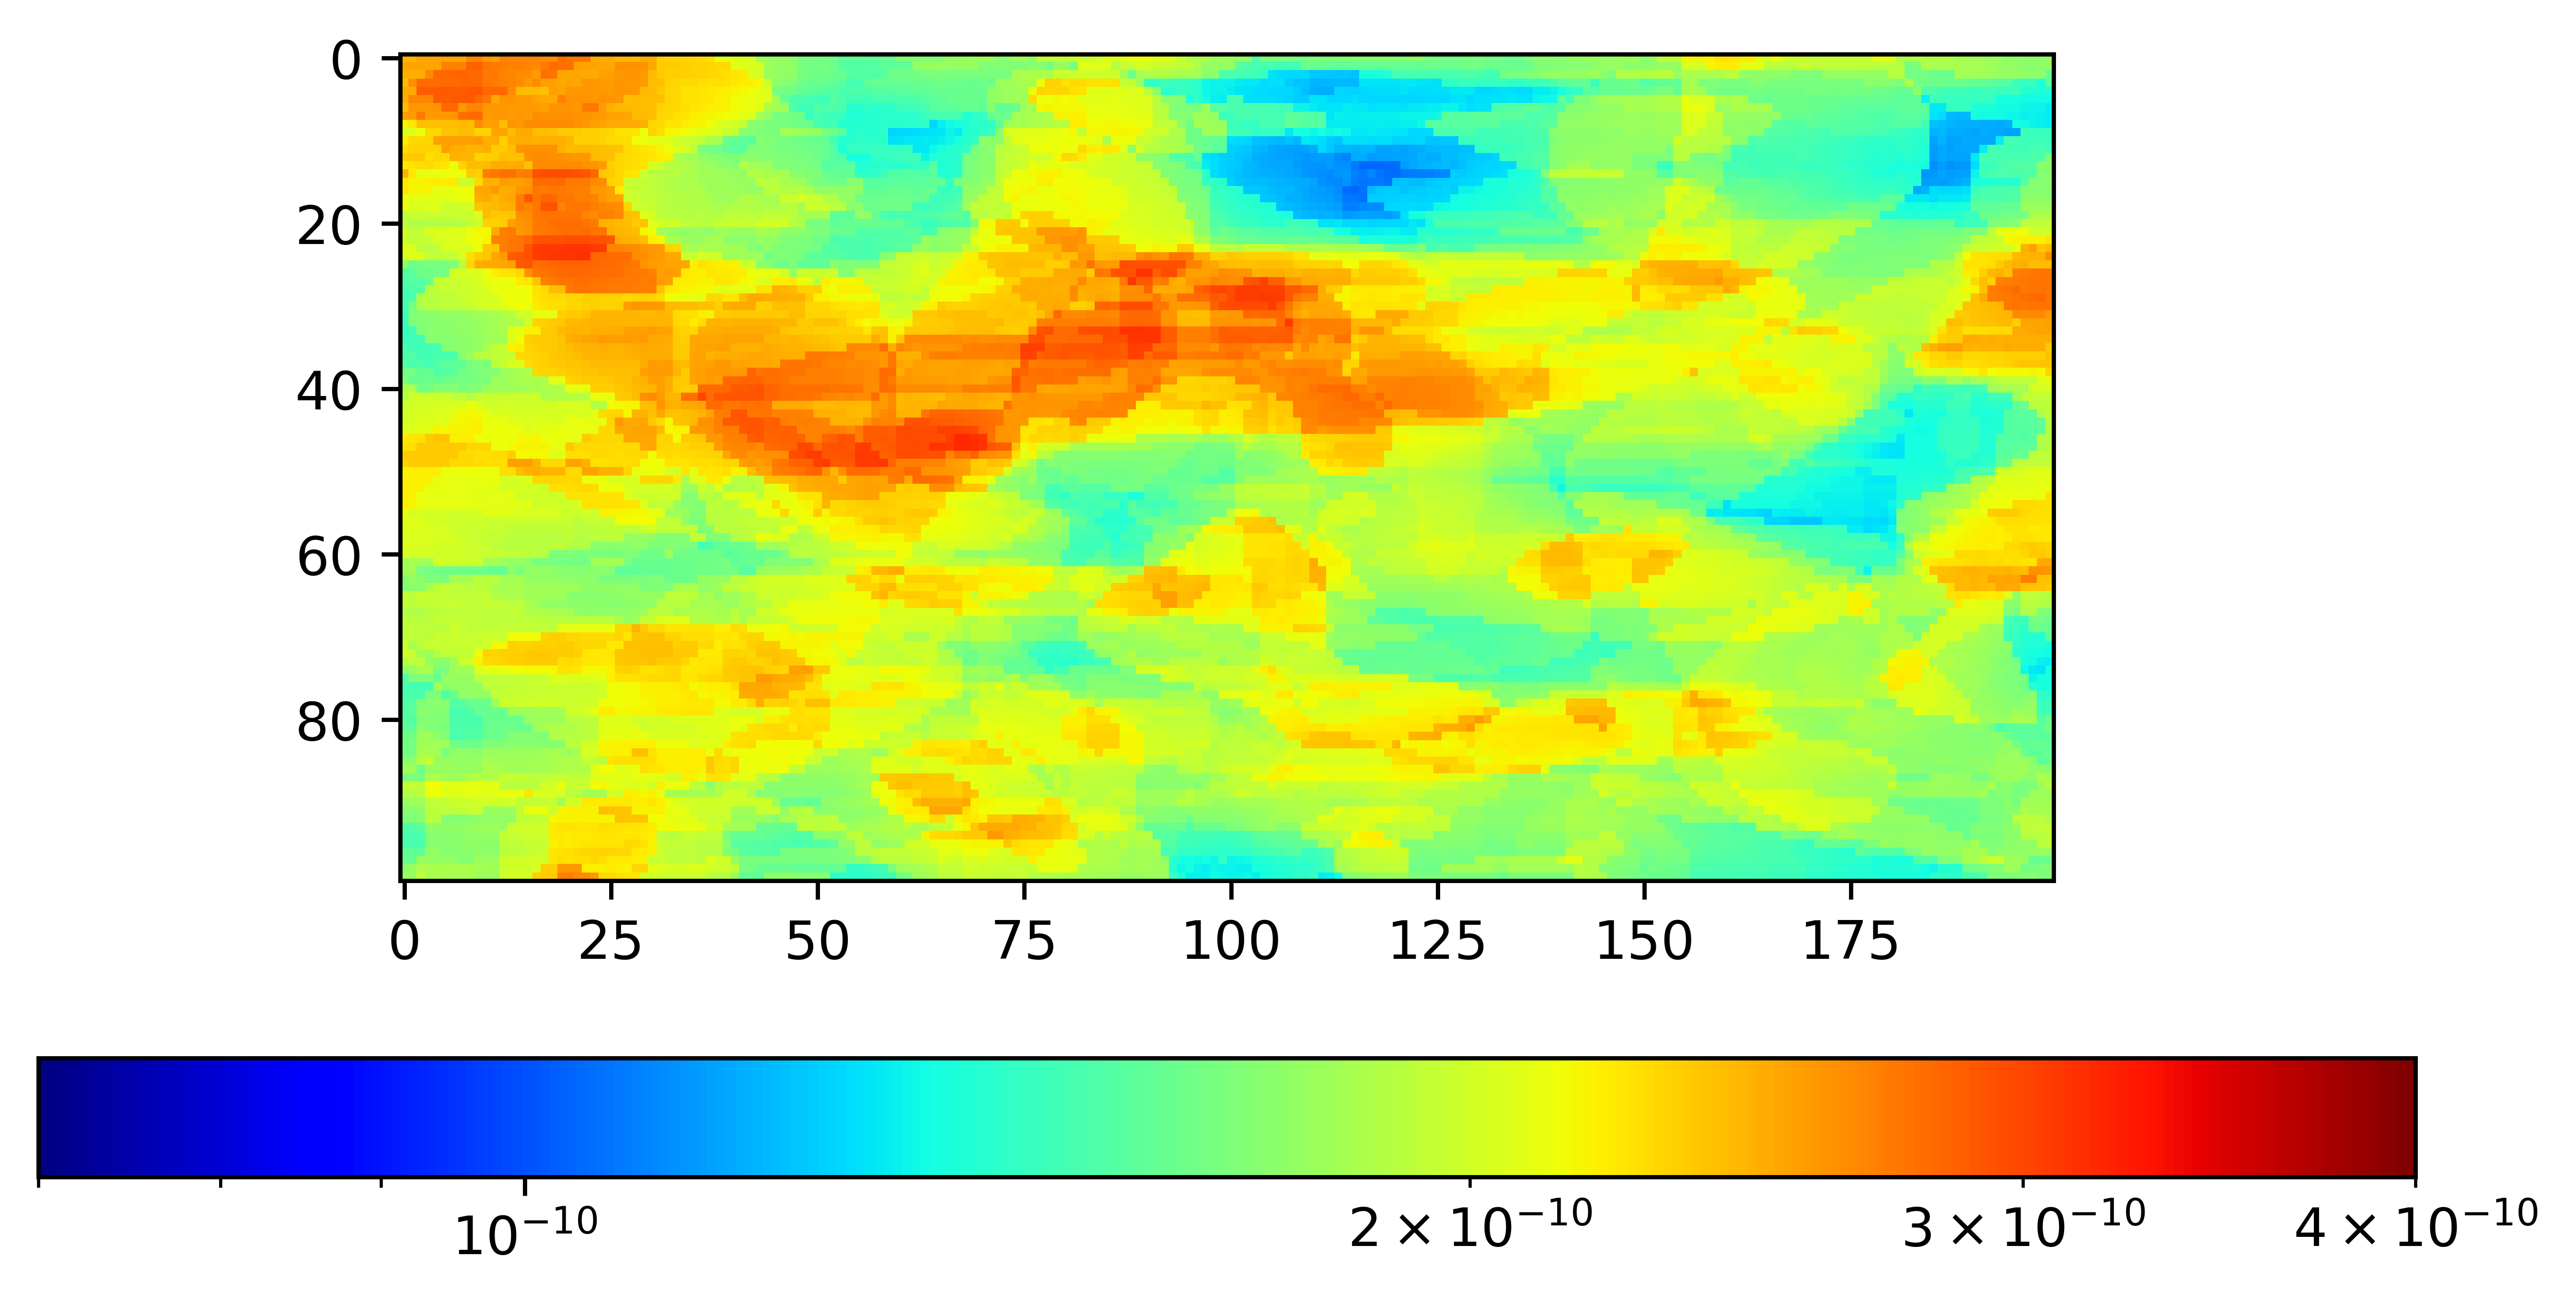

In [87]:
import matplotlib.colors as colors
features=[#'Chubbite_Rate [mol_m^3_sec]',
  #'Chubbite_VF [m^3 mnrl_m^3 bulk]',
  # 'Liquid X-Velocity [m_per_h]',
  # 'Liquid Y-Velocity [m_per_h]',
  #'Liquid Z-Velocity [m_per_h]',
  #'Liquid_Pressure [Pa]',
  #'Liquid_Saturation',
  #'Material_ID',
   'Permeability_X [m^2]',
  #'Porosity',
  #'Temperature [C]',
  #'Total_CO2 [M]',
  # 'Total_Cr(VI) [M]',
  #'Total_O2 [M]',
  #'Total_biocide [M]',
  #'Total_ethanol [M]',
  # 'Total_molasses [M]',
  #'biomass [mol_m^3]',
]

for i in range(len(h5_files)):
    # plt.figure(figsize=(6,3),dpi=200)
    hdf5_file = h5py.File(h5_files[i], 'r')
    # dataset = hdf5_file[time_step][features[0]]
    for t_idx, time_step in enumerate(sorted_time_strings):  # Skipping the first two non-time-step groups
        dataset = hdf5_file[time_step][features[0]]
        if t_idx==0:
            data = dataset[:]
        else:
            data = data+dataset[:]
    data = data/len(sorted_time_strings)
    if i==0:
        data2 = data
    else:
        data2 = data+data2
data2 = data2/len(h5_files)
    
            
    #time_step =sorted_time_strings[5]  # Skipping the first two non-time-step groups
plt.figure(figsize=(8,4),dpi=800)
plt.imshow(data2, cmap='jet',norm=colors.LogNorm(vmin=7e-11, vmax=4e-10))
cbar = plt.colorbar(orientation='horizontal')
    #cbar.set_label('Log scale')
plt.savefig('perm_avg.png')
#plt.close()
# plt.savefig('xvel'+str(i)+'.png')
    # plt.show() 

In [56]:
plt.close()

In [35]:
dataset[:]


array([[[-3.65929835e-05],
        [-9.72053406e-05],
        [-1.69032093e-04],
        ...,
        [-4.62354100e-01],
        [-7.41994440e-01],
        [-1.59637452e+00]],

       [[-3.63854626e-05],
        [-9.63718105e-05],
        [-1.67293947e-04],
        ...,
        [-3.39534376e-01],
        [-4.09930587e-01],
        [-4.33079235e-01]],

       [[-3.65671824e-05],
        [-9.53912321e-05],
        [-1.63422205e-04],
        ...,
        [-2.27690412e-01],
        [-2.17948270e-01],
        [-1.35513781e-01]],

       ...,

       [[-1.85262678e-01],
        [-3.29659366e-01],
        [-3.48941555e-01],
        ...,
        [ 1.29896061e+00],
        [ 1.23161901e+00],
        [ 6.96172694e-01]],

       [[-5.10580399e-01],
        [-5.89453355e-01],
        [-5.04751636e-01],
        ...,
        [ 1.86244502e+00],
        [ 2.18261746e+00],
        [ 1.90033946e+00]],

       [[-1.77480148e+00],
        [-1.01064415e+00],
        [-6.66781416e-01],
        ...,
        

## Get Scales

In [1]:
import h5py
import cv2
import torch
import os
#for upsampling files
#base_dir = '../../../input_files/'
#for upscaling files
base_dir = '../../one_deeper/input_files/'

f_dir = os.listdir(base_dir)
h5_files = []
h5_files2x = []

# Iterate over all files in the directory
## Upscaling
for filename in f_dir:
    if (filename.endswith(".h5")) & ((("1x" in filename))):
        h5_files.append(base_dir+filename)
    elif (filename.endswith(".h5")) & ((("10x" in filename))):
        h5_files2x.append(base_dir+filename)
## Upsampling        
# for filename in f_dir:
#     if (filename.endswith(".h5")) & ((("1xresolution" in filename))):
#         h5_files.append(base_dir+filename)
#     elif (filename.endswith(".h5")) & ((("2xresolution" in filename))):
#         h5_files2x.append(base_dir+filename)
h5_files

['../../one_deeper/input_files/gaining_17_22_1xscale.h5',
 '../../one_deeper/input_files/gaining_22_16_1xscale.h5',
 '../../one_deeper/input_files/gaining_25_15_1xscale.h5',
 '../../one_deeper/input_files/gaining_27_7_1xscale.h5',
 '../../one_deeper/input_files/gaining_30_15_1xscale.h5',
 '../../one_deeper/input_files/gaining_33_24_1xscale.h5',
 '../../one_deeper/input_files/gaining_34_6_1xscale.h5',
 '../../one_deeper/input_files/gaining_36_11_1xscale.h5',
 '../../one_deeper/input_files/gaining_38_16_1xscale.h5',
 '../../one_deeper/input_files/gaining_40_17_1xscale.h5',
 '../../one_deeper/input_files/gaining_41_12_1xscale.h5',
 '../../one_deeper/input_files/gaining_42_11_1xscale.h5',
 '../../one_deeper/input_files/gaining_46_17_1xscale.h5',
 '../../one_deeper/input_files/gaining_49_10_1xscale.h5',
 '../../one_deeper/input_files/gaining_49_24_1xscale.h5',
 '../../one_deeper/input_files/gaining_51_10_1xscale.h5',
 '../../one_deeper/input_files/hanford_diff_lose_14_10_1xscale.h5',
 '../.

In [3]:
h5_files2x

['../../one_deeper/input_files/gaining_17_22_10xscale.h5',
 '../../one_deeper/input_files/gaining_22_16_10xscale.h5',
 '../../one_deeper/input_files/gaining_25_15_10xscale.h5',
 '../../one_deeper/input_files/gaining_27_7_10xscale.h5',
 '../../one_deeper/input_files/gaining_30_15_10xscale.h5',
 '../../one_deeper/input_files/gaining_33_24_10xscale.h5',
 '../../one_deeper/input_files/gaining_34_6_10xscale.h5',
 '../../one_deeper/input_files/gaining_36_11_10xscale.h5',
 '../../one_deeper/input_files/gaining_38_16_10xscale.h5',
 '../../one_deeper/input_files/gaining_40_17_10xscale.h5',
 '../../one_deeper/input_files/gaining_41_12_10xscale.h5',
 '../../one_deeper/input_files/gaining_42_11_10xscale.h5',
 '../../one_deeper/input_files/gaining_46_17_10xscale.h5',
 '../../one_deeper/input_files/gaining_49_10_10xscale.h5',
 '../../one_deeper/input_files/gaining_49_24_10xscale.h5',
 '../../one_deeper/input_files/gaining_51_10_10xscale.h5',
 '../../one_deeper/input_files/hanford_diff_lose_14_10_10x

In [4]:
import numpy as np
def get_modified_time(filename):
    return os.path.getmtime(filename)

# Sorting the list of filenames based on the last modified time
h5_files = np.sort(h5_files)#sorted(h5_files, key=get_modified_time)#[0:-1]
h5_files=h5_files[ [0,  1,  5,  6, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61,
        62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
        79]]

#h5_files_train = np.sort(h5_files_train)#sorted(h5_files_train, key=get_modified_time)
h5_files2x = np.sort(h5_files2x)
h5_files2x=h5_files2x[ [0,  1,  5,  6, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61,
        62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
        79]]
hdf5_file = h5py.File(h5_files[0], 'r')
# Fetching the first five time steps
time_n = list(hdf5_file.keys())[2:]
time_steps = np.linspace(0,len(time_n),len(time_n)+1)
import re

# List of strings
time_strings = time_n

# Function to extract the numerical value from the string
def extract_numeric_value(s):
    # Find the pattern in the string
    match = re.search(r'\d+\.\d+E\+\d+', s)
    # Convert to float and return
    return float(match.group()) if match else 0

# Sort the list based on the extracted numeric value
sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

In [5]:
len(h5_files)

69

In [6]:
features=[#'Chubbite_Rate [mol_m^3_sec]',
  #'Chubbite_VF [m^3 mnrl_m^3 bulk]',
  'Liquid X-Velocity [m_per_h]',
  'Liquid Y-Velocity [m_per_h]',
  #'Liquid Z-Velocity [m_per_h]',
  'Liquid_Pressure [Pa]',
  #'Liquid_Saturation',
  #'Material_ID',
  'Permeability_X [m^2]',
  'Porosity',
  'Temperature [C]',
  #'Total_CO2 [M]',
  'Total_Cr(VI) [M]',
  #'Total_O2 [M]',
  #'Total_biocide [M]',
  #'Total_ethanol [M]',
  'Total_molasses [M]',
  'biomass [mol_m^3]',
]
num_time_steps = len(sorted_time_strings)
num_features = 1  # As observed from the dataset

# Initialize the final array with the desired shape [5, 100, 200, 19]


# Extracting and reshaping data from the first five time steps
perm_covar=[]
max_l=[]
growth_rates=[]
rate_c=[]
rate_d=[]
exp_b = []
scales = np.zeros([len(h5_files), len(features),4])
scale_t=np.zeros([num_time_steps,4])

for i in range(len(h5_files)):
    print (h5_files[i], h5_files2x[i])
    hdf5_file = h5py.File(h5_files[i], 'r')
    hdf5_file2x = h5py.File(h5_files2x[i], 'r')
    for f_idx, feature in enumerate(features):
        for t_idx, time_step in enumerate(sorted_time_strings):  # Skipping the first two non-time-step groups
            dataset = hdf5_file[time_step][feature]
            datay = hdf5_file2x[time_step][feature]
            #dataset = np.log(dataset[:,:,0]+1e-30)
            #datay = np.log(datay[:,:,0]+1e-30)

            scale_t[t_idx,0]=np.min(dataset)
            scale_t[t_idx,1]=np.max(dataset)
            scale_t[t_idx,2]=np.mean(dataset)
            scale_t[t_idx,3]=np.std(dataset)
                

        scales[i,f_idx,0] = np.min(scale_t[:,0])
        scales[i,f_idx,1] = np.max(scale_t[:,1])
        scales[i,f_idx,2] = np.mean(scale_t[:,2])
        scales[i,f_idx,3] = np.mean(scale_t[:,3])

../../one_deeper/input_files/gaining_17_22_1xscale.h5 ../../one_deeper/input_files/gaining_17_22_10xscale.h5
../../one_deeper/input_files/gaining_22_16_1xscale.h5 ../../one_deeper/input_files/gaining_22_16_10xscale.h5
../../one_deeper/input_files/gaining_33_24_1xscale.h5 ../../one_deeper/input_files/gaining_33_24_10xscale.h5
../../one_deeper/input_files/gaining_34_6_1xscale.h5 ../../one_deeper/input_files/gaining_34_6_10xscale.h5
../../one_deeper/input_files/gaining_42_11_1xscale.h5 ../../one_deeper/input_files/gaining_42_11_10xscale.h5
../../one_deeper/input_files/gaining_49_10_1xscale.h5 ../../one_deeper/input_files/gaining_49_10_10xscale.h5
../../one_deeper/input_files/hanford_diff_lose_14_10_1xscale.h5 ../../one_deeper/input_files/hanford_diff_lose_14_10_10xscale.h5
../../one_deeper/input_files/hanford_diff_lose_18_10_1xscale.h5 ../../one_deeper/input_files/hanford_diff_lose_18_10_10xscale.h5
../../one_deeper/input_files/hanford_diff_lose_27_7_1xscale.h5 ../../one_deeper/input_file

In [7]:
scales

array([[[-6.48974895e+00,  1.05872564e+01, -7.83121129e-03,
          7.26070032e-02],
        [-1.04636263e+01,  2.02425683e+00, -1.01205666e-02,
          7.19469233e-02],
        [-1.80676718e+01,  6.79976074e+01,  2.32222814e+01,
          1.56127924e+01],
        ...,
        [ 3.67103335e-14,  5.21364749e-05,  1.94056545e-05,
          8.68885948e-06],
        [ 9.98133762e-21,  2.38058947e-05,  8.76671043e-07,
          3.00210302e-06],
        [ 1.00000000e-10,  3.45195415e+02,  6.67325835e+00,
          3.14611884e+01]],

       [[-5.45599082e+00,  1.74527186e+00, -2.12416537e-02,
          7.13015759e-02],
        [-5.28625385e+00,  1.30475246e-01, -3.45884809e-02,
          7.97082734e-02],
        [-7.10041349e+00,  2.56539799e+02,  4.60289562e+01,
          5.11732682e+01],
        ...,
        [ 9.06660063e-14,  2.52027057e-05,  1.27995305e-05,
          3.99399425e-06],
        [ 9.97424849e-21,  1.37449795e-05,  1.00689782e-06,
          2.35526009e-06],
        [ 1.000

In [7]:
torch.tensor(scales)[:,:,2]

tensor([[1.9406e-05],
        [1.2800e-05],
        [2.2532e-06],
        [5.2410e-06],
        [1.5308e-05],
        [5.7228e-06],
        [6.9225e-06],
        [5.3150e-06],
        [9.3545e-07],
        [1.4788e-05],
        [1.6221e-06],
        [4.1669e-07],
        [1.3571e-05],
        [3.0248e-07],
        [5.1680e-06],
        [2.0833e-05],
        [3.2985e-05],
        [1.1744e-04],
        [2.8449e-06],
        [9.4420e-06],
        [1.2833e-05],
        [1.0662e-06],
        [2.6645e-06],
        [7.3494e-05],
        [8.4254e-06],
        [1.2772e-06],
        [1.9598e-05],
        [4.4745e-06],
        [3.2070e-05],
        [5.1673e-05],
        [1.4104e-05],
        [6.3230e-06],
        [2.6422e-06],
        [3.4217e-06],
        [4.8133e-05],
        [3.7787e-06],
        [2.3744e-05],
        [5.8026e-06],
        [4.8452e-06],
        [2.2962e-05],
        [1.3470e-05],
        [2.3008e-05],
        [3.8724e-06],
        [5.0256e-06],
        [7.2229e-06],
        [6

In [8]:
len(h5_files)

69

In [9]:
h5_files_train

NameError: name 'h5_files_train' is not defined

In [8]:
len(h5_files2x)

69

In [8]:
max_scales = np.zeros(len(features))
min_scales = np.zeros(len(features))
mean_scales = np.zeros(len(features))
std_scales = np.zeros(len(features))

for i in range(scales.shape[1]):
    min_scales[i] = np.min(scales[:,i,0])
    max_scales[i] = np.max(scales[:,i,1])
    mean_scales[i] = np.mean(scales[:,i,2])
    std_scales[i] = np.mean(scales[:,i,3])
max_scales

array([6.51166704e+02, 6.70824136e+02, 7.09918317e+03, 1.08025200e-09,
       6.00000000e-01, 2.49302853e+01, 7.57383822e-03, 5.45423235e-03,
       7.65376356e+02])

In [10]:
min_scales


array([-4.86049439e+02, -6.32481115e+02, -1.21386599e+03,  1.00000000e-15,
        1.00000000e-04,  4.83881797e+00,  9.97844362e-21,  9.97424849e-21,
        1.00000000e-10])

In [11]:
mean_scales
#x, y, p, k, phi, t, cr, mol, bio

array([-1.40701517e-02, -5.80191228e-02,  7.85688825e+02,  1.97543624e-10,
        1.26819436e-01,  1.15452275e+01,  1.39192349e-05,  8.05043454e-06,
        5.80345331e+01])

## Save as .pt for quick loading during training

In [13]:
# #For bio, use min-max 
# #For molasses, use min-max with MSLE loss
# fname='C:/Users/marcb/Desktop/pflotran_stomp/pflotran_stomp_input_v3.h5'
# hdf5_file = h5py.File(fname, 'r')
# # Fetching the first five time steps
# time_n = list(hdf5_file.keys())[2:]
# time_steps = np.linspace(0,len(time_n),len(time_n)+1)
# import re

# # List of strings
# time_strings = time_n

# # Function to extract the numerical value from the string
# def extract_numeric_value(s):
#     # Find the pattern in the string
#     match = re.search(r'\d+\.\d+E\+\d+', s)
#     # Convert to float and return
#     return float(match.group()) if match else 0

# # Sort the list based on the extracted numeric value
# sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

# hdf5_file = h5py.File(fname, 'r')
# y_uran = np.zeros((53, 56, 40, 43))
# for t_idx, time_step in enumerate(sorted_time_strings):  # Skipping the first two non-time-step groups
#     dataset = hdf5_file[time_step]['Total_UO2++ [M]']
#     y_uran[ t_idx, :, :, :] = dataset[:, :, :]

In [14]:
# plt.plot(np.mean(y_uran, axis=(1,2,3)))
# plt.ylabel('UO2++ [M]')
# plt.xlabel('Time (days)')


In [11]:
# Number of time steps and features to extract
#file_path = '/mnt/data/high_losing_42_11_1xscale.h5'
import h5py
import cv2
import torch

#h5_files_train = h5_files_train[0:5]
hdf5_file = h5py.File(h5_files[0], 'r')
# Fetching the first five time steps
time_n = list(hdf5_file.keys())[2:]
time_steps = np.linspace(0,len(time_n),len(time_n)+1)
import re

# List of strings
time_strings = time_n

# Function to extract the numerical value from the string
def extract_numeric_value(s):
    # Find the pattern in the string
    match = re.search(r'\d+\.\d+E\+\d+', s)
    # Convert to float and return
    return float(match.group()) if match else 0

# Sort the list based on the extracted numeric value
sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

# Inspecting the features present in each of these time steps
#features_per_time_step = {time_step: list(hdf5_file[time_step].keys()) for time_step in time_steps}


num_time_steps = len(sorted_time_strings)
num_features = len(features)  # As observed from the dataset

# Initialize the final array with the desired shape [5, 100, 200, 19]


# Extracting and reshaping data from the first five time steps
perm_covar=[]
max_l=[]
growth_rates=[]
rate_c=[]
rate_d=[]
exp_b = []
tag_scales = []
for i in range(0,len(h5_files)):
    hdf5_file = h5py.File(h5_files[i], 'r')
    hdf5_file2x = h5py.File(h5_files2x[i], 'r')
    y = np.zeros((num_time_steps, 100, 2000, num_features))
    x = np.zeros((num_time_steps, 100, 200, num_features))
    for t_idx, time_step in enumerate(sorted_time_strings):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features):
            #if ('molass' not in feature)&('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
            dataset = hdf5_file2x[time_step][feature]
            y[t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
            
            dataset = hdf5_file[time_step][feature]
            x[ t_idx, :, :, count] = dataset[:, :, 0]




    #x = np.log(x+1e-30)
    #y = np.log(y+1e-30)
    for j in range(x.shape[3]):
        # xmean = mean_scales[j]
        # xstd = std_scales[j]
        # x[:,:,:,j] = (x[:,:,:,j] - xmean)/(xstd)
        # y[:,:,:,j] = (y[:,:,:,j] - xmean)/(xstd)
        # x1[:,:,:,j] = (x1[:,:,:,j] - xmean)/(xstd)
        xmin = min_scales[j]
        xmax = max_scales[j]
        x[:,:,:,j] = (x[:,:,:,j] - xmin)/(xmax-xmin)
        #x[:,:,:,j] = (x[:,:,:,j]*.99)+.01
        y[:,:,:,j] = (y[:,:,:,j] - xmin)/(xmax-xmin)
        #y[:,:,:,j] = (y[:,:,:,j]*.99)+.01
        
    #if 'high_gaining' in h5_files[i]:
    #    perm_covar=int(h5_files[i].split('_')[5])/int(h5_files[i].split('_')[6])
    #else:
     #   perm_covar=int(h5_files[i].split('_')[4])/int(h5_files[i].split('_')[5])
  
    
    #if 'high_gaining' in h5_files[i]:
    #    max_l=np.max([int(h5_files[i].split('_')[5]),int(h5_files[i].split('_')[6])])
    #else:
    #    max_l=np.max([int(h5_files[i].split('_')[4]),int(h5_files[i].split('_')[5])])
    #max_l
    
    file_path = h5_files[i][:-3]+'.in'
    print (file_path)
    # x1 = torch.tensor(x1)
    # x1 = x1.repeat_interleave(2, dim=2)
    #with open(file_path, 'r') as file:
    #    lines = file.readlines()
    #gr = float(lines[79].split()[1].replace('d', 'e'))
    #c = float(lines[81].split()[1].replace('d', 'e'))
    #d = float(lines[94].split()[1].replace('d', 'e'))
    #b = float(lines[65].split()[1])

    #c = c*1e10
    #b = b/2.5
    #max_l = max_l/10
    #gr = gr*1e5


    #tags =[c, d, b, max_l, perm_covar, gr]
    #count=0
    


    x = torch.tensor(x)
   
    y = torch.tensor(y)
    #tags_small = torch.tensor(tags_small)
    #x = torch.cat((x,tags_small),dim=3)
    #y = torch.cat((y,torch.tensor(tags_big)),dim=3)
    
    # torch.save(x1,'/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/'+h5_files_train_1x[i].split('/')[-1][:-3]+'.pt')
    torch.save(x,'../pt_files_crv/'+h5_files[i].split('/')[-1][:-3]+'.pt') 
    torch.save(y,'../pt_files_crv/'+h5_files2x[i].split('/')[-1][:-3]+'.pt') 
    del y,hdf5_file,

# Checking the shape of the extracted data array
#y.shape




# Open the HDF5 file and extract data to fit the specified shape [5, 100, 200, n]
#extracted_data_array[0]

../../one_deeper/input_files/gaining_17_22_1xscale.in
../../one_deeper/input_files/gaining_22_16_1xscale.in
../../one_deeper/input_files/gaining_33_24_1xscale.in
../../one_deeper/input_files/gaining_34_6_1xscale.in
../../one_deeper/input_files/gaining_42_11_1xscale.in
../../one_deeper/input_files/gaining_49_10_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_14_10_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_18_10_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_27_7_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_30_15_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_31_7_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_34_15_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_41_12_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_57_8_1xscale.in
../../one_deeper/input_files/high_gaining_14_10_1xscale.in
../../one_deeper/input_files/high_gaining_24_17_1xscale.in
../../one_deeper/input_files/high_gaining_27_14_1x

In [ ]:
h5_files[80:]

In [ ]:
n=0
out = x[10,:,:,n]#.cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()



In [ ]:
len(h5_files)

In [ ]:
torch.max(x)

In [ ]:
tags =[rate_c, rate_d, exp_b, max_l, perm_covar, growth_rates]
tags
torch.tensor(tags_small)

In [ ]:
field_names = [
   # "Liquid X-Velocity [m_per_h]",
   # "Liquid Y-Velocity [m_per_h]",
    #"Liquid_Pressure [Pa]",
    #"Permeability_X [m^2]",
    #"Porosity",
    #"Temperature [C]",
    #"Total_CO2 [M]",
    #"Total_Cr(VI) [M]",
    #"Total_O2 [M]",
    #"Total_molasses [M]",
    "biomass [mol_m^3]",
    #"molasses_im [mol_m^3]"
]

In [19]:
h5_files

array(['../../../input_files/gaining_14_10_1xscale_1xresolution.h5',
       '../../../input_files/gaining_17_22_1xscale_1xresolution.h5',
       '../../../input_files/gaining_18_10_1xscale_1xresolution.h5',
       '../../../input_files/gaining_18_19_1xscale_1xresolution.h5',
       '../../../input_files/gaining_22_16_1xscale_1xresolution.h5',
       '../../../input_files/gaining_22_21_1xscale_1xresolution.h5',
       '../../../input_files/gaining_26_16_1xscale_1xresolution.h5',
       '../../../input_files/gaining_27_7_1xscale_1xresolution.h5',
       '../../../input_files/gaining_30_15_1xscale_1xresolution.h5',
       '../../../input_files/gaining_34_21_1xscale_1xresolution.h5',
       '../../../input_files/gaining_35_7_1xscale_1xresolution.h5',
       '../../../input_files/gaining_36_18_1xscale_1xresolution.h5',
       '../../../input_files/gaining_40_17_1xscale_1xresolution.h5',
       '../../../input_files/gaining_46_17_1xscale_1xresolution.h5',
       '../../../input_files/gaining

## Make dataaet/model to train on both 1x and 2x

In [1]:
import h5py
#import cv2
import os 
import numpy as np
import torch
import pandas as pd
# base_dir = '../pt_files_crv/'
# base_dir = '../pt_files_biov3/'
base_dir = '../../../pt_bio/'
f_dir = os.listdir(base_dir)
h5_files = []
# h5_files_train = []
h5_files2x = []
# Iterate over all files in the directory
for filename in f_dir:
    if (filename.endswith(".pt")) & ((("2xresolution" in filename))):
        h5_files2x.append(base_dir+filename)
    if (filename.endswith(".pt")) & ((("1xresolution" in filename))):
        h5_files.append(base_dir+filename)
    # if (filename.endswith(".pt")) & ((("1x" in filename))):
    #     h5_files.append(base_dir+filename)
    # if (filename.endswith(".pt")) & ((("10x" in filename))):
    #     h5_files2x.append(base_dir+filename)
#     if (filename.endswith(".h5")) & (("8x" in filename)):
#         if (("10_5" not in filename) & ("20_20" not in filename)):
#             h5_files_train.append(base_dir+filename)
    # if (filename.endswith(".pt")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        #h5_files.append(base_dir+filename)
# Run the processing in parallel


#h5_files = h5_files[0:6]
#h5_files_train = h5_files_train[0:6]
from torch.utils.data import Dataset

h5_files = np.sort(h5_files)
# h5_files_train=np.sort(h5_files_train)
h5_files2x=np.sort(h5_files2x)

num_time_steps = 114
num_features = 1  # As observed from the dataset

class CustomDataset(Dataset):
    def __init__(self, x_fname, target_fname):
        self.x_fname = x_fname
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        low_scale = torch.load(file1)
        high_scale = torch.load(file2)
        
        return low_scale, high_scale

from torch.utils.data import Dataset
import torch

class FullDataset_old(Dataset):
    def __init__(self, x_fname, x_fname2x, target_fname):
        # Load the data once here
        self.low_scale_data = torch.load(x_fname).float()
        self.twoX_scale_data = torch.load(x_fname2x).float()
        self.high_scale_data = [torch.load(f)[:,:,:,0].float() for f in target_fname]

    def __len__(self):
        return len(self.high_scale_data)

    def __getitem__(self, idx):
        low_scale = self.low_scale_data[idx]
        twoX_scale = self.twoX_scale_data[idx]
        high_scale = self.high_scale_data[idx]
        
        return low_scale, twoX_scale, high_scale

class FullDataset(Dataset):
    def __init__(self, x_fname,x_fname2, target_fname):
        self.x_fname = x_fname
        self.x_fname2 = x_fname2
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        file3 = self.x_fname2[idx]
        low_scale = torch.load(file1)[:,:,:,0].float()
        high_scale = torch.load(file2)[:,:,:,0].float()
        low_scale2 = torch.load(file3)[:,:,:,0].float()
        return low_scale, low_scale2, high_scale

class VelDataset(Dataset):
    def __init__(self, x_fname, target_fname):
        self.x_fname = x_fname
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        low_scale = torch.load(file1)[:,:,:,0].float()
        high_scale = torch.load(file2)[:,:,:,0].float()
        
        return low_scale, high_scale

In [2]:
# h5_train_full = np.concatenate([h5_files_train_1x, h5_files_train])
# h5_test_full = np.concatenate([h5_files, h5_files])


In [3]:
h5_files2x

array(['../../../pt_bio/gaining_14_10_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_17_22_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_18_10_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_18_19_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_22_16_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_22_21_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_24_17_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_25_15_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_26_16_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_27_14_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_27_7_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_27_8_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_29_9_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_30_15_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_31_7_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_33_15_1xscal

In [4]:
# arr = h5_files
# contains_hanford = np.array(['hanford' in item for item in arr])

# # Alphabetical sorting key
# alphabetical_order = np.argsort(arr)

# # Prioritize "hanford" and then sort alphabetically within each group
# sorted_indices = np.lexsort((alphabetical_order, ~contains_hanford))

# # Use sorted indices to reorder the array
# sorted_arr = arr[sorted_indices]
# sorted_arr

In [5]:
len(h5_files2x)

60

In [6]:
# sorted_arr2 = h5_files_train[sorted_indices]
# xtest = sorted_arr2[0:36]
xtrain = np.concatenate([h5_files[0::5],h5_files[1::5], h5_files[2::5], h5_files[3::5]])
xtest = h5_files[4::5]
xtrain

array(['../../../pt_bio/gaining_14_10_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_22_21_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_27_7_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_33_15_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_35_7_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_41_12_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_50_25_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_18_10_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_27_7_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_35_23_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_40_17_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_45_19_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_17_22_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_24_17_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_27_8_1xscale_1xresolution.pt',
       '../../../pt

In [7]:
ytrain = np.concatenate([h5_files2x[0::5],h5_files2x[1::5], h5_files2x[2::5], h5_files2x[3::5]])
ytest = h5_files2x[4::5]
ytrain

array(['../../../pt_bio/gaining_14_10_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_22_21_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_27_7_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_33_15_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_35_7_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_41_12_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_50_25_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_18_10_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_27_7_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_35_23_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_40_17_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_45_19_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_17_22_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_24_17_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_27_8_1xscale_2xresolution.pt',
       '../../../pt

In [8]:
xtest

array(['../../../pt_bio/gaining_22_16_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_27_14_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_31_7_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_35_23_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_40_8_1xscale_1xresolution.pt',
       '../../../pt_bio/gaining_49_10_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_17_22_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_26_16_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_34_21_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_39_13_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_42_11_1xscale_1xresolution.pt',
       '../../../pt_bio/high_gaining_53_9_1xscale_1xresolution.pt'],
      dtype='<U58')

In [9]:
ytest

array(['../../../pt_bio/gaining_22_16_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_27_14_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_31_7_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_35_23_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_40_8_1xscale_2xresolution.pt',
       '../../../pt_bio/gaining_49_10_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_17_22_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_26_16_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_34_21_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_39_13_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_42_11_1xscale_2xresolution.pt',
       '../../../pt_bio/high_gaining_53_9_1xscale_2xresolution.pt'],
      dtype='<U58')

In [10]:
len(xtrain)
# len(xtest)

48

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

#xtrain = ([h5_files_train[i] for i in range(len(h5_files_train)) if i%5])
#ytrain = ([h5_files[i] for i in range(len(h5_files)) if  i%5])

import random
#indices = list(range(len(h5_files)))

# Shuffle the indices
#random.shuffle(indices)

# Reorder both lists according to the shuffled indices
#h5_files = [h5_files[i] for i in indices]
#h5_files_train = [h5_files_train[i] for i in indices]
#xtest = np.concatenate([h5_files_train[43:47], h5_files_train[16:26]])
#xtest2 = np.concatenate([h5_files_train_1x[43:47], h5_files_train_1x[16:26]])
#ytest = np.concatenate([h5_files[43:47], h5_files[16:26]])

#xtrain = np.concatenate([h5_files_train[0:16], h5_files_train[26:43],h5_files_train[47:]])
#xtrain2 = np.concatenate([h5_files_train_1x[0:16], h5_files_train_1x[26:43],h5_files_train_1x[47:]])
#ytrain = np.concatenate([h5_files[0:16], h5_files[26:43],h5_files[47:]])
ytrain
dataset = VelDataset(xtrain,ytrain)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True,  num_workers=0, drop_last=False)
x,y = next(iter(dataloader))
x.shape


C:\Users\marcb\AppData\Local\Temp\ipykernel_2348\1599139100.py:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  low_scale = torch.load(file1)[:,:,:,0].float()
C:\Users\mar

torch.Size([4, 43, 100, 200])

In [12]:
len(ytrain)

48

In [13]:
# torch.mean(x[i])

In [14]:
# save_dataset = VelDataset(h5_files_train,h5_files)
# save_dataloader = DataLoader(save_dataset, batch_size=4, shuffle=False,  num_workers=4, drop_last=False)


In [15]:
# file_1x = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/full_1x.pt'
# file_2x = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/full_2x.pt'

In [16]:
#import torch
#import torch.nn as nn
#import torch.optim as optim
#from torch.utils.data import DataLoader
#import torch.nn.functional as F
#from torch.utils.data import Dataset, DataLoader
#full_dataset = FullDataset(file_1x,file_2x, h5_files)
#full_dataloader = DataLoader(full_dataset, batch_size=2, shuffle=False,  num_workers=0, drop_last=False)
#x1,x2,y = next(iter(full_dataloader))
#x1.shape

In [17]:
# len(dataloader)
# len(xtrain)
# x2,y = next(iter(dataloader))
# x2.shape

In [18]:
# import matplotlib.pyplot as plt
# #plt.figure(figsize=(10, 20))
# #x,y = next(iter(dataloader))
# count=0
# for x, y in dataloader:
#     for i in range(x.shape[0]):
#         print (xtrain[i+count*10])
#         plt.imshow(x[i, 40, :, :])
#         plt.show()
#         plt.imshow(y[i, 40, :, :])
#         plt.show()
#     count = count+1

In [19]:
# import matplotlib.pyplot as plt
# #plt.figure(figsize=(10, 20))
# #x,y = next(iter(dataloader))
# count=0
# for x, y in dataloader:
#     for i in range(x.shape[0]):
#         print (xtest[i+count*10])
#         plt.imshow(x[i, 113, :, :])
#         plt.show()
#         plt.imshow(y[i, 113, :, :])
#         plt.show()
#     count = count+1

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

class DoubleConv_down(nn.Module):
    
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size=1, padding=0),
            #nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0),
            #nn.BatchNorm2d(200),
            nn.ReLU(inplace=True),
            #nn.Conv2d(200, out_channels, kernel_size=3, padding=1),
            #nn.BatchNorm2d(out_channels),
            #nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class DoubleConv_up(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, 600, kernel_size=1, padding=0),
            #nn.BatchNorm2d(600),
            nn.ReLU(inplace=True),
            nn.Conv2d(600, 800, kernel_size=1, padding=0),
            #nn.BatchNorm2d(800),
            nn.ReLU(inplace=True),
            nn.Conv2d(800, out_channels, kernel_size=1, padding=0),
            #nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes

        #self.inc = DoubleConv_down(400, 256)
        self.up = DoubleConv_up(400, 1200)
        # Add more layers and upsampling layers to complete the U-Net structure

        #self.outc = nn.Conv2d(1200, 2000, kernel_size=1)

    def forward(self, x):
        x = x[0,:,:,:,:].permute(0,2,1,3)
        #x = self.inc(x)
        x = self.up(x)
        # Implement forward pass with upsampling and concatenations
        logits = self.outc(x)
        return logits


#class CustomDataset(Dataset):
#    def __init__(self, x, target):
#        """
#        Args:
#            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
#        """
#        self.x = torch.tensor(x, dtype=torch.float32)
#        self.target = torch.tensor(target, dtype=torch.float32)#

#    def __len__(self):
#        return len(self.x)

 #   def __getitem__(self, idx):
 #       input = self.x[idx]
 #       target = self.target[idx]
 #       return input, target

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChannelAttention(nn.Module):
    def __init__(self, num_channels, reduction_ratio=4):
        """
        Initializes the ChannelAttention module.
        
        :param num_channels: Number of input channels.
        :param reduction_ratio: Reduction ratio for the hidden layer in MLP.
        """
        super(ChannelAttention, self).__init__()
        self.num_channels = num_channels
        self.reduction_ratio = reduction_ratio

        # Define the MLP layers
        self.mlp = nn.Sequential(
            nn.Linear(num_channels, num_channels // reduction_ratio),
            nn.ReLU(),
            nn.Linear(num_channels // reduction_ratio, num_channels)
        )

    def forward(self, x):
        """
        Forward pass of the ChannelAttention module.
        
        :param x: Input tensor of shape (batch_size, num_channels, height, width).
        :return: Output tensor after applying channel attention.
        """
        # Global average pooling
        avg_pool = F.adaptive_avg_pool2d(x, (1, 1))
        avg_pool = avg_pool.view(avg_pool.shape[0], -1)

        # Channel attention
        attention = self.mlp(avg_pool)
        attention = torch.sigmoid(attention).view(attention.shape[0], attention.shape[1], 1, 1)

        # Scale the input by attention scores
        return x * attention

# Example of using the ChannelAttention module
# Assuming an input with 64 channels
#channel_att = ChannelAttention(num_channels=64)
#channel_att
### Import necessary packages
from torch import nn

### Squeeze and Excitation Class definition
class SE(nn.Module):
    def __init__(self, channel, reduction_ratio =2):
        super(SE, self).__init__()
        ### Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d(1)
        
        ### Fully Connected Multi-Layer Perceptron (FC-MLP)
        self.mlp = nn.Sequential(
            nn.Linear(channel, channel // reduction_ratio, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction_ratio, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.gap(x).view(b, c)
        y = self.mlp(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

In [22]:
# x.permute(0,1,3,2).permute(0,3,2,1).permute(0,3,1,2).shape

In [23]:
# c = nn.Linear(400,6)
# x2 = F.softmax(c(x), dim=2)
# x2.shape

In [24]:
# outputs.shape

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpatiotemporalAttentionModule(nn.Module):
    def __init__(self, T, H, W):
        super(SpatiotemporalAttentionModule, self).__init__()
        # Temporal Attention
        self.temporal_pool = nn.AvgPool3d((1,H,W))  # Pool over H and W
        self.temporal_fc = nn.Sequential(
            nn.Linear(T, T, bias=True),
            #nn.Linear(T//4, T, bias=True),
            nn.Sigmoid()
            
        )
        # Spatial Attention
        self.spatial_pool = nn.AvgPool3d((34,1,1))  # Pool over T
        self.spatial_conv = nn.Sequential(
            nn.Linear(W,W, bias=True),
            #nn.Linear(W//2,W, bias=True),
            #nn.Conv2d(1, 1, kernel_size=7, padding=3, bias=True),
            nn.Sigmoid()
        )


        
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        batch_size, T, H, W = x.size()

        # x_temporal = self.temporal_pool(x)  # [batch_size, T, 1, 1]
        # x_temporal = x_temporal.squeeze()#view(batch_size, T)
        # x_temporal = self.temporal_fc(x_temporal)  # [batch_size, T]
        # x_temporal = x_temporal.view(batch_size, T, 1, 1)
        # x = x * x_temporal  # Apply temporal attention

        
         # Spatial Attention
        x_spatial = x[:,80:,:,:]
        x_spatial = self.spatial_pool(x_spatial)  # [batch_size, 1, H, W]
        x_spatial = self.spatial_conv(x_spatial)  # [batch_size, 1, H, W]
        x = x * x_spatial#.unsqueeze(1)  # Apply spatial attention

        # x = (x+x_t)/2

        # x_spatial = self.spatial_pool2(x)  # [batch_size, 1, H, W]
        # x_spatial = x_spatial.squeeze(3)  # Remove T dimension
        # x_spatial = self.spatial_conv2(x_spatial)  # [batch_size, 1, H, W]
        # x = x * x_spatial.unsqueeze(3)
        
        return x

class UNet3_Attention(nn.Module):
    def __init__(self):
        super(UNet3_Attention, self).__init__()
        self.attention = SpatiotemporalAttentionModule(T=114, H=100, W=200)
        self.attention2 = SpatiotemporalAttentionModule(T=114, H=100, W=2000)
        self.fc1 = nn.Linear(200, 2000)
       # self.fc2 = nn.Linear(1000, 2000)
       # self.d0 = nn.Dropout(.1)
        self.fc3 = nn.Linear(2000, 8000)
        self.d1 = nn.Dropout(.75)
        #self.fc3_2 = nn.Linear(4000, 4000)
       # self.d2 = nn.Dropout(.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
        #self.fc6 = nn.Linear(2000, 2000)
            
    def forward(self, x):
        
        # print(x.shape)
        #x = x.repeat_interleave(40, dim=3)
       # x = x.view(x.size(0), -1)  # Flatten
        # x = F.silu(self.attention(x))
        x = F.silu(self.fc1(x))
        #x = F.silu(self.attention2(x))
        
       # x = self.d0(x)
       # x = F.silu(self.fc2(x))
        
        x = F.silu(self.fc3(x))
        
        
        x = self.d1(x)
       # x = F.silu(self.fc3_2(x))
       # x = self.d2(x)
        x = F.silu(self.fc4(x))
        # x = F.silu(self.attention2(x))
       # x = F.gelu(self.fc5(x))
        x = self.fc5(x)
        return x

import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size):
        super(ConvLSTMCell, self).__init__()
        padding = kernel_size // 2
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.Wxi = nn.Conv2d(input_dim, hidden_dim, kernel_size, padding=padding)
        self.Whi = nn.Conv2d(hidden_dim, hidden_dim, kernel_size, padding=padding)
        self.Wxf = nn.Conv2d(input_dim, hidden_dim, kernel_size, padding=padding)
        self.Whf = nn.Conv2d(hidden_dim, hidden_dim, kernel_size, padding=padding)
        self.Wxc = nn.Conv2d(input_dim, hidden_dim, kernel_size, padding=padding)
        self.Whc = nn.Conv2d(hidden_dim, hidden_dim, kernel_size, padding=padding)
        self.Wxo = nn.Conv2d(input_dim, hidden_dim, kernel_size, padding=padding)
        self.Who = nn.Conv2d(hidden_dim, hidden_dim, kernel_size, padding=padding)

    def forward(self, x, h_prev, c_prev):
        i = torch.sigmoid(self.Wxi(x) + self.Whi(h_prev))
        f = torch.sigmoid(self.Wxf(x) + self.Whf(h_prev))
        c_tilde = torch.tanh(self.Wxc(x) + self.Whc(h_prev))
        c = f * c_prev + i * c_tilde
        o = torch.sigmoid(self.Wxo(x) + self.Who(h_prev))
        h = o * torch.tanh(c)
        return h, c

class ConvLSTMAttentionModule(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size):
        super(ConvLSTMAttentionModule, self).__init__()
        self.conv_lstm_cell = ConvLSTMCell(input_dim, hidden_dim, kernel_size)
        self.conv_out = nn.Conv2d(hidden_dim, input_dim, kernel_size=1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # x shape: [batch_size, T, C, H, W]
        batch_size, T, C, H, W = x.size()
        h = torch.zeros(batch_size, self.conv_lstm_cell.hidden_dim, H, W, device=x.device)
        c = torch.zeros(batch_size, self.conv_lstm_cell.hidden_dim, H, W, device=x.device)
        for t in range(T):
            h, c = self.conv_lstm_cell(x[:, t], h, c)
        attn_weights = self.sigmoid(self.conv_out(h))  # [batch_size, C, H, W]
        x = x * attn_weights  # Apply attention to the last time step
        return x  # [batch_size, C, H, W]

class UNet3_ConvLSTM(nn.Module):
    def __init__(self):
        super(UNet3_ConvLSTM, self).__init__()
        self.attention = ConvLSTMAttentionModule(input_dim=1, hidden_dim=8, kernel_size=3)
        # Removed attention2 for simplicity
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.3)
        self.fc4 = nn.Linear(8000, 2000)
       # self.fc5 = nn.Linear(2000, 114 * 100 * 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T=114, H=100, W=200]
        x = x.unsqueeze(2)  # [batch_size, T, C=1, H=100, W=200]
        x = self.attention(x)  # [batch_size, C=1, H=100, W=200]
       # x = x.view(x.size(0), -1)  # Flatten to [batch_size, 1 * 100 * 200]
        x = F.silu(self.fc1(x))  # [batch_size, 2000]
        x = F.silu(self.fc3(x))  # [batch_size, 8000]
        #x = self.dropout(x)
        x = (self.fc4(x))  # [batch_size, 2000]
        #x = self.fc5(x)          # [batch_size, 114 * 100 * 2000]
       # x = x.view(-1, 114, 100, 2000)  # Reshape to [batch_size, 114, 100, 2000]
        return x




import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet3D_Upsample(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, features=[16, 32, 64]):
        super(UNet3D_Upsample, self).__init__()
        self.encoder = nn.ModuleList()
        self.pool = nn.MaxPool3d(kernel_size=2, stride=2)
        self.decoder = nn.ModuleList()
        self.up_convs = nn.ModuleList()
        # Encoder
        for feature in features:
            self.encoder.append(
                nn.Sequential(
                    nn.Conv3d(in_channels, feature, kernel_size=3, padding=1),
                    #nn.BatchNorm3d(feature),
                    nn.SiLU(),
                    nn.Conv3d(feature, feature, kernel_size=3, padding=1),
                    #nn.BatchNorm3d(feature),
                    nn.SiLU(inplace=True),
                )
            )
            in_channels = feature
        # Bottleneck
        self.bottleneck = nn.Sequential(
            nn.Conv3d(features[-1], features[-1]*2, kernel_size=3, padding=1),
            #nn.BatchNorm3d(features[-1]*2),
            nn.SiLU(inplace=True),
            nn.Conv3d(features[-1]*2, features[-1]*2, kernel_size=3, padding=1),
            #nn.BatchNorm3d(features[-1]*2),
            nn.SiLU(inplace=True),
        )
        # Decoder
        for feature in reversed(features):
            self.up_convs.append(
                nn.ConvTranspose3d(
                    in_channels=features[-1]*2 if feature == features[-1] else feature * 2,
                    out_channels=feature,
                    kernel_size=2,
                    stride=2
                )
            )
            self.decoder.append(
                nn.Sequential(
                    nn.Conv3d(feature * 2, feature, kernel_size=3, padding=1),
                    #nn.BatchNorm3d(feature),
                    nn.SiLU(inplace=True),
                    nn.Conv3d(feature, feature, kernel_size=3, padding=1),
                    #nn.BatchNorm3d(feature),
                    nn.SiLU(inplace=True),
                )
            )
        self.final_conv = nn.Conv3d(features[0], out_channels, kernel_size=1)
        
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        x = x.unsqueeze(1)  # [batch_size, 1, T, H, W]
        skip_connections = []
        # Encoder
        for down in self.encoder:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)
        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]
        # Decoder
        for idx in range(len(self.decoder)):
            x = self.up_convs[idx](x)
            skip = skip_connections[idx]
            # Adjust dimensions if necessary
            if x.shape != skip.shape:
                diff_D = skip.size(2) - x.size(2)
                diff_H = skip.size(3) - x.size(3)
                diff_W = skip.size(4) - x.size(4)
                x = F.pad(x, [diff_W // 2, diff_W - diff_W // 2,
                              diff_H // 2, diff_H - diff_H // 2,
                              diff_D // 2, diff_D - diff_D // 2])
            x = torch.cat((skip, x), dim=1)
            x = self.decoder[idx](x)
        # Upsample Width Dimension from 200 to 2000
        x = F.interpolate(x, size=(x.size(2), x.size(3), 2000), mode='trilinear', align_corners=True)
        x = self.final_conv(x)
        x = x.squeeze(1)  # [batch_size, T, H, W]
        return x


import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttentionModule(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttentionModule, self).__init__()
        self.pool=nn.AvgPool3d((114,1,1))
        self.mha = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)
        self.fc0 = nn.Linear(200, 200)
        self.fc = nn.Linear(200, 200)
        self.norm = nn.LayerNorm(embed_dim)
        
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        batch_size, T, H, W = x.size()
        xs = self.pool(x).squeeze()
        #x = x.view(batch_size, T, -1)  # Flatten H and W
        xs = F.silu(self.fc0(xs))
        #x = self.norm(x)
        attn_output, _ = self.mha(xs, xs, xs)
        xs = xs + attn_output  # Residual connection
        xs = xs.unsqueeze(1)
        x = x*xs
        #x = x.view(batch_size, T, H, W//10)
        x = self.fc(x)
        return x

class UNet3_MultiHeadAttention(nn.Module):
    def __init__(self):
        super(UNet3_MultiHeadAttention, self).__init__()
        embed_dim = 100 * 200//10  # Flattened spatial dimensions
        num_heads = 4
        self.attention = MultiHeadAttentionModule(embed_dim=200, num_heads=num_heads)
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.3)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        x = self.attention(x)
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        x = F.silu(self.fc1(x))
        x = F.silu(self.fc3(x))
        x = self.dropout(x)
        x = F.silu(self.fc4(x))
        x = self.fc5(x)
        return x

class transformer_att(nn.Module):
    def __init__(self):
        super(transformer_att, self).__init__()
        self.pool1=nn.AvgPool3d((1,100,1))
        self.pool2=nn.AvgPool3d((1,1,200))
        # self.encoder_layer = nn.TransformerEncoderLayer(d_model=200, nhead=8)
        # self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=8)
        self.transformer_model = nn.Transformer(d_model=200,nhead=8, num_encoder_layers=8,dropout=.2, activation=nn.Sigmoid(),dim_feedforward=800, batch_first=True)
        self.fc0 = nn.Linear(200, 200)
        self.fc0_2 = nn.Linear(100, 200)
        self.fc = nn.Linear(200, 4000)
        self.dropout = nn.Dropout(0.3, inplace=True)
        self.fc1 = nn.Linear(4000, 2000)
        self.fc2 = nn.Linear(2000, 2000)
        self.fc3 = nn.Linear(2000, 2000)
        # self.norm = nn.LayerNorm(embed_dim)
        
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        batch_size, T, H, W = x.size()
        # for i in range(113):
        #     xs1 = (x[:,i,:,:]).squeeze()
        #     xs2 = (x[:,i+1,:,:]).squeeze()
        xs1 = self.pool1(x[:,0:80,:,:]).squeeze()
        xs2 = self.pool2(x[:,80:,:,:]).squeeze()
        # print(xs1.shape, xs2.shape)
        #x = x.view(batch_size, T, -1)  # Flatten H and W
        xs1 = F.silu(self.fc0(xs1))
        xs2 = F.silu(self.fc0_2(xs2))
        #x = self.norm(x)
        attn_output = self.transformer_model(xs1,xs2)
        attn_output = nn.Sigmoid()(attn_output)
            #x[:,i,:,:] = x[:,i,:,:]*attn_output
        # xs = xs + attn_output  # Residual connection
        attn_output = attn_output.unsqueeze(2)
        x = torch.cat([x[:, :80, :, :], x[:, 80:, :, :] * attn_output], dim=1)
        #x = x.view(batch_size, T, H, W//10)
        x = F.silu(self.fc(x))
        x = self.dropout(x)
        x = F.silu(self.fc1(x))
        # x = F.silu(self.fc2(x))
        x = (self.fc3(x))
        return x

class UNet3_MultiHeadAttention(nn.Module):
    def __init__(self):
        super(UNet3_MultiHeadAttention, self).__init__()
        embed_dim = 100 * 200//10  # Flattened spatial dimensions
        num_heads = 4
        self.attention = MultiHeadAttentionModule(embed_dim=200, num_heads=num_heads)
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.3)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        x = self.attention(x)
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        x = F.silu(self.fc1(x))
        x = F.silu(self.fc3(x))
        x = self.dropout(x)
        x = F.silu(self.fc4(x))
        x = self.fc5(x)
        return x


class UNet3_transformer(nn.Module):
    def __init__(self):
        super(UNet3_transformer, self).__init__()
        #self.transform = transformer_att()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.3)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        # x = self.attention(x)
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        #x = x.repeat_interleave(20, dim=3)
        x = (self.fc1(x))
       # x = F.silu(self.fc3(x))
       # x = self.dropout(x)
       # x = F.silu(self.fc4(x))
       # x = self.fc5(x)
        return x

In [26]:
# encoder_layer = nn.TransformerEncoderLayer(d_model=200, nhead=4)
# transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
# src = torch.rand([4,100,200])
# out = transformer_encoder(src)
# out.shape

In [27]:
len(ytest)

12

In [28]:
#xtest = ([h5_files_train[i] for i in range(len(h5_files_train)) if not i%5])
#ytest = ([h5_files[i] for i in range(len(h5_files)) if  not i%5])

test_dataset = VelDataset(xtest,ytest)
test_dataloader = DataLoader(test_dataset, batch_size=6, shuffle=False, drop_last=False, num_workers=0)
#model1.to(device)
#model1
len(ytest)

12

In [29]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model1 = SpatiotemporalTransformer([7,114,100,200]).to(device)
# #model1 = model1.to(torch.float16)

# #model2 = UNet2(400, 800).to(device)

# #model3 = UNet2(800, 1200).to(device)


# #model4 = UNet2(1200, 1600).to(device)

# #model5 = UNet2(1600, 2000).to(device)
# import gc
# torch.cuda.empty_cache()
# gc.collect()
# model1

In [30]:

# from torchmetrics import MeanSquaredLogError
# MSLE = MeanSquaredLogError().to(device)
# MSLE(outputs,labels)

In [31]:
# plt.plot(torch.mean(labels, dim=(2,3)).cpu().detach().numpy()[0])
# torch.mean(labels, dim=(2,3)).cpu().detach().numpy()[0]

In [32]:
# pool = nn.AvgPool2d( kernel_size=(1,4))
# pool(inputs).shape

In [33]:
# inputs.shape

In [34]:
import gc
torch.cuda.empty_cache()
gc.collect()

8

In [35]:
device='cuda'

class trip_att(nn.Module):
    def __init__(self, tdim=114,xdim=100,ydim=2000):
        super(trip_att, self).__init__()
        # self.transform = transformer_att()
        self.m1=nn.Sequential(
                    nn.Conv2d(tdim, 20, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Dropout(.1),
                    nn.Conv2d(20, 1, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(ydim,1),
                    nn.Sigmoid(),
                )
        self.m2=nn.Sequential(
                    nn.Conv2d(ydim, 100, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Dropout(.1),
                    nn.Conv2d(100, 1, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(tdim,1),
                    nn.Sigmoid(),
                )
        self.sigmoid=nn.Sigmoid()
        self.m3=nn.Sequential(
                    nn.Conv2d(xdim, 10, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Conv2d(10, 1, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(tdim,1),
                    nn.Sigmoid(),
                )

                
    def forward(self, x):
        x1 = self.m1(x)
        x2 = x.permute(0,3,2,1)
        x3 = x.permute(0,2,3,1)
        x2 = self.m2(x2)
        x3 = self.m3(x3)
        x1=x*x1
        x2=x*x2.permute(0,3,2,1)
        x3=x*x3.permute(0,3,1,2)
        x = (x1+x2+x3)/3  
        #x = (x+x1/4)
        #x = (x-torch.min(x))/(torch.max(x)-torch.min(x))
        #x = self.sigmoid(x)
        return x

class trip_attv2(nn.Module):
    def __init__(self, tdim=114,xdim=100,ydim=2000,hidden_dim=128):
        super(trip_attv2, self).__init__()
        # self.transform = transformer_att()
        #self.pool=nn.AvgPool3d((114,1,1))
        self.m1=nn.Sequential(
                    #nn.AvgPool3d((2,1,1)),
                    nn.Conv2d(tdim, hidden_dim//4, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Conv2d(hidden_dim//4, tdim, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(ydim,1),
                    nn.Sigmoid(),
                )
        self.m2=nn.Sequential(
                    #nn.AvgPool3d((2,1,1)),
                    nn.Conv2d(ydim, hidden_dim, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Dropout(.1),
                    nn.Conv2d(hidden_dim, ydim, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(tdim,1),
                    nn.Sigmoid(),
                )
        self.sigmoid=nn.Sigmoid()
        self.m3=nn.Sequential(
                    #nn.AvgPool3d((2,1,1)),
                    nn.Conv2d(xdim, hidden_dim//2, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Conv2d(hidden_dim//2, xdim, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(ydim,1),
                    nn.Sigmoid(),
        )
        self.m4=nn.Sequential(
                    #nn.AvgPool3d((2,1,1)),
                    nn.Conv2d(tdim, hidden_dim//2, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Conv2d(hidden_dim//2, tdim, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(xdim,1),
                    nn.Sigmoid(),
        )

    def forward(self, x):
        b,t,h,w = x.shape
        
        # y_final = (y1+y2+y3)/3
        # x = x*self.sigmoid(y_final)
        x1 = self.m1(x)
        x2 = x.permute(0,3,2,1)
        x3 = x.permute(0,2,1,3)
        x4 = x.permute(0,1,3,2)
        x2 = self.m2(x2)
        x3 = self.m3(x3)
        x4 = self.m4(x4)
        x1=x*x1+x
        x2=x*x2.permute(0,3,2,1)+x
        x3=x*x3.permute(0,2,1,3)+x
        x4=x*x4.permute(0,1,3,2)+x
        x = x*self.sigmoid((x1+x2+x3+x4)/4)+x
        return x

class ECA(nn.Module):
    def __init__(self, tdim=114,xdim=100,ydim=2000):
        super(ECA, self).__init__()
        self.sigmoid=nn.Sigmoid()
        self.c1=nn.Conv1d(1, 1, kernel_size=1, padding=0, bias=True)
    def forward(self, x):
        b,t,h,w = x.shape
        
        # y3=self.c1(x.mean((3)).view(x.shape[0], 1, -1) )
        # y3=y3.view(b, t, h, -1)
        # y3=(self.sigmoid(y3)*x)

        # y2=self.c2(x.mean((2)).view(x.shape[0], 1, -1) )
        # y2=y2.view(b, t, -1, w)
        # y2=(self.sigmoid(y2)*x)

        # y1=self.c3(x.mean((1)).view(x.shape[0], 1, -1) )
        # y1=y1.view(b, -1, h, w)
        # y1=(self.sigmoid(y1)*x)

        # y1_3=self.c1(x.mean((1, 3)).view(x.shape[0], 1, -1))
        # y1_3=y1_3.view(b, 1, 100, 1)
        # y1_3=(self.sigmoid(y1_3)*x)

        # y1_2=self.c1(x.mean((1, 2)).view(x.shape[0], 1, -1))
        # y1_2=y1_2.view(b, 1, 1, 2000)
        # y1_2=(self.sigmoid(y1_2)*x)

        y2_3=self.c1(x.mean((2, 3)).view(x.shape[0], 1, -1))
        y2_3=y2_3.view(b, 43, 1, 1)
        x=(self.sigmoid(y2_3)*x)
        return x

class UNet3_attention_old(nn.Module):
    def __init__(self):
        super(UNet3_attention_old, self).__init__()
        self.attention = trip_att()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        x = F.silu(self.fc1(x))
        x = F.silu(self.attention(x))
        x = self.dropout(x)
       
        x = F.silu(self.fc3(x))
        
        x = F.silu(self.fc4(x))
        x = self.fc5(x)
        return x


class UNet3_attention(nn.Module):
    def __init__(self):
        super(UNet3_attention, self).__init__()
        self.attention = ECA()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = self.dropout(x)     
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)      
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x
        
class UNet3_attention3(nn.Module):
    def __init__(self):
        super(UNet3_attention3, self).__init__()
        self.attention = trip_attv2()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = self.dropout(x)     
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)      
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x

class UNet3_attention2(nn.Module):
    def __init__(self):
        super(UNet3_attention2, self).__init__()
        self.attention = trip_att()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(8000, 8000)
        self.dropout = nn.Dropout(0.3)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        #x = F.silu(self.fc1(x))
        x = x.repeat_interleave(40, dim=3)
        
          
        x = F.silu(self.fc3(x))
        x = self.dropout(x)
        
        x = F.silu(self.fc4(x))
        x = (self.attention(x))
        x = self.fc5(x)
        return x

class Upsample(nn.Module):
    def __init__(self):
        super(Upsample, self).__init__()
        self.attention = trip_att()
        self.fc1 = nn.Linear(200, 400)
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(400, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.silu(self.fc1(x))
        x = x.permute(0,1,3,2)
        x = F.silu(self.fc2(x))
        x = x.permute(0,1,3,2)
        x = (self.fc3(x))
        return x

class Upsample2(nn.Module):
    def __init__(self):
        super(Upsample2, self).__init__()
        # self.attention = trip_att()
        self.fc1 = nn.Linear(200, 300)
        self.fc12 = nn.Linear(300, 400)
        self.fc2 = nn.Linear(100, 150)
        self.fc22 = nn.Linear(150, 200)
        self.fc3 = nn.Linear(400, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.silu(self.fc1(x))
        x = F.silu(self.fc12(x))
        x = x.permute(0,1,3,2)
        x = F.silu(self.fc2(x))
        x = F.silu(self.fc22(x))
        x = x.permute(0,1,3,2)
        x = (self.fc3(x))
        return x

In [36]:
#inp = inp.detach().cpu()
y=inp.mean((1,3)).view(inp.shape[0], 1, -1)
y1=nn.Conv1d(1, 1, kernel_size=1, padding=0, bias=True)(y)
y1.shape
y2=y1.view(inp.shape[0], 1, inp.shape[2], -1)
y3=y2*inp
y2.shape

NameError: name 'inp' is not defined

In [37]:
torch.cuda.empty_cache()
gc.collect()

483

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpatiotemporalTransformer(nn.Module):
    def __init__(self, input_shape, num_heads=4, num_encoder_layers=4, hidden_dim=64, ff_dim=256, dropout=0.1):
        super(SpatiotemporalTransformer, self).__init__()
        
        B, T, H, W = input_shape
        
        # CNN for spatial feature extraction
        self.spatial_cnn = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),  # [B, 1, H, W] -> [B, 32, H, W]
            nn.SiLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),  # [B, 32, H, W] -> [B, 64, H, W]
            nn.SiLU(),
            nn.MaxPool2d(kernel_size=2)  # [B, 64, H, W] -> [B, 64, H//2, W//2]
        )
        
        # Convolution to reduce spatial dimensions further
        self.spatial_downsample = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),  # [B, 64, H//2, W//2] -> [B, 128, H//4, W//4]
            nn.SiLU(),
            nn.Conv2d(64, hidden_dim, kernel_size=3, padding=1),  # [B, 128, H//4, W//4] -> [B, hidden_dim, H//4, W//4]
            nn.SiLU()
        )
        
        # Adaptive Pooling to ensure spatial dimension matches hidden_dim
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))  # [B, hidden_dim, H//4, W//4] -> [B, hidden_dim, 1, 1]
        
        # Transformer Encoder for temporal processing
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_dim, 
            nhead=num_heads, 
            dim_feedforward=ff_dim, 
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        
        # Fully connected layers to map to the output space
        self.fc1 = nn.Conv2d(hidden_dim, 128, kernel_size=1)  # Conv2D to reduce dimensionality after transformer
        self.fc2 = nn.Conv2d(128, 256, kernel_size=1)
        self.fc3 = nn.Conv2d(256, 10, kernel_size=1)  # Final output [B, T, 10, H, W]
        self.fc4 = nn.Linear(200,2000)
        self.fc5 = nn.Linear(2000,2000)
        # self.fc6 = nn.Linear(2000,2000)

    def forward(self, x):
        B, T, H, W = x.shape
        
        cnn_out = []
        for t in range(T):
            # Apply CNN to each time step
            spatial_features = self.spatial_cnn(x[:, t, :, :].unsqueeze(1))  # [B, 1, H, W] -> [B, 64, H//2, W//2]
            spatial_features = self.spatial_downsample(spatial_features)  # [B, hidden_dim, H//4, W//4]
            spatial_features = self.adaptive_pool(spatial_features)  # [B, hidden_dim, 1, 1]
            cnn_out.append(spatial_features)
        
        # Stack along temporal axis to feed into transformer
        cnn_out = torch.stack(cnn_out, dim=1)  # [B, T, hidden_dim, 1, 1]
        
        # Reshape to fit transformer input format [B, T, hidden_dim]
        B, T, C, _, _ = cnn_out.shape
        cnn_out = cnn_out.view(B, T, C)  # [B, T, hidden_dim]
        
        # Apply transformer encoder across the temporal dimension
        transformer_out = self.transformer_encoder(cnn_out)  # [B, T, hidden_dim]
        
        # Reshape back to [B, T, hidden_dim, 1, 1]
        transformer_out = transformer_out.view(B, T, C, 1, 1)
        
        # Process with fully connected layers (via conv layers)
        output_list = []
        for t in range(T):
            out = F.silu(self.fc1(transformer_out[:, t, :, :, :]))  # [B, 512, 1, 1]
            out = F.silu(self.fc2(out))  # [B, 1024, 1, 1]
            out = self.fc3(out)  # [B, 10, 1, 1]  (desired final output has 10 channels per W)
            out = F.interpolate(out, scale_factor=(H, W), mode='bilinear', align_corners=False)  # Upsample back to [B, 10, H, W]
            output_list.append(out)
        
        # Stack outputs for each timestep
        final_output = torch.stack(output_list, dim=1)  # [B, T, 10, H, W]
        final_output = torch.mean(final_output, dim=2).squeeze()
        final_output = F.silu(self.fc4(final_output))
        # final_output = F.silu(self.fc5(final_output))
        final_output = (self.fc5(final_output))
        
        return final_output


In [39]:



class UNet4(nn.Module):
    def __init__(self):
        super(UNet4, self).__init__()
        
        # self.d1 = nn.Dropout(.6, inplace=True)
        # self.d2 = nn.Dropout(.4, inplace=True)
        # self.d3 = nn.Dropout(.2, inplace=True)
        # self.d4 = nn.Dropout(.2, inplace=True)
        self.fc1 = nn.Linear(800,600)
        self.fc2 = nn.Linear(400,300)
        self.fc2_2 = nn.Linear(300,200)
        self.fc3 = nn.Linear(600,500)
        self.fc4 = nn.Linear(500,400)
        # self.fc5 = nn.Linear(3200,1000)
        self.fc6 = nn.Linear(400,400)
        
    def forward(self, x):
        #mult_dim = 4000//x.shape[3]
        x = x.repeat_interleave(4, dim=3)
        x = x.repeat_interleave(4, dim=2)
        x = F.silu(self.fc1(x))
        # x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.silu(self.fc2(x))
        x = F.silu(self.fc2_2(x))
        # x = self.d3(x)
        x = x.permute(0,1,3,2)
        #x = F.gelu(self.fc1(x))
        #x = self.d1(x)
        #x = x.squeeze()
       #x = F.silu(self.fc2(x))
        #x = self.d2(x)
        x = F.silu(self.fc3(x))
        # #x = self.d3(x)
        x = F.silu(self.fc4(x))
        #x = x*x0
        # x = F.gelu(self.fc5(x))
        # x = self.d4(x)
        x = self.fc6(x)
        #x = torch.reshape(x,[43,200,400])
        return x


class UNet42(nn.Module):
    def __init__(self):
        super(UNet42, self).__init__()
        
        # self.d1 = nn.Dropout(.6, inplace=True)
        # self.d2 = nn.Dropout(.4, inplace=True)
        # self.d3 = nn.Dropout(.2, inplace=True)
        # self.d4 = nn.Dropout(.2, inplace=True)
        self.fc1 = nn.Linear(1600,1200)
        self.fc2 = nn.Linear(800,400)
        self.fc2_2 = nn.Linear(400,200)
        self.fc2_3 = nn.Linear(200,200)
        self.fc3 = nn.Linear(1200,800)
        self.fc4 = nn.Linear(800,400)
        # self.fc5 = nn.Linear(3200,1000)
        self.fc6 = nn.Linear(400,400)
        
    def forward(self, x):
        #mult_dim = 4000//x.shape[3]
        x = x.repeat_interleave(8, dim=3)
        x = x.repeat_interleave(8, dim=2)
        x = F.silu(self.fc1(x))
        # x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.silu(self.fc2(x))
        x = F.silu(self.fc2_2(x))
        x = F.silu(self.fc2_3(x))
        # x = self.d3(x)
        x = x.permute(0,1,3,2)
        #x = F.gelu(self.fc1(x))
        #x = self.d1(x)
        #x = x.squeeze()
       #x = F.silu(self.fc2(x))
        #x = self.d2(x)
        x = F.silu(self.fc3(x))
        # #x = self.d3(x)
        x = F.silu(self.fc4(x))
        #x = x*x0
        # x = F.gelu(self.fc5(x))
        # x = self.d4(x)
        x = self.fc6(x)
        #x = torch.reshape(x,[43,200,400])
        return x

class UNet3(nn.Module):
    def __init__(self):
        super(UNet3, self).__init__()
        
        # self.d1 = nn.Dropout(.6, inplace=True)
        # self.d2 = nn.Dropout(.4, inplace=True)
        # self.d3 = nn.Dropout(.2, inplace=True)
        # self.d4 = nn.Dropout(.2, inplace=True)
        self.fc01 = nn.Linear(200,400)
        self.fc02 = nn.Linear(100,200)
        self.fc1 = nn.Linear(400,400)
        self.fc2 = nn.Linear(200,200)
        self.fc2_2 = nn.Linear(200,200)
        self.fc3 = nn.Linear(400,400)
        # self.fc4 = nn.Linear(400,400)
        # self.fc5 = nn.Linear(3200,1000)
        self.fc6 = nn.Linear(400,400)
        
    def forward(self, x):
        #mult_dim = 4000//x.shape[3]
        # x = x.repeat_interleave(2, dim=3)
        # x = x.repeat_interleave(2, dim=2)
        x = F.gelu(self.fc01(x))
        x = F.gelu(self.fc1(x))
        # x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.gelu(self.fc02(x))
        x = F.gelu(self.fc2(x))
        x = F.gelu(self.fc2_2(x))
        # x = self.d3(x)
        x = x.permute(0,1,3,2)
        #x = F.gelu(self.fc1(x))
        #x = self.d1(x)
        #x = x.squeeze()
       #x = F.gelu(self.fc2(x))
        #x = self.d2(x)
        x = F.gelu(self.fc3(x))
        # #x = self.d3(x)
        # x = F.silu(self.fc4(x))
        #x = x*x0
        # x = F.gelu(self.fc5(x))
        # x = self.d4(x)
        x = self.fc6(x)
        #x = torch.reshape(x,[43,200,400])
        return x

In [40]:
# del model1
torch.cuda.empty_cache()
gc.collect()

0

In [41]:
# # del model1
# import gc
# device='cuda'
# torch.cuda.empty_cache()
# gc.collect()
# model1 = ConvLSTM(input_dim=1,
#                  hidden_dim=[1, 1, 1,1],
#                  kernel_size=(3, 3),
#                  num_layers=4,
#                  batch_first=True,
#                  bias=True,
#                  return_all_layers=True).to(device)
# inpr = torch.rand([4,114,1,100,200]).to(device)
# torch.cuda.empty_cache()
# gc.collect()
# out=model1(inpr)


In [42]:
# # torch.cat([out[0][0],out[0][1],out[0][2],out[0][3]],axis=2).shape
# out.shape

In [43]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR
import gc
import csv
import numpy as np
from torchmetrics.regression import MeanAbsolutePercentageError
from sklearn.metrics import r2_score
import warnings
import hydroeval as he
import warnings
warnings.filterwarnings("ignore")

# warnings.filterwarnings("ignore", category=UserWarning)  # Suppress any sklearn warnings

# Function to compute Nash-Sutcliffe Efficiency
def compute_nse(observed, simulated):
    observed = np.array(observed)
    simulated = np.array(simulated)
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - np.mean(observed)) ** 2)
    # Handle division by zero
    if denominator == 0:
        return np.nan
    return 1 - numerator / denominator

# Initialize lists to store final scor
final_mses_noatt2 = []
final_mapes_noatt2 = []
final_r2_noatt2 = []
final_nse_noatt2 = []

# Loop over multiple runs
# for m in range(1):
class Upsample2(nn.Module):
    def __init__(self):
        super(Upsample2, self).__init__()
        #self.attention = trip_attv2(tdim=43, xdim=100, ydim=1200)
        # self.attention2 = trip_att(tdim=43, xdim=400, ydim=800)
        # self.attention3 = trip_att(tdim=43, xdim=200, ydim=2000)
        self.attention = ECA()
        self.fc1 = nn.Linear(200, 1200)
        self.fc12 = nn.Linear(1200, 400)
        self.fc2 = nn.Linear(100, 800)
        self.fc22 = nn.Linear(800, 200)
        self.fc3 = nn.Linear(400, 2000)
        self.fc32 = nn.Linear(2000, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)

        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        #x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
       # x = F.leaky_relu(self.attention3(x), negative_slope=.2)
        x = self.fc32(x)
        return x

class simple_MLP(nn.Module):
    def __init__(self):
        super(simple_MLP, self).__init__()
        self.fc1 = nn.Linear(200, 2000)
                
    def forward(self, x):

        x = self.fc1(x)
        return x

class UNet3_attention_old(nn.Module):
    def __init__(self):
        super(UNet3_attention_old, self).__init__()
        # self.attention = trip_att()
        # self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        x = F.leaky_relu(x.repeat_interleave(10, dim=3), negative_slope=.2)
        #x = F.silu(self.fc1(x))
        # x = F.silu(self.attention(x))
        x = self.dropout(x)
       
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x

m=0
for m in range(6):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # model1 = ConvLSTMUNet_upscaled().to(device)
    model1 = Upsample2().to(device)
    torch.cuda.empty_cache()
    gc.collect()
    criterion1 = nn.HuberLoss()
    criterion2 = nn.MSELoss()
    criterion4 = nn.L1Loss()
    criterion3 = MeanAbsolutePercentageError().to(device)
    # Upsampling
    optimizer1 = optim.AdamW(model1.parameters(), lr=0.0006, weight_decay=.01)
    #upscaling
    # optimizer1 = optim.AdamW(model1.parameters(), lr=0.00016, weight_decay=.05)
    # optimizer1 = optim.AdamW(model1.parameters(), lr=0.0003, weight_decay=.03)
    
    gamma = 0.999950
    #upsampling
    scheduler1 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer1, 12000,2)
    #upscaling
    # scheduler1 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer1, 1600,2)
    torch.cuda.empty_cache()
    gc.collect()
    
  
    # Training loop
    # upscaling
    # num_epochs =  25
    # upsampling
    num_epochs =  960
    # num_epochs =  110
    for epoch in range(num_epochs):
        model1.train()
        count = 0
        running_loss = 0
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            optimizer1.zero_grad()
            outputs = model1(inputs)
            loss = criterion2(outputs, labels)+criterion4(outputs, labels)*.6
            loss.backward()
            optimizer1.step()
            scheduler1.step()
            count += 1
            running_loss += loss.item()
        torch.cuda.empty_cache()
        gc.collect()
    
        # Model testing
        model1.eval()
        nn_errors = []
        orig_errors = []
        nn_mapes = []
        orig_mapes = []
        nn_r2 = []
        orig_r2 = []
        nn_mae = []
        orig_mae = []
    
        with torch.no_grad():
            for inp, lab in test_dataloader:
                inp = inp.to(device)
                lab = lab.to(device)
                outp = model1(inp)
                outp = outp*765.37635#0.00545423*1000# 0.00757384*1000 #765.37635
                #inp = inp*765.37635
                lab = lab*765.37635#0.00545423*1000# 0.00757384*1000 #765.37635 #.00545423
                # inp = inp.squeeze()
                # lab = lab.squeeze()
                inp_upscaled = inp.repeat_interleave(2, dim=3)
                inp_upscaled = inp_upscaled.repeat_interleave(2, dim=2)
                inp_upscaled = inp_upscaled*765.37635#0.00545423*1000# 0.00757384*1000 #765.37635
                
    
                # Calculate MSE
                nn_error = criterion2( lab, outp)
                orig_error = criterion2( lab, inp_upscaled)
                nn_errors.append(nn_error.cpu().detach().numpy())
                orig_errors.append(orig_error.cpu().detach().numpy())
    
                # Calculate MAPE
                nn_mape = criterion3( lab, outp)
                orig_mape = criterion3( lab, inp_upscaled)
                nn_mapes.append(nn_mape.cpu().detach().numpy())
                orig_mapes.append(orig_mape.cpu().detach().numpy())
    
                nn_mae_value = criterion4( lab, outp)
                orig_mae_value = criterion4( lab, inp_upscaled)
                nn_mae.append(nn_mae_value.cpu().detach().numpy())
                orig_mae.append(orig_mae_value.cpu().detach().numpy())
    
                batch_size = outp.shape[0]
                for k in range(batch_size):
                    # Extract time series by averaging over spatial dimensions
                    out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
                    lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
                    inp_ts = inp_upscaled[k].mean(dim=(1, 2)).cpu().detach().numpy()

                    nn_r2_value = r2_score(lab_ts, out_ts)
                    orig_r2_value = r2_score(lab_ts, inp_ts)
                    nn_r2.append(nn_r2_value)
                    orig_r2.append(orig_r2_value)
    
                    # Compute NSE
                    
    
        torch.cuda.empty_cache()
        gc.collect()
        current_lr = optimizer1.param_groups[0]['lr']
        avg_orig_error = np.mean(orig_errors)
        avg_nn_error = np.mean(nn_errors)
        avg_orig_mape = np.mean(orig_mapes)
        avg_nn_mape = np.mean(nn_mapes)
        avg_orig_r2 = np.median(orig_r2)
        avg_nn_r2 = np.median(nn_r2)
        avg_orig_mae = np.median(orig_mae)
        avg_nn_mae = np.median(nn_mae)
        if epoch%100==0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count:.5f}, Learning Rate: {current_lr:.8f}")
            print(f"Epoch {epoch+1}: Orig MSE: {avg_orig_error:.9f}, NN MSE: {avg_nn_error:.9f}, Orig MAPE: {avg_orig_mape:.9f}%, NN MAPE: {avg_nn_mape:.9f}%")
            print(f"Epoch {epoch+1}: Orig R²: {avg_orig_r2:.9f}, NN R²: {avg_nn_r2:.9f}, Orig MAE: {avg_orig_mae:.9f}, NN MAE: {avg_nn_mae:.9f}")
    
    # Save final scores
    final_mses_noatt2.append(avg_nn_error)
    final_mapes_noatt2.append(avg_nn_mape)
    final_r2_noatt2.append(avg_nn_r2)
    final_nse_noatt2.append(avg_nn_mae)
    print(f'Run {m+1}: Final MSE: {avg_nn_error:.8f}, Final MAPE: {avg_nn_mape:.8f}%, Final R²: {avg_nn_r2:.8f}, Final MAE: {avg_nn_mae:.8f}')
    
    # Save model state every 5 runs
    # if m % 5 == 0:
    torch.save(model1.state_dict(), f'STAM_UPSAMPLE_BIOMASS_FINAL_ECA_002_{m}.pt')
    torch.cuda.empty_cache()
    gc.collect()

# Save the final scores to a CSV file
# with open('final_scores_upsampling_ECA_001.csv', 'w', newline='') as csvfile:
#     fieldnames = ['Run', 'Final_MSE', 'Final_MAPE', 'Final_R2', 'Final_MAE']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for i in range(len(final_mses_noatt2)-1):
#         writer.writerow({
#             'Run': i + 1,
#             'Final_MSE': final_mses_noatt2[i],
#             'Final_MAPE': final_mapes_noatt2[i],
#             'Final_R2': final_r2_noatt2[i],
#             'Final_MAE': final_nse_noatt2[i]
#         })


Epoch 1/960, Loss: 0.01819, Learning Rate: 0.00060000
Epoch 1: Orig MSE: 73.500251770, NN MSE: 3514.536132812, Orig MAPE: 0.166880831%, NN MAPE: 32.183830261%
Epoch 1: Orig R²: 0.999707848, NN R²: -0.653218329, Orig MAE: 1.442879915, NN MAE: 14.459131241
Epoch 101/960, Loss: 0.00158, Learning Rate: 0.00058502
Epoch 101: Orig MSE: 73.500251770, NN MSE: 91.132675171, Orig MAPE: 0.166880831%, NN MAPE: 1.585696936%
Epoch 101: Orig R²: 0.999707848, NN R²: 0.997874409, Orig MAE: 1.442879915, NN MAE: 2.334189653
Epoch 201/960, Loss: 0.00136, Learning Rate: 0.00054215
Epoch 201: Orig MSE: 73.500251770, NN MSE: 91.905944824, Orig MAPE: 0.166880831%, NN MAPE: 1.451817989%
Epoch 201: Orig R²: 0.999707848, NN R²: 0.994821548, Orig MAE: 1.442879915, NN MAE: 2.327728748
Epoch 301/960, Loss: 0.00106, Learning Rate: 0.00047557
Epoch 301: Orig MSE: 73.500251770, NN MSE: 55.600288391, Orig MAPE: 0.166880831%, NN MAPE: 1.470531464%
Epoch 301: Orig R²: 0.999707848, NN R²: 0.992090791, Orig MAE: 1.44287991

In [50]:
# Run 1: Final MSE: 0.00008758, Final MAPE: 1.08321500%, Final R²: 0.94628245, Final MAE: 0.00294964

# Run 2: Final MSE: 0.00008811, Final MAPE: 1.11878443%, Final R²: 0.87159443, Final MAE: 0.00299898

# Run 3: Final MSE: 0.00009188, Final MAPE: 1.07177949%, Final R²: 0.95012856, Final MAE: 0.00293380

# mse = 0.00008919 
# mae = 0.00296
# r2 = 0.922668
interp_mse=[5.32e-4, 5.32e-4, 5.32e-4]
interp_mae = [3.31e-3, 3.31e-3, 3.31e-3]
interp_r2 = [.9093, .9093, .9093]

crv_mse = [.00008758, .00008811, .00009188]
crv_r2 = [.94628245, .87159443, .95012856]
crv_mae = [.00294964, .00299898, .00293380]

from scipy.stats import ttest_ind

print(ttest_ind(interp_mse, crv_mse))
print(ttest_ind(interp_mae, crv_mae))
print(ttest_ind(interp_r2, crv_r2))

TtestResult(statistic=327.1171609738934, pvalue=5.239753784846486e-10, df=4.0)
TtestResult(statistic=17.791696754033232, pvalue=5.8639483578223044e-05, df=4.0)
TtestResult(statistic=-0.5229999552645607, pvalue=0.6286071124684718, df=4.0)


In [44]:
with open('final_scores_upscale_molass_stam_new1_002.csv', 'w', newline='') as csvfile:
    fieldnames = ['Run', 'Final_MSE', 'Final_MAPE', 'Final_R2', 'Final_MAE']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(final_mses_noatt2)-1):
        writer.writerow({
            'Run': i + 1,
            'Final_MSE': final_mses_noatt2[i],
            'Final_MAPE': final_mapes_noatt2[i],
            'Final_R2': final_r2_noatt2[i],
            'Final_MAE': final_nse_noatt2[i]
        })

In [58]:
final_nse_noatt3=final_nse_noatt2[0:3]+final_nse_noatt2[5:]
final_mses_noatt3=final_mses_noatt2[0:3]+final_mses_noatt2[5:]
final_r2_noatt3=final_r2_noatt2[0:3]+final_r2_noatt2[5:]

In [46]:
print('eca crv')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

eca crv
0.00010174821
0.84769577
0.9507981985807419
0.0031430665


In [60]:
print('eca molass')
print(np.mean(final_mses_noatt3))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt3))
print(np.mean(final_nse_noatt2))

eca molass
2.7738768e-05
3.650291
0.8900141219298044
0.0018080021


In [45]:
print('stam molass2')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

stam molass2
2.6269552e-05
3.01457
0.9144967198371887
0.0017991415


In [45]:
print('stam molass')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

stam molass
2.5608475e-05
3.2031362
0.9180172284444174
0.0017844083


In [54]:
print('stam upsample')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

stam upsample
27.221458
0.9777816
0.9989095826943716
1.2601202


In [271]:
print('linear ablation')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))



linear ablation
2352.6653
3.7775738
0.8364068269729614
23.056162


In [284]:
print('10x interp ablation')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

10x interp ablation
2477.2527
3.426241
0.8759364485740662
22.057549


In [281]:
print('20x interp ablation')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

20x interp ablation
2476.7512
3.4471798
0.8693424264589945
22.029694


In [292]:
print('simple mlp')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

simple mlp
2690.5437
2.1404216
0.902539869149526
28.08229


In [43]:
print('No Att')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

No Att
2506.5464
4.838163
0.8971880301833153
21.603657


In [78]:
final_nse_noatt2

[22.016592, 22.159128, 23.16908, 21.862019, 21.954865, 22.013796]

In [44]:
print(' Att v2')
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

 Att v2
2481.3203
5.238491
0.9252209290862083
21.559294


In [123]:
y=inp.mean((1, 2)).view(inp.shape[0], 1, -1)
y1=nn.Conv1d(1, 1, kernel_size=1, padding=0, bias=True)(y)
y1.shape
y2=y1.view(inp.shape[0], 1,1, 200)
# y3=y2*inp
y2.shape

torch.Size([3, 1, 1, 200])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.mean(outputs,(0,2,3)),c='r')
plt.plot(np.mean(inputs,(0,2,3)),c='b')
plt.plot(np.mean(labels,(0,2,3)),c='g')
print(r2_score(np.mean(outputs,(0,2,3)), np.mean(labels,(0,2,3))))
print(r2_score(np.mean(inputs,(0,2,3)), np.mean(labels,(0,2,3))))

In [ ]:
#STAM Upscaler
Run 1: Final MSE: 2419.07422, Final MAPE: 2.49528%, Final R²: 0.95095, Final MAE: 21.39475
Run 2: Final MSE: 2401.63452, Final MAPE: 2.52297%, Final R²: 0.89802, Final MAE: 22.23510
Run 3: Final MSE: 2426.64038, Final MAPE: 1.76617%, Final R²: 0.93967, Final MAE: 21.20931
Run 5: Final MSE: 2369.99243, Final MAPE: 2.48922%, Final R²: 0.93305, Final MAE: 22.36336
Run 7: Final MSE: 2433.35962, Final MAPE: 1.91356%, Final R²: 0.92101, Final MAE: 21.58766
Run 8: Final MSE: 2387.15430, Final MAPE: 1.88001%, Final R²: 0.92716, Final MAE: 22.43092


In [65]:
#STAM
mse=[27.26377,27.09547,26.44686,24.99731,25.53188,]
mape=[0.96460,1.13106,1.17360,1.00956,1.12647,]
r2 = [0.99850,0.99873,0.99825,  0.99829,0.99831,]
mae=[1.26744,1.25812,1.26380,1.22203, 1.22275]
print('STAM')
print('MSE: ',np.mean(mse))
print('MAPE: ',np.mean(mape))
print('R2: ',np.mean(r2))
print('MAE: ',np.mean(mae))

#Optimized - No STAM
mse1=[28.02999,30.30408,28.35467,30.20831,26.00428,]
mape1=[0.92521,0.94320,0.95019,0.91116,1.02764,]
r21 = [0.99886,0.99780,0.99896, 0.99808,0.99828,]
mae1=[1.24735,1.26325,1.27319,1.26243, 1.27001]
print('No STAM')
print('MSE: ',np.mean(mse1))
print('MAPE: ',np.mean(mape1))
print('R2: ',np.mean(r21))
print('MAE: ',np.mean(mae1))

#Simple MLP
mse2=[56.19637,54.54702,52.62134]
mape2=[0.90236,0.90958,0.90646]
r22 = [0.99861,0.99899,0.99848]
mae2=[1.58459,1.54808,1.53725]
print('Simple MLP')
print('MSE: ',np.mean(mse2))
print('MAPE: ',np.mean(mape2))
print('R2: ',np.mean(r22))
print('MAE: ',np.mean(mae2))
from scipy.stats import ttest_ind

ttest_ind(mape, mape1)

STAM
MSE:  26.267058
MAPE:  1.081058
R2:  0.998416
MAE:  1.246828
No STAM
MSE:  28.580266
MAPE:  0.9514799999999999
R2:  0.998396
MAE:  1.263246
Simple MLP
MSE:  54.454910000000005
MAPE:  0.9061333333333333
R2:  0.9986933333333333
MAE:  1.55664


TtestResult(statistic=2.8979127991017752, pvalue=0.01995547193624891, df=8.0)

In [ ]:
#STAM
Run 1: Final MSE: 27.58189, Final MAPE: 1.10187%, Final R²: 0.99729, Final MAE: 1.26213
Run 1: Final MSE: 27.40554, Final MAPE: 0.85002%, Final R²: 0.99834, Final MAE: 1.25271
Run 1: Final MSE: 29.64932, Final MAPE: 0.89645%, Final R²: 0.99872, Final MAE: 1.27988
Run 2: Final MSE: 29.58569, Final MAPE: 0.90163%, Final R²: 0.99776, Final MAE: 1.25780
#STAM v2
Run 1: Final MSE: 27.26377, Final MAPE: 0.96460%, Final R²: 0.99850, Final MAE: 1.26744
Run 2: Final MSE: 27.09547, Final MAPE: 1.13106%, Final R²: 0.99873, Final MAE: 1.25812
Run 3: Final MSE: 26.44686, Final MAPE: 1.17360%, Final R²: 0.99825, Final MAE: 1.26380
Run 4: Final MSE: 24.99731, Final MAPE: 1.00956%, Final R²: 0.99829, Final MAE: 1.22203
Run 5: Final MSE: 25.53188, Final MAPE: 1.12647%, Final R²: 0.99831, Final MAE: 1.22275


#Optimized - No STAM
Run 1: Final MSE: 28.02999, Final MAPE: 0.92521%, Final R²: 0.99886, Final MAE: 1.24735
Run 2: Final MSE: 30.30408, Final MAPE: 0.94320%, Final R²: 0.99780, Final MAE: 1.26325
Run 3: Final MSE: 28.35467, Final MAPE: 0.95019%, Final R²: 0.99896, Final MAE: 1.27319
Run 4: Final MSE: 30.20831, Final MAPE: 0.91116%, Final R²: 0.99808, Final MAE: 1.26243
Run 1: Final MSE: 26.00428, Final MAPE: 1.02764%, Final R²: 0.99828, Final MAE: 1.27001

#Simple - No STAM
Run 1: Final MSE: 56.19637, Final MAPE: 0.90236%, Final R²: 0.99861, Final MAE: 1.58459
Run 2: Final MSE: 54.54702, Final MAPE: 0.90958%, Final R²: 0.99899, Final MAE: 1.54808
Run 1: Final MSE: 52.62134, Final MAPE: 0.90646%, Final R²: 0.99948, Final MAE: 1.53725


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
import numpy as np
from sklearn.metrics import r2_score
import gc
import warnings

warnings.filterwarnings("ignore")



class Upsample2_old(nn.Module):
    def __init__(self):
        super(Upsample2)old, self).__init__()
        self.attention1 = trip_attv2(tdim=43, xdim=100, ydim=480)
        self.attention2 = trip_attv2(tdim=43, xdim=400, ydim=840)
        self.attention3 = trip_attv2(tdim=43, xdim=200, ydim=2360)
        self.fc1 = nn.Linear(200, 480)
        self.fc12 = nn.Linear(480, 400)
        self.fc2 = nn.Linear(100, 840)
        self.fc22 = nn.Linear(840, 200)
        self.fc3 = nn.Linear(400, 2360)
        self.fc32 = nn.Linear(2360, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention1(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)

        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
       # x = F.leaky_relu(self.attention3(x), negative_slope=.2)
        x = self.fc32(x)
        return x

class Upsample2_opt(nn.Module):
    def __init__(self, hidden_sizes, activation):
        super(Upsample2_opt, self).__init__()
        self.activation = activation
        self.attention1 = trip_attv2(tdim=43, xdim=100, ydim=hidden_sizes[0])
        self.attention2 = trip_attv2(tdim=43, xdim=400, ydim=hidden_sizes[1])

        # First part: [b, 43, 100, 200] -> [b, 43, 100, 400]
        self.fc1 = nn.Linear(200, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], 400)

        # Second part: [b, 43, 200, 100] -> [b, 43, 200, 200]
        self.fc3 = nn.Linear(100, hidden_sizes[1])
        self.fc4 = nn.Linear(hidden_sizes[1], 200)

        # Third part: [b, 43, 200, 200] -> [b, 43, 200, 400]
        self.fc5 = nn.Linear(400, hidden_sizes[2])
        self.fc6 = nn.Linear(hidden_sizes[2], 400)

    def forward(self, x):
        # First part
        x = self.activation(self.fc1(x))
        x = F.leaky_relu(self.attention1(x), negative_slope=.2)
        x = self.activation(self.fc2(x))
        
        # First permutation
        x = x.permute(0, 1, 3, 2)
        
        # Second part
        x = self.activation(self.fc3(x))
        x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = self.activation(self.fc4(x))
        
        # Second permutation
        x = x.permute(0, 1, 3, 2)
        
        # Third part
        x = self.activation(self.fc5(x))
        x = self.fc6(x)
        
        return x

def objective(trial):
    # Define hyperparameters
    hidden_sizes = [
        trial.suggest_int('hidden_size_1', 400, 1200, step=100),
        trial.suggest_int('hidden_size_2', 400, 1200, step=100),
        trial.suggest_int('hidden_size_3', 800, 2000, step=100)
    ]
    activation_name = trial.suggest_categorical('activation', [  'LeakyReLU'] )
    
    # Map activation name to function
    activation_functions = {
        #'ReLU': nn.ReLU(),
        # 'LeakyReLU': nn.LeakyReLU(),
        #'ELU': nn.ELU(),
        # 'SiLU': nn.SiLU(),
        # 'GELU': nn.GELU(),
        #'SELU': nn.SELU(),
        #'CELU': nn.CELU(),
        #'RReLU': nn.RReLU(),
        #'PReLU': nn.PReLU(),
        'LeakyReLU': nn.LeakyReLU(negative_slope=0.2)
        #'TanH': nn.Tanh()
    }
    activation = activation_functions[activation_name]
    
    # Create model
    model = Upsample2_opt(hidden_sizes, activation).to(device)
    torch.cuda.empty_cache()
    gc.collect()
    
    # Define optimizer and loss functions
    optimizer = optim.Adam(model.parameters(), lr=0.0012)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 4000,2)
    criterion_mse = nn.MSELoss()
    criterion_mae = nn.L1Loss()
    
    best_loss = float('inf')
    patience = 20
    counter = 0
    
    for epoch in range(200):  # Max 200 epochs
        model.train()
        running_loss = 0
        for batch in dataloader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion_mse(outputs, labels) + 0.5 * criterion_mae(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()
        torch.cuda.empty_cache()
        gc.collect()
        
        # Evaluation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inp, lab in test_dataloader:
                inp, lab = inp.to(device), lab.to(device)
                outp = model(inp)
                val_loss += criterion_mse(outp, lab).item() + 0.5 * criterion_mae(outp, lab).item()
        
        val_loss /= len(test_dataloader)
        
        if val_loss < best_loss:
            best_loss = val_loss
            counter = 0
        else:
            counter += 1
        
        if counter >= patience or epoch >= 50:
            break
    
    return best_loss

# Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)  # Adjust number of trials as needed

# Get best parameters
best_params = study.best_params
print('Best parameters:', best_params)
print('Best loss:', study.best_value)

# Create and train final model with best parameters
best_model = Upsample2(
    [best_params['hidden_size_1'], best_params['hidden_size_2'], best_params['hidden_size_3']],
    activation_functions[best_params['activation']]
).to(device)

# Train the best model (you may want to create a separate training function)
# ... (training code here)

# Final evaluation
best_model.eval()
nn_errors = []
nn_maes = []
nn_r2 = []

with torch.no_grad():
    for inp, lab in test_dataloader:
        inp, lab = inp.to(device), lab.to(device)
        outp = best_model(inp)
        outp = outp * 765.37635
        lab = lab * 765.37635

        nn_error = criterion_mse(lab, outp)
        nn_mae_value = criterion_mae(lab, outp)
        nn_errors.append(nn_error.cpu().detach().numpy())
        nn_maes.append(nn_mae_value.cpu().detach().numpy())

        batch_size = outp.shape[0]
        for k in range(batch_size):
            out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
            lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
            nn_r2_value = r2_score(lab_ts, out_ts)
            nn_r2.append(nn_r2_value)

avg_nn_error = np.mean(nn_errors)
avg_nn_mae = np.mean(nn_maes)
avg_nn_r2 = np.median(nn_r2)

print(f'Final MSE: {avg_nn_error:.5f}, Final MAE: {avg_nn_mae:.5f}, Final R²: {avg_nn_r2:.5f}')

# Save the best model
torch.save(best_model.state_dict(), 'best_upsample_model.pt')
# Train the best model (you may want to create a separate training function)
# ... (training code here)

# Final evaluation
# best_model.eval()
# nn_errors = []
# nn_maes = []
# nn_r2 = []

# with torch.no_grad():
#     for inp, lab in test_dataloader:
#         inp, lab = inp.to(device), lab.to(device)
#         outp = best_model(inp)
#         outp = outp * 765.37635
#         lab = lab * 765.37635

#         nn_error = criterion_mse(lab, outp)
#         nn_mae_value = criterion_mae(lab, outp)
#         nn_errors.append(nn_error.cpu().detach().numpy())
#         nn_maes.append(nn_mae_value.cpu().detach().numpy())

#         batch_size = outp.shape[0]
#         for k in range(batch_size):
#             out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
#             lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
#             nn_r2_value = r2_score(lab_ts, out_ts)
#             nn_r2.append(nn_r2_value)

# avg_nn_error = np.mean(nn_errors)
# avg_nn_mae = np.mean(nn_maes)
# avg_nn_r2 = np.median(nn_r2)

# print(f'Final MSE: {avg_nn_error:.5f}, Final MAE: {avg_nn_mae:.5f}, Final R²: {avg_nn_r2:.5f}')

# # Save the best model
# torch.save(best_model.state_dict(), 'best_upsample_model.pt')

[I 2024-09-20 18:00:40,981] A new study created in memory with name: no-name-a3687d89-65c9-4624-b3b7-af011cf50290
[I 2024-09-20 18:02:58,504] Trial 0 finished with value: 0.002238818968180567 and parameters: {'hidden_size_1': 1200, 'hidden_size_2': 800, 'hidden_size_3': 2000, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.002238818968180567.
[I 2024-09-20 18:04:44,770] Trial 1 finished with value: 0.002953540562884882 and parameters: {'hidden_size_1': 1100, 'hidden_size_2': 500, 'hidden_size_3': 1900, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.002238818968180567.
[I 2024-09-20 18:06:21,741] Trial 2 finished with value: 0.0026343330973759294 and parameters: {'hidden_size_1': 900, 'hidden_size_2': 400, 'hidden_size_3': 1800, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.002238818968180567.
[I 2024-09-20 18:08:06,651] Trial 3 finished with value: 0.0028859589074272662 and parameters: {'hidden_size_1': 900, 'hidden_size_2': 600, 'hidden_size_3': 900, '

In [52]:
# [I 2024-09-19 16:19:37,494] Trial 29 finished with value: 0.002501362992916256 and parameters: {'hidden_size_1': 496, 'hidden_size_2': 1006, 'hidden_size_3': 1988, 'activation': 'LeakyReLU'}. Best is trial 29 with value: 0.002501362992916256.

     -------------------------------------- 362.8/362.8 KB 5.7 MB/s eta 0:00:00
     -------------------------------------- 233.0/233.0 KB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 78.6/78.6 KB 4.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\marcb\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [137]:
class Upsample22(nn.Module):
    def __init__(self):
        super(Upsample22, self).__init__()
        self.attention1 = trip_attv2(tdim=43, xdim=100, ydim=480)
        self.attention2 = trip_attv2(tdim=43, xdim=400, ydim=840)
        self.attention3 = trip_attv2(tdim=43, xdim=200, ydim=2360)
        self.fc1 = nn.Linear(200, 480)
        self.fc12 = nn.Linear(480, 400)
        self.fc2 = nn.Linear(100, 840)
        self.fc22 = nn.Linear(840, 200)
        self.fc3 = nn.Linear(400, 2360)
        self.fc32 = nn.Linear(2360, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        # x = F.leaky_relu(self.attention1(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)

        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        #x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
       # x = F.leaky_relu(self.attention3(x), negative_slope=.2)
        x = self.fc32(x)
        return x


class Upsample2_old(nn.Module):
    def __init__(self):
        super(Upsample2_old, self).__init__()
        self.attention1 = trip_attv2(tdim=43, xdim=100, ydim=480)
        self.attention2 = trip_attv2(tdim=43, xdim=400, ydim=840)
        self.attention3 = trip_attv2(tdim=43, xdim=200, ydim=2360)
        self.fc1 = nn.Linear(200, 480)
        self.fc12 = nn.Linear(480, 400)
        self.fc2 = nn.Linear(100, 840)
        self.fc22 = nn.Linear(840, 200)
        self.fc3 = nn.Linear(400, 2360)
        self.fc32 = nn.Linear(2360, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        #x = F.leaky_relu(self.attention1(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)

        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        #x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
       # x = F.leaky_relu(self.attention3(x), negative_slope=.2)
        x = self.fc32(x)
        return x

class Upsample2(nn.Module):
    def __init__(self):
        super(Upsample2, self).__init__()
        self.attention1 = trip_att(tdim=43, xdim=100, ydim=1200)
        self.attention2 = trip_att(tdim=43, xdim=400, ydim=800)
        self.attention3 = trip_att(tdim=43, xdim=200, ydim=2000)
        self.fc1 = nn.Linear(200, 1200)
        self.fc12 = nn.Linear(1200, 400)
        self.fc2 = nn.Linear(100, 800)
        self.fc22 = nn.Linear(800, 200)
        self.fc3 = nn.Linear(400, 2000)
        self.fc32 = nn.Linear(2000, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention1(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)

        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        #x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
       # x = F.leaky_relu(self.attention3(x), negative_slope=.2)
        x = self.fc32(x)
        return x

class Upsample2_new(nn.Module):
    def __init__(self):
        super(Upsample2_new, self).__init__()
        self.attention1 = trip_att(tdim=43, xdim=100, ydim=1200)
        self.attention2 = trip_att(tdim=43, xdim=400, ydim=800)
        self.attention3 = trip_att(tdim=43, xdim=200, ydim=2000)
        self.attention = ECA()
        self.fc1 = nn.Linear(200, 1200)
        self.fc12 = nn.Linear(1200, 400)
        self.fc2 = nn.Linear(100, 800)
        self.fc22 = nn.Linear(800, 200)
        self.fc3 = nn.Linear(400, 2000)
        self.fc32 = nn.Linear(2000, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention1(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)

        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        #x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
       # x = F.leaky_relu(self.attention3(x), negative_slope=.2)
        x = self.fc32(x)
        return x

In [138]:
m1 = Upsample2()
m1.load_state_dict(torch.load('STAM_upsamling_v2_1.pt', weights_only=True))
m1.eval()

m2 = Upsample2()
m2.load_state_dict(torch.load('STAM_upsamling_v2_2.pt', weights_only=True))
m2.eval()

m3 = Upsample2()
m3.load_state_dict(torch.load('STAM_upsamling_v2_3.pt', weights_only=True))
m3.eval()

m4 = Upsample2()
m4.load_state_dict(torch.load('STAM_upsamling_v2_4.pt', weights_only=True))
m4.eval()

m5 = Upsample2()
m5.load_state_dict(torch.load('STAM_upsamling_v2_5.pt', weights_only=True))
m5.eval()

m6 = Upsample2_new()
m6.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_0.pt', weights_only=True))
m6.eval()

m7 = Upsample2_new()
m7.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_1.pt', weights_only=True))
m7.eval()

m8 = Upsample2_new()
m8.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_2.pt', weights_only=True))
m8.eval()

m9 = Upsample2_new()
m9.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_3.pt', weights_only=True))
m9.eval()

m10 = Upsample2_new()
m10.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_4.pt', weights_only=True))
m10.eval()

m11 = Upsample2_new()
m11.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_5.pt', weights_only=True))
m11.eval()

m12 = Upsample2_new()
m12.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_6.pt', weights_only=True))
m12.eval()

m13 = Upsample2_new()
m13.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_7.pt', weights_only=True))
m13.eval()

Upsample2_new(
  (attention1): trip_att(
    (m1): Sequential(
      (0): Conv2d(43, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(20, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=1200, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (m2): Sequential(
      (0): Conv2d(1200, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(100, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=43, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (sigmoid): Sigmoid()
    (m3): Sequential(
      (0): Conv2d(100, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(10, 1, kernel_size=(1, 1), st

In [135]:
# def load_partial_state_dict(model, state_dict):
#     own_state = model.state_dict()
#     for name, param in state_dict.items():
#         if name not in own_state:
#             print(f"Skipping parameter: {name} (not in model)")
#             continue
#         if own_state[name].shape != param.shape:
#             print(f"Skipping parameter: {name} (shape mismatch)")
#             continue
#         own_state[name].copy_(param)
#     return model

# # Usage
# m6 = Upsample22()
# state_dict = torch.load('no_att_upsamling_0.pt')
# m6 = load_partial_state_dict(m6, state_dict)
# m6.eval()

# m7 = Upsample22()
# state_dict = torch.load('no_att_upsamling_1.pt')
# m7 = load_partial_state_dict(m7, state_dict)
# m7.eval()

# m8 = Upsample22()
# state_dict = torch.load('no_att_upsamling_2.pt')
# m8 = load_partial_state_dict(m8, state_dict)
# m8.eval()

# m9 = Upsample22()
# state_dict = torch.load('no_att_upsamling_3.pt')
# m9 = load_partial_state_dict(m9, state_dict)
# m9.eval()

# m10 = Upsample22()
# state_dict = torch.load('no_att_upsamling_4.pt')
# m10= load_partial_state_dict(m10, state_dict)
# m10.eval()


C:\Users\marcb\AppData\Local\Temp\ipykernel_20884\144913062.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('no_att_upsamling_0.pt')


NameError: name 'load_partial_state_dict' is not defined

In [132]:
m1 = UNet3_attention_old()
m1.load_state_dict(torch.load('STAM_upsamling_0.pt', weights_only=True))
m1.eval()

# m1 = UNet3_attention_old()
# m1.load_state_dict(torch.load('STAM_upsamling_1.pt', weights_only=True))
# m1.eval()

# m1 = UNet3_attention_old()
# m1.load_state_dict(torch.load('STAM_upsamling_2.pt', weights_only=True))
# m1.eval()

# m1 = UNet3_attention_old()
# m1.load_state_dict(torch.load('STAM_upsamling_v2_1.pt', weights_only=True))
# m1.eval()

# m1 = UNet3_attention_old()
# m1.load_state_dict(torch.load('STAM_upsamling_v2_2.pt', weights_only=True))
# m1.eval()

# m1 = UNet3_attention_old()
# m1.load_state_dict(torch.load('STAM_upsamling_v2_3.pt', weights_only=True))
# m1.eval()

# m1 = UNet3_attention_old()
# m1.load_state_dict(torch.load('STAM_upsamling_v2_4.pt', weights_only=True))
# m1.eval()

# m1 = UNet3_attention_old()
# m1.load_state_dict(torch.load('STAM_upsamling_v2_5.pt', weights_only=True))
# m1.eval()

RuntimeError: Error(s) in loading state_dict for UNet3_attention_old:
	Missing key(s) in state_dict: "attention.m1.0.weight", "attention.m1.0.bias", "attention.m1.3.weight", "attention.m1.3.bias", "attention.m1.5.weight", "attention.m1.5.bias", "attention.m2.0.weight", "attention.m2.0.bias", "attention.m2.3.weight", "attention.m2.3.bias", "attention.m2.5.weight", "attention.m2.5.bias", "attention.m3.0.weight", "attention.m3.0.bias", "attention.m3.2.weight", "attention.m3.2.bias", "attention.m3.4.weight", "attention.m3.4.bias", "fc4.weight", "fc4.bias", "fc5.weight", "fc5.bias". 
	Unexpected key(s) in state_dict: "attention1.m1.0.weight", "attention1.m1.0.bias", "attention1.m1.3.weight", "attention1.m1.3.bias", "attention1.m1.5.weight", "attention1.m1.5.bias", "attention1.m2.0.weight", "attention1.m2.0.bias", "attention1.m2.3.weight", "attention1.m2.3.bias", "attention1.m2.5.weight", "attention1.m2.5.bias", "attention1.m3.0.weight", "attention1.m3.0.bias", "attention1.m3.2.weight", "attention1.m3.2.bias", "attention1.m3.4.weight", "attention1.m3.4.bias", "attention2.m1.0.weight", "attention2.m1.0.bias", "attention2.m1.3.weight", "attention2.m1.3.bias", "attention2.m1.5.weight", "attention2.m1.5.bias", "attention2.m2.0.weight", "attention2.m2.0.bias", "attention2.m2.3.weight", "attention2.m2.3.bias", "attention2.m2.5.weight", "attention2.m2.5.bias", "attention2.m3.0.weight", "attention2.m3.0.bias", "attention2.m3.2.weight", "attention2.m3.2.bias", "attention2.m3.4.weight", "attention2.m3.4.bias", "attention3.m1.0.weight", "attention3.m1.0.bias", "attention3.m1.3.weight", "attention3.m1.3.bias", "attention3.m1.5.weight", "attention3.m1.5.bias", "attention3.m2.0.weight", "attention3.m2.0.bias", "attention3.m2.3.weight", "attention3.m2.3.bias", "attention3.m2.5.weight", "attention3.m2.5.bias", "attention3.m3.0.weight", "attention3.m3.0.bias", "attention3.m3.2.weight", "attention3.m3.2.bias", "attention3.m3.4.weight", "attention3.m3.4.bias", "fc12.weight", "fc12.bias", "fc2.weight", "fc2.bias", "fc22.weight", "fc22.bias", "fc32.weight", "fc32.bias". 
	size mismatch for fc1.weight: copying a param with shape torch.Size([480, 200]) from checkpoint, the shape in current model is torch.Size([2000, 200]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([480]) from checkpoint, the shape in current model is torch.Size([2000]).
	size mismatch for fc3.weight: copying a param with shape torch.Size([2360, 400]) from checkpoint, the shape in current model is torch.Size([8000, 2000]).
	size mismatch for fc3.bias: copying a param with shape torch.Size([2360]) from checkpoint, the shape in current model is torch.Size([8000]).

In [68]:
m1 = UNet3_attention_old()
m1.load_state_dict(torch.load('attn_model_bio_10x_upscaling_0.pt', weights_only=True))
m1.eval()

m2 = UNet3_attention_old()
m2.load_state_dict(torch.load('attn_model_bio_10x_upscaling_1.pt', weights_only=True))
m2.eval()

m3 = UNet3_attention_old()
m3.load_state_dict(torch.load('attn_model_bio_10x_upscaling_2.pt', weights_only=True))
m3.eval()

m4 = UNet3_attention_old()
m4.load_state_dict(torch.load('attn_model_bio_10x_upscaling_3.pt', weights_only=True))
m4.eval()

m5 = UNet3_attention_old()
m5.load_state_dict(torch.load('attn_model_bio_10x_upscaling_4.pt', weights_only=True))
m5.eval()

m6 = UNet3_attention_old()
m6.load_state_dict(torch.load('attn_model_bio_10x_upscaling_5.pt', weights_only=True))
m6.eval()

m7 = UNet3_attention_old()
m7.load_state_dict(torch.load('attn_model_bio_10x_upscaling_6.pt', weights_only=True))
m7.eval()

m8 = UNet3_attention_old()
m8.load_state_dict(torch.load('attn_model_bio_10x_upscaling_7.pt', weights_only=True))
m8.eval()

m9 = UNet3_attention_old()
m9.load_state_dict(torch.load('attn_model_bio_10x_upscaling_8.pt', weights_only=True))
m9.eval()

m10 = UNet3_attention_old()
m10.load_state_dict(torch.load('attn_model_bio_10x_upscaling_9.pt', weights_only=True))
m10.eval()

m11 = UNet3_attention_old()
m11.load_state_dict(torch.load('attn_model_bio_10x_upscaling_10.pt', weights_only=True))
m11.eval()

m12 = UNet3_attention_old()
m12.load_state_dict(torch.load('attn_model_bio_10x_upscaling_11.pt', weights_only=True))
m12.eval()

m13 = UNet3_attention_old()
m13.load_state_dict(torch.load('attn_model_bio_10x_upscaling_12.pt', weights_only=True))
m13.eval()



UNet3_attention_old(
  (attention): trip_att(
    (m1): Sequential(
      (0): Conv2d(114, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(20, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=2000, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (m2): Sequential(
      (0): Conv2d(2000, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(100, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=114, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (sigmoid): Sigmoid()
    (m3): Sequential(
      (0): Conv2d(100, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(10, 1, kernel_size=(1,

In [136]:
m14 = UNet3_attention3()
m14.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_0.pt', weights_only=True))
m14.eval()

m15 = UNet3_attention3()
m15.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_1.pt', weights_only=True))
m15.eval()

m16 = UNet3_attention3()
m16.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_2.pt', weights_only=True))
m16.eval()

m17 = UNet3_attention3()
m17.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_3.pt', weights_only=True))
m17.eval()

m18 = UNet3_attention3()
m18.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_4.pt', weights_only=True))
m18.eval()

RuntimeError: Error(s) in loading state_dict for UNet3_attention:
	Missing key(s) in state_dict: "attention.c1.weight", "attention.c1.bias". 

In [139]:
class UNet3_attention3(nn.Module):
    def __init__(self):
        super(UNet3_attention3, self).__init__()
        self.attention = ECA()
        self.fc1 = nn.Linear(200, 2000)
        # self.fc10 = nn.Linear(2000, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        # x_interp = x.repeat_interleave(10, dim=3)
        # x_interp = F.leaky_relu(self.fc10(x_interp), negative_slope=.2)
        # x_interp = F.leaky_relu(self.attention(x_interp), negative_slope=.2)
        
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        # x = x+x_interp
        x = self.dropout(x)
       
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x


m1_eca = UNet3_attention3()
m1_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_0.pt', weights_only=True))
m1_eca.eval()

m2_eca = UNet3_attention3()
m2_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_1.pt', weights_only=True))
m2_eca.eval()

m2_eca = UNet3_attention3()
m2_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_2.pt', weights_only=True))
m2_eca.eval()

m3_eca = UNet3_attention3()
m3_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_3.pt', weights_only=True))
m3_eca.eval()

m4_eca = UNet3_attention3()
m4_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_4.pt', weights_only=True))
m4_eca.eval()

m5_eca = UNet3_attention3()
m5_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_5.pt', weights_only=True))
m5_eca.eval()

m6_eca = UNet3_attention3()
m6_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_6.pt', weights_only=True))
m6_eca.eval()

m7_eca = UNet3_attention3()
m7_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_v4_0.pt', weights_only=True))
m7_eca.eval()

m8_eca = UNet3_attention3()
m8_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_v4_1.pt', weights_only=True))
m8_eca.eval()

m9_eca = UNet3_attention3()
m9_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_v4_2.pt', weights_only=True))
m9_eca.eval()

UNet3_attention3(
  (attention): ECA(
    (sigmoid): Sigmoid()
    (c1): Conv1d(1, 1, kernel_size=(1,), stride=(1,))
  )
  (fc1): Linear(in_features=200, out_features=2000, bias=True)
  (fc3): Linear(in_features=2000, out_features=8000, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=8000, out_features=2000, bias=True)
  (fc5): Linear(in_features=2000, out_features=2000, bias=True)
)

In [84]:
class UNet3_attention2(nn.Module):
    def __init__(self):
        super(UNet3_attention2, self).__init__()
        self.attention = trip_att()
        self.fc1 = nn.Linear(200, 2000)
        # self.fc10 = nn.Linear(2000, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        # x_interp = x.repeat_interleave(10, dim=3)
        # x_interp = F.leaky_relu(self.fc10(x_interp), negative_slope=.2)
        # x_interp = F.leaky_relu(self.attention(x_interp), negative_slope=.2)
        
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        # x = x+x_interp
        x = self.dropout(x)
       
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x

m16 = UNet3_attention2()
m16.load_state_dict(torch.load('STAM_upsclaing_0.pt', weights_only=True))
m16.eval()

m17 = UNet3_attention2()
m17.load_state_dict(torch.load('STAM_upsclaing_1.pt', weights_only=True))
m17.eval()

m18 = UNet3_attention2()
m18.load_state_dict(torch.load('STAM_upsclaing_2.pt', weights_only=True))
m18.eval()

m19 = UNet3_attention2()
m19.load_state_dict(torch.load('STAM_upsclaing_3.pt', weights_only=True))
m19.eval()

m20 = UNet3_attention2()
m20.load_state_dict(torch.load('STAM_upsclaing_4.pt', weights_only=True))
m20.eval()

m21 = UNet3_attention2()
m21.load_state_dict(torch.load('STAM_upsclaing_5.pt', weights_only=True))
m21.eval()

m22 = UNet3_attention2()
m22.load_state_dict(torch.load('STAM_upsclaing_6.pt', weights_only=True))
m22.eval()

m23 = UNet3_attention2()
m23.load_state_dict(torch.load('STAM_upsclaing_7.pt', weights_only=True))
m23.eval()

m24 = UNet3_attention2()
m24.load_state_dict(torch.load('STAM_upsclaing_8.pt', weights_only=True))
m24.eval()

m25 = UNet3_attention2()
m25.load_state_dict(torch.load('STAM_upsclaing_9.pt', weights_only=True))
m25.eval()

m1.to(device)
m6.to(device)
m9.to(device)
m10.to(device)
m11.to(device)
m12.to(device)
m20.to(device)
m23.to(device)

UNet3_attention2(
  (attention): trip_att(
    (m1): Sequential(
      (0): Conv2d(114, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(20, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=2000, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (m2): Sequential(
      (0): Conv2d(2000, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(100, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=114, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (sigmoid): Sigmoid()
    (m3): Sequential(
      (0): Conv2d(100, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(10, 1, kernel_size=(1, 1)

In [64]:
class UNet3_attention2(nn.Module):
    def __init__(self):
        super(UNet3_attention2, self).__init__()
        self.attention = trip_att()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x

m0 = UNet3_attention2()
m0.load_state_dict(torch.load('STAM_upscaling_molass0.pt', weights_only=True))
m0.eval()

m1 = UNet3_attention2()
m1.load_state_dict(torch.load('STAM_upscaling_molass1.pt', weights_only=True))
m1.eval()

m2 = UNet3_attention2()
m2.load_state_dict(torch.load('STAM_upscaling_molass2.pt', weights_only=True))
m2.eval()

m3 = UNet3_attention2()
m3.load_state_dict(torch.load('STAM_upscaling_molass3.pt', weights_only=True))
m3.eval()

m4 = UNet3_attention2()
m4.load_state_dict(torch.load('STAM_upscaling_molass4.pt', weights_only=True))
m4.eval()

m5 = UNet3_attention2()
m5.load_state_dict(torch.load('STAM_upscaling_molass5.pt', weights_only=True))
m5.eval()

m6 = UNet3_attention2()
m6.load_state_dict(torch.load('STAM_upscaling_molass6.pt', weights_only=True))
m6.eval()

m7 = UNet3_attention2()
m7.load_state_dict(torch.load('STAM_upscaling_molass7.pt', weights_only=True))
m7.eval()

m8 = UNet3_attention2()
m8.load_state_dict(torch.load('STAM_upscaling_molass8.pt', weights_only=True))
m8.eval()

m9 = UNet3_attention2()
m9.load_state_dict(torch.load('STAM_upscaling_molass9.pt', weights_only=True))
m9.eval()





UNet3_attention2(
  (attention): trip_att(
    (m1): Sequential(
      (0): Conv2d(114, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(20, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=2000, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (m2): Sequential(
      (0): Conv2d(2000, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(100, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=114, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (sigmoid): Sigmoid()
    (m3): Sequential(
      (0): Conv2d(100, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(10, 1, kernel_size=(1, 1)

In [42]:
class UNet3_attention3(nn.Module):
    def __init__(self):
        super(UNet3_attention3, self).__init__()
        self.attention = trip_attv2()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x


m0= UNet3_attention()
m0.load_state_dict(torch.load('STAM_upscale_molass_eca_new1_0.pt', weights_only=True))
m0.eval()

m0_att = UNet3_attention3()
m0_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new1_0.pt', weights_only=True))
m0_att.eval()

m1_att = UNet3_attention3()
m1_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new1_1.pt', weights_only=True))
m1_att.eval()

m2_att = UNet3_attention3()
m2_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new1_2.pt', weights_only=True))
m2_att.eval()

m3_att = UNet3_attention3()
m3_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new2_0.pt', weights_only=True))
m3_att.eval()

m4_att = UNet3_attention3()
m4_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new2_1.pt', weights_only=True))
m4_att.eval()

m5_att = UNet3_attention3()
m5_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new2_2.pt', weights_only=True))
m5_att.eval()

m0_eca = UNet3_attention()
m0_eca.load_state_dict(torch.load('STAM_upscale_molass_eca_new1_0.pt', weights_only=True))
m0_eca.eval()

m0_eca_crv = UNet3_attention()
m0_eca_crv.load_state_dict(torch.load('STAM_upscale_crv_eca_new1_1.pt', weights_only=True))
m0_eca_crv.eval()

m1_eca_crv = UNet3_attention()
m1_eca_crv.load_state_dict(torch.load('STAM_upscale_crv_eca_new1_2.pt', weights_only=True))
m1_eca_crv.eval()

m2_eca_crv = UNet3_attention()
m2_eca_crv.load_state_dict(torch.load('STAM_upscale_crv_eca_new1_3.pt', weights_only=True))
m2_eca_crv.eval()

m3_eca_crv = UNet3_attention()
m3_eca_crv.load_state_dict(torch.load('STAM_upscale_crv_eca_new1_0.pt', weights_only=True))
m3_eca_crv.eval()

m0_att_crv = UNet3_attention3()
m0_att_crv.load_state_dict(torch.load('STAM_upscale_crv_stam_new1_0.pt', weights_only=True))
m0_att_crv.eval()

m1_att_crv = UNet3_attention3()
m1_att_crv.load_state_dict(torch.load('STAM_upscale_crv_stam_new1_1.pt', weights_only=True))
m1_att_crv.eval()

m2_att_crv = UNet3_attention3()
m2_att_crv.load_state_dict(torch.load('STAM_upscale_crv_stam_new1_2.pt', weights_only=True))
m2_att_crv.eval()

UNet3_attention3(
  (attention): trip_attv2(
    (m1): Sequential(
      (0): Conv2d(114, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(32, 114, kernel_size=(1, 1), stride=(1, 1))
      (3): LeakyReLU(negative_slope=0.2)
      (4): Linear(in_features=2000, out_features=1, bias=True)
      (5): Sigmoid()
    )
    (m2): Sequential(
      (0): Conv2d(2000, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(128, 2000, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=114, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (sigmoid): Sigmoid()
    (m3): Sequential(
      (0): Conv2d(100, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(64, 100, kernel_size=(1, 1), stride=(1, 1))
      (3): Leak

In [41]:
m0 = UNet3_attention()
m0.load_state_dict(torch.load('STAM_upscaling_crv0.pt', weights_only=True))
m0.eval()
m0.to(device)

m1 = UNet3_attention()
m1.load_state_dict(torch.load('STAM_upscaling_crv1.pt', weights_only=True))
m1.eval()
m1.to(device)

m2 = UNet3_attention()
m2.load_state_dict(torch.load('STAM_upscaling_crv2.pt', weights_only=True))
m2.eval()
m2.to(device)

m3 = UNet3_attention()
m3.load_state_dict(torch.load('STAM_upscaling_crv3.pt', weights_only=True))
m3.eval()
# m3.to(device)

m4 = UNet3_attention()
m4.load_state_dict(torch.load('STAM_upscaling_crv4.pt', weights_only=True))
m4.eval()

m5 = UNet3_attention()
m5.load_state_dict(torch.load('STAM_upscaling_crv5.pt', weights_only=True))
m5.eval()

m6 = UNet3_attention()
m6.load_state_dict(torch.load('STAM_upscaling_crv6.pt', weights_only=True))
m6.eval()

m7 = UNet3_attention()
m7.load_state_dict(torch.load('STAM_upscaling_crv7.pt', weights_only=True))
m7.eval()

m8 = UNet3_attention()
m8.load_state_dict(torch.load('STAM_upscaling_crv8.pt', weights_only=True))
m8.eval()

m9 = UNet3_attention()
m9.load_state_dict(torch.load('STAM_upscaling_crv9.pt', weights_only=True))
m9.eval()

UNet3_attention(
  (attention): trip_att(
    (m1): Sequential(
      (0): Conv2d(114, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(20, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=2000, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (m2): Sequential(
      (0): Conv2d(2000, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(100, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=114, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (sigmoid): Sigmoid()
    (m3): Sequential(
      (0): Conv2d(100, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(10, 1, kernel_size=(1, 1),

In [94]:
l

NameError: name 'l' is not defined

In [45]:
#best models for bio STAM upscaling
#mod_list=[m1, m6, m9, m10, m12, m13, m14,m15,m17, m20, m23]
#best models for bio ECA upscaling
# mod_list = [m7_eca, m8_eca, m9_eca]#, m2_eca, m3_eca, m4_eca, m5_eca, m6_eca]
#best models for bio STAM upscampling
#mod_list = [m1, m4, m5, m6, m7, m8, m12, m13]
#mod_list=[m1,m2,m3,m4,m5,m6,m7,m8,m9,m10]
#mod_list=[m0,m1,m2,m3,m4,m5,m6,m7,m8,m9]
#best models for molass STAM upscampling
# mod_list=[m0,m0_att,m1_att,m2_att,m3_att,m4_att,m5_att]
#mod_list=[m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m0_att,m1_att,m2_att,m0_eca]
# mod_list = [m0_att_crv, m1_att_crv, m2_att_crv, m0_eca_crv, m1_eca_crv, m2_eca_crv, m3_eca_crv]
from sklearn.metrics import r2_score
import gc
import warnings
#m7_eca
# m0_att.to(device)
# m1_att.to(device)
# m2_att.to(device)
# m0_eca.to(device)
# m1_eca.to(device)
m0_eca_crv.to(device)
m1_eca_crv.to(device)
m2_eca_crv.to(device)
m0_att_crv.to(device)
m1_att_crv.to(device)
m2_att_crv.to(device)
# m0.to(device)
warnings.filterwarnings("ignore")
criterion1 = nn.HuberLoss()
criterion2 = nn.MSELoss()
criterion4 = nn.L1Loss()
#criterion3 = MeanAbsolutePercentageError().to(device)
all_maes=[]
all_mses=[]
all_r2s=[]
outp2=0
for i in range(1):
    nn_errors = []
    orig_errors = []
    nn_mapes = []
    orig_mapes = []
    nn_r2 = []
    orig_r2 = []
    nn_mae = []
    orig_mae = []
    count=0
    outputs=torch.zeros([0, 114,100,2000]).to(device)
    outputs_eca=torch.zeros([0, 114,100,2000]).to(device)
    inputs=torch.zeros([0, 114,100,2000]).to(device)
    labels=torch.zeros([0, 114,100,2000]).to(device)
    with torch.no_grad():
        for inp, lab in test_dataloader:
            inp = inp.to(device)
            lab = lab.to(device)
            #outp = (m1(inp)*1+m2(inp)*1+m3(inp)*2+m4(inp)*5+m5(inp)*5+m8(inp)*2)/16
            #outp = (m1(inp)*2+m6(inp)*4+m9(inp)*3+m10(inp)*2+m11(inp)*2+m12(inp)*2+m18(inp)*4+m21(inp)*1)/20
            
            #bio STAM upscaling
            # outp = (m10(inp)*23+m13(inp)+m20(inp)*5+m23(inp)*2+m15(inp)*12)/44
            
            #outp = (m1(inp)*3+m0(inp))/4
            #outp = (m1(inp)*3+m2(inp))/4
            # molass stam upscaling
            # outp =(m0_att(inp)*3+m1_att(inp)*2+m2_att(inp)*2)/7
            outp =(m0_att_crv(inp)*3+m1_att_crv(inp)*1+m2_att_crv(inp)*3)/7
            # outp = m2(inp)
            #1*2, 2, 4, 6*3, 9*3, 10*2, 11*2, 12*2, 13, 18*2, 21
            #outp = (m0_att(inp)*1+m5_att(inp)*3+m3_att(inp)*2+m4_att(inp)*2+m2_att(inp)*5+m1_att(inp)*2)/15
            #model=mod_list[i].to(device)
            #outp = model(inp)
            outp2 = (m1_eca_crv(inp) + m2_eca_crv(inp) + m0_eca_crv(inp))/3
            # outp2 = (m8_eca(inp)*2+m1_eca(inp)+m9_eca(inp))/4
            outp2 = outp2*0.00757384*1000#*765.37635
            outp = outp*0.00757384*1000#*765.37635#0.00757384*1000
            lab = lab*0.00757384*1000#*765.37635#0.00757384*1000
            #00545423
            inp_upscaled = inp.repeat_interleave(10, dim=3)
            #inp_upscaled = inp_upscaled.repeat_interleave(2, dim=2)
            inp_upscaled = inp_upscaled*0.00757384*1000#*765.37635#0.00757384*1000

            # outp[:,:4,:,:]=inp_upscaled[:,:4,:,:]
            # outp2[:,:4,:,:]=inp_upscaled[:,:4,:,:]
            outputs_eca=torch.vstack([outp2, outputs_eca])
            outputs=torch.vstack([outp, outputs])#[int((count)*6):int((count+1)*6)]=outp
            labels=torch.vstack([lab, labels])#[int((count)*6):int((count+1)*6)]=lab
            inputs=torch.vstack([inp_upscaled, inputs])#[int((count)*6):int((count+1)*6)]=inp_upscaled

            count+=1
    
            # Calculate MSE
            nn_error = criterion2( lab, outp)
            orig_error = criterion2( lab, inp_upscaled)
            nn_errors.append(nn_error.cpu().detach().numpy())
            orig_errors.append(orig_error.cpu().detach().numpy())

    
            nn_mae_value = criterion4( lab, outp)
            orig_mae_value = criterion4( lab, inp_upscaled)
            nn_mae.append(nn_mae_value.cpu().detach().numpy())
            orig_mae.append(orig_mae_value.cpu().detach().numpy())
    
            batch_size = outp.shape[0]
            for k in range(batch_size):
                # Extract time series by averaging over spatial dimensions
                out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
                lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
                inp_ts = inp_upscaled[k].mean(dim=(1, 2)).cpu().detach().numpy()
    
                nn_r2_value = r2_score(lab_ts, out_ts)
                orig_r2_value = r2_score(lab_ts, inp_ts)
                nn_r2.append(nn_r2_value)
                orig_r2.append(orig_r2_value)
                             
    
                # Compute NSE
                
    
    torch.cuda.empty_cache()
    gc.collect()
    #current_lr = optimizer1.param_groups[0]['lr']
    avg_orig_error = np.mean(orig_errors)
    avg_nn_error = np.mean(nn_errors)

    avg_orig_r2 = np.median(orig_r2)
    avg_nn_r2 = np.median(nn_r2)
    avg_orig_mae = np.mean(orig_mae)
    avg_nn_mae = np.mean(nn_mae)
    print('MAE for model # ',i+1, ': ',avg_nn_mae)
    print('MSE for model # ',i+1, ': ', avg_nn_error)
    print('R2 for model # ',i+1, ': ', avg_nn_r2)

    all_maes.append(avg_nn_mae)
    all_mses.append(avg_nn_error)
    all_r2s.append(avg_nn_r2)

MAE for model #  1 :  0.0021832697
MSE for model #  1 :  8.893583e-05
R2 for model #  1 :  0.9450909495353699


In [50]:
# stam
smse = [8.758139e-05, 8.810689e-05, 9.1877e-05]
smae = [0.0021978223, 0.0022733363, 0.0022135836]
sr2 = [0.9462824463844299, 0.8715944290161133, 0.9501285552978516]

ecamse = [0.00010236374, 9.6223404e-05, 0.00011641959, 9.198611e-05]
ecamae = [0.0025216567, 0.0023041107, 0.0026505555, 0.0023148279]
ecar2 = [0.925777792930603,0.9755018949508667, 0.9234717488288879, 0.9784413576126099]

# MAE for model #  1 :  0.0021832697
# MSE for model #  1 :  8.893583e-05
# R2 for model #  1 :  0.9450909495353699

# # eca
# MAE for model #  1 :  0.0024670907
# MSE for model #  1 :  0.00010398724
# R2 for model #  1 :  0.94483482837677
print(np.mean(smse), np.mean(ecamse))
print(np.mean(smae), np.mean(ecamae))
print(np.mean(sr2), np.mean(ecar2))
from scipy.stats import ttest_ind

print(ttest_ind(smse, ecamse))
print(ttest_ind(smae, ecamae))
print(ttest_ind(sr2, ecar2))

8.918842666666665e-05 0.000101748211
0.0022282474 0.0024477877
0.922668476899465 0.9507981985807419
TtestResult(statistic=-1.95871702689967, pvalue=0.10746425945043364, df=5.0)
TtestResult(statistic=-2.165885220349834, pvalue=0.08257090401701749, df=5.0)
TtestResult(statistic=-1.0085875011368954, pvalue=0.3594606513214148, df=5.0)


In [62]:
np.mean(all_mses)

26.113878

In [63]:
att_errors = pd.DataFrame([all_maes, all_mses, all_r2s]).transpose()
att_errors.to_csv('Final_attention_errors_upsampling.csv')
att_errors

0          1         2
0  1.267441  27.263765  0.998502
1  1.222032  24.997307  0.998291
2  1.222748  25.531879  0.998314
3  1.219192  26.482233  0.998664
4  1.244460  27.395536  0.999040
5  1.237793  27.086842  0.998750
6  1.216865  25.065908  0.998551
7  1.224426  25.087559  0.998499

In [109]:
ttest_ind(att_errors.iloc[:,2], final_r2_noatt2)

TtestResult(statistic=2.7462022842896188, pvalue=0.0157620706528456, df=14.0)

In [64]:
np.mean(all_r2s)

0.9985763430595398

In [71]:
outputs = outputs.cpu().detach().numpy()
labels = labels.cpu().detach().numpy()
inputs = inputs.cpu().detach().numpy()

In [ ]:
MAE for model #  3 :  0.003116049
MSE for model #  3 :  0.00011965291
R2 for model #  3 :  0.9270886182785034

In [76]:
torch.mean(outputs,dim=0)

TypeError: mean() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, *, torch.dtype dtype = None)
 * (Tensor input, tuple of ints dim, bool keepdim = False, *, torch.dtype dtype = None, Tensor out = None)
 * (Tensor input, tuple of names dim, bool keepdim = False, *, torch.dtype dtype = None, Tensor out = None)


0.9705980206499916
0.9576639647753773
0.9285488608882269


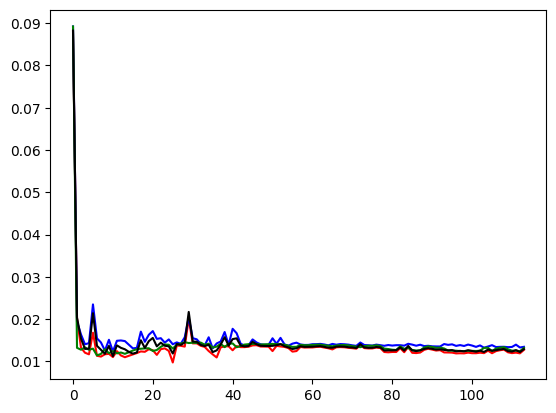

In [46]:
import matplotlib.pyplot as plt
#high biomass test sims:
#0, 2, 7, 9, 12

#low biomass test sims:
#3,4,5,6,8

#medium biomass test sims:
#1,10,11

#0,1,2,3,4,5,6,7,8,9,10,11,12
idx = [0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(torch.mean(outputs[idx].detach().cpu(),(0,2,3)),c='r')
plt.plot(torch.mean(inputs[idx].detach().cpu(),(0,2,3)),c='b')
# inp_scaled = torch.mean(.75*inputs[idx].detach().cpu(),(0,2,3))
# #inp_scaled[40:] = inp_scaled[40:]*1.2
# inp_scaled[58:] = inp_scaled[58:]*1.12
# inp_scaled[80:] = inp_scaled[80:]*1.05
# inp_scaled[105:] = inp_scaled[105:]*1.01

# plt.plot(inp_scaled,c='b')
plt.plot(torch.mean(labels[idx].detach().cpu(),(0,2,3)),c='g')
plt.plot(torch.mean(outputs_eca[idx].detach().cpu(),(0,2,3)),c='k')

print(r2_score(torch.mean(outputs[idx].detach().cpu(),(0,2,3)), torch.mean(labels[idx].detach().cpu(),(0,2,3))))
print(r2_score(torch.mean(outputs_eca[idx].detach().cpu(),(0,2,3)), torch.mean(labels[idx].detach().cpu(),(0,2,3))))
print(r2_score(torch.mean(inputs[idx].detach().cpu(),(0,2,3)), torch.mean(labels[idx].detach().cpu(),(0,2,3))))

In [127]:
# optimizer1 = optim.Adam(model1.parameters(), lr=0.0005)
    
# gamma = 0.99950
# scheduler1 = ExponentialLR(optimizer1, gamma=gamma)
# torch.cuda.empty_cache()
# gc.collect()

# # Training loop
# num_epochs = 1000
# for epoch in range(num_epochs):
#     model1.train()
#     count = 0
#     running_loss = 0
#     for batch in dataloader:
#         inputs = batch[0].to(device)
#         labels = batch[1].to(device)
#         optimizer1.zero_grad()
#         outputs = model1(inputs)
#         loss = criterion1(outputs, labels)
#         loss.backward()
#         optimizer1.step()
#         scheduler1.step()
#         count += 1
#         running_loss += loss.item()
#     torch.cuda.empty_cache()
#     gc.collect()

#     # Model testing
#     model1.eval()
#     nn_errors = []
#     orig_errors = []
#     nn_mapes = []
#     orig_mapes = []
#     nn_r2 = []
#     orig_r2 = []
#     nn_mae = []
#     orig_mae = []

#     with torch.no_grad():
#         for inp, lab in test_dataloader:
#             inp = inp.to(device)
#             lab = lab.to(device)
#             outp = model1(inp)
#             outp = outp*765.37635
#             #inp = inp*765.37635
#             lab = lab*765.37635
#             # inp = inp.squeeze()
#             # lab = lab.squeeze()
#             inp_upscaled = inp.repeat_interleave(2, dim=3)
#             inp_upscaled = inp_upscaled.repeat_interleave(2, dim=2)
#             inp_upscaled = inp_upscaled*765.37635
            

#             # Calculate MSE
#             nn_error = criterion2( lab, outp)
#             orig_error = criterion2( lab, inp_upscaled)
#             nn_errors.append(nn_error.cpu().detach().numpy())
#             orig_errors.append(orig_error.cpu().detach().numpy())

#             # Calculate MAPE
#             nn_mape = criterion3( lab, outp)
#             orig_mape = criterion3( lab, inp_upscaled)
#             nn_mapes.append(nn_mape.cpu().detach().numpy())
#             orig_mapes.append(orig_mape.cpu().detach().numpy())

#             nn_mae_value = criterion4( lab, outp)
#             orig_mae_value = criterion4( lab, inp_upscaled)
#             nn_mae.append(nn_mae_value.cpu().detach().numpy())
#             orig_mae.append(orig_mae_value.cpu().detach().numpy())

#             batch_size = outp.shape[0]
#             for k in range(batch_size):
#                 # Extract time series by averaging over spatial dimensions
#                 out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
#                 lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
#                 inp_ts = inp_upscaled[k].mean(dim=(1, 2)).cpu().detach().numpy()

#                 # For upscaled input, repeat to match the time steps if necessary
#                 # if inp_ts.shape[0] != lab_ts.shape[0]:
#                 #     # Assuming input and label have different time steps
#                 #     # Adjust inp_ts to match lab_ts length
#                 #     inp_ts = np.interp(
#                 #         np.linspace(0, 1, lab_ts.shape[0]),
#                 #         np.linspace(0, 1, inp_ts.shape[0]),
#                 #         inp_ts
#                 #     )

#                 # Compute R²
#                 nn_r2_value = r2_score(lab_ts, out_ts)
#                 orig_r2_value = r2_score(lab_ts, inp_ts)
#                 nn_r2.append(nn_r2_value)
#                 orig_r2.append(orig_r2_value)

#                 # Compute NSE
                

#     torch.cuda.empty_cache()
#     gc.collect()
#     current_lr = optimizer1.param_groups[0]['lr']
#     avg_orig_error = np.mean(orig_errors)
#     avg_nn_error = np.mean(nn_errors)
#     avg_orig_mape = np.mean(orig_mapes)
#     avg_nn_mape = np.mean(nn_mapes)
#     avg_orig_r2 = np.median(orig_r2)
#     avg_nn_r2 = np.median(nn_r2)
#     avg_orig_mae = np.median(orig_mae)
#     avg_nn_mae = np.median(nn_mae)

#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count:.5f}, Learning Rate: {current_lr:.8f}")
#     print(f"Epoch {epoch+1}: Orig MSE: {avg_orig_error:.5f}, NN MSE: {avg_nn_error:.5f}, Orig MAPE: {avg_orig_mape:.5f}%, NN MAPE: {avg_nn_mape:.5f}%")
#     print(f"Epoch {epoch+1}: Orig R²: {avg_orig_r2:.5f}, NN R²: {avg_nn_r2:.5f}, Orig MAE: {avg_orig_mae:.5f}, NN MAE: {avg_nn_mae:.5f}")

# # Save final scores
# final_mses_noatt2.append(avg_nn_error)
# final_mapes_noatt2.append(avg_nn_mape)
# final_r2_noatt2.append(avg_nn_r2)
# final_nse_noatt2.append(avg_nn_mae)
# print(f'Run {m+1}: Final MSE: {avg_nn_error:.5f}, Final MAPE: {avg_nn_mape:.5f}%, Final R²: {avg_nn_r2:.5f}, Final MAE: {avg_nn_mae:.5f}')

# # Save model state every 5 runs
# # if m % 5 == 0:
# #     torch.save(model1.state_dict(), f'attn_model_bio_10x_upscaling_{m}.pt')
# torch.cuda.empty_cache()
# gc.collect()

In [38]:
#simpled
#Run 1: Final MSE: 30.12700, Final MAPE: 1.52323%, Final R²: 0.99613, Final MAE: 1.60587


torch.Size([6, 114, 1, 1000, 200])

In [96]:
with open('final_scores_ECA_001.csv', 'w', newline='') as csvfile:
    fieldnames = ['Run', 'Final_MSE', 'Final_MAPE', 'Final_R2', 'Final_MAE']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(final_mses_noatt2)-1):
        writer.writerow({
            'Run': i + 1,
            'Final_MSE': final_mses_noatt2[i],
            'Final_MAPE': final_mapes_noatt2[i],
            'Final_R2': final_r2_noatt2[i],
            'Final_MAE': final_nse_noatt2[i]
        })

In [97]:
print(np.mean(final_mses_noatt2[:-1]))
print(np.mean(final_mapes_noatt2[:-1]))
print(np.mean(final_r2_noatt2[:-1]))
print(np.mean(final_nse_noatt2[:-1]))


2474.157
3.4493215
0.854925533135732
22.232336


In [129]:
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

2385.9055
3.1081147
0.7628764092922211
23.073214


In [62]:
print(np.mean(final_mses_noatt2))
print(np.mean(final_mapes_noatt2))
print(np.mean(final_r2_noatt2))
print(np.mean(final_nse_noatt2))

2350.6765
2.7002993
0.7606325745582581
23.15097


In [255]:
fscores2 = pd.read_csv('final_scores_upscaling_stam_noattv2_002.csv')
fscores1 = pd.read_csv('final_scores_upscaling_stam_noattv2_001.csv')
fscores = pd.concat([fscores1,fscores2])
fscores

Run  Final_MSE  Final_MAPE  Final_R2  Final_MAE
0    1  2507.7842    5.219505  0.906186  21.596100
1    2  2558.8516    4.201766  0.874674  21.121600
2    3  2482.3503    5.355011  0.910849  21.956806
3    4  2531.7673    3.691690  0.893412  21.194980
4    5  2489.7754    4.764451  0.868487  21.739447
5    6  2486.2556    5.502920  0.913090  21.651669
6    7  2516.7678    4.662452  0.894316  21.331238
0    1  2492.4590    4.656939  0.892811  21.787760
1    2  2503.3079    5.135866  0.883856  21.548770
2    3  2512.4287    5.189274  0.923504  21.584766
3    4  2500.0142    4.144321  0.860522  21.623526
4    5  2503.5217    5.060041  0.908489  22.124737
5    6  2522.8513    5.134855  0.911484  21.743560
6    7  2509.8380    4.850507  0.917386  21.736317

In [256]:
fscores1 = pd.read_csv('final_scores_upscaling_stamattv2_001.csv')
fscores2 = pd.read_csv('final_scores_upscaling_stamattv2_002.csv')
fscores2 = pd.concat([fscores1,fscores2])
fscores2

Run  Final_MSE  Final_MAPE  Final_R2  Final_MAE
0    1  2442.9392    5.334447  0.946814  21.879475
1    2  2479.5654    5.886153  0.920825  21.397984
2    3  2488.6042    5.492086  0.898917  22.138857
3    4  2483.8652    5.857204  0.940309  21.721949
4    5  2502.5030    5.859288  0.928037  21.898440
5    6  2487.4983    5.218347  0.923037  21.576988
6    7  2475.7449    6.066061  0.933230  21.319910
0    1  2472.8850    5.338292  0.942686  21.709350
1    2  2513.5676    5.172811  0.929866  21.267635
2    3  2476.3167    6.210054  0.879754  21.556309
3    4  2474.4744    5.275349  0.929291  21.280990
4    5  2477.9792    5.013719  0.914102  21.629860
5    6  2490.1548    4.937823  0.925489  21.371758
6    7  2449.6460    4.786388  0.942131  21.716341

In [259]:
fscores3 = pd.read_csv('final_scores_upscaling_ECA_new_001.csv')
fscores3

Run  Final_MSE  Final_MAPE  Final_R2  Final_MAE
0     1  2458.1675    5.947544  0.919720  21.478962
1     2  2522.5320    4.554511  0.884375  21.336350
2     3  2546.5427    2.923380  0.890893  21.738382
3     4  2531.9956    4.817141  0.930728  21.372763
4     5  2535.4797    4.774317  0.883695  20.830240
5     6  2527.8743    4.505947  0.883649  21.568771
6     7  2477.1226    3.715946  0.895385  21.589280
7     8  2539.1523    3.664342  0.903110  21.678036
8     9  2506.7370    3.725862  0.902499  21.106728
9    10  2489.7012    4.268875  0.905282  21.379478
10   11  2561.9202    2.562384  0.866967  21.014542
11   12  2525.1630    2.747485  0.863350  21.173658
12   13  2553.0900    2.797469  0.875925  21.226084
13   14  2540.5810    3.811549  0.887998  21.287874
14   15  2563.7020    3.632322  0.884794  21.482096

In [260]:
from scipy.stats import ttest_ind
print('no att, stam, eca')
for i in range(1,5):
    print(np.mean(fscores.iloc[:,i]))
    print(np.mean(fscores2.iloc[:,i]))
    print(np.mean(fscores3.iloc[:,i]))
    print(ttest_ind(fscores2.iloc[:,i], fscores3.iloc[:,i]))

no att, stam, eca
2508.426642857143
2479.6959928571423
2525.3174066666666
TtestResult(statistic=-4.841669956764042, pvalue=4.661133741367682e-05, df=27.0)
4.82639982857143
5.460573085714286
3.8966048733333336
TtestResult(statistic=5.6890018309971175, pvalue=4.819355937059072e-06, df=27.0)
0.8970761171409062
0.9253204720360892
0.8918914794921875
TtestResult(statistic=4.937163423841896, pvalue=3.6058713277678233e-05, df=27.0)
21.624376857142856
21.604703285714283
21.350882933333335
TtestResult(statistic=2.663240471509504, pvalue=0.012887344003243694, df=27.0)


In [111]:
fscores = pd.read_csv('final_scores_linear_no_att_001.csv')
#fscores.iloc[0,:]= [1,2347.87476, 3.67957, 0.76888,23.05810]

fscores=fscores.drop(7)
fscores

Run  Final_MSE  Final_MAPE  Final_R2  Final_MAE
0    1  2355.8767    2.092127  0.759539  22.694988
1    2  2362.8079    2.653393  0.744405  22.865751
2    3  2344.0989    3.508772  0.759125  22.757801
3    4  2371.6775    1.795880  0.746915  22.737162
4    5  2340.9020    2.456496  0.758717  23.341911
5    6  2368.2446    2.375274  0.828209  23.227211
6    7  2341.8460    2.324092  0.731532  23.586111
8    9  2343.3635    3.077486  0.759768  22.728840
9   10  2369.2021    2.420265  0.745705  23.042920

In [56]:
fscores20 = pd.read_csv('final_scores_20xinterp_no_att_001.csv')
fscores10 = pd.read_csv('final_scores_10xinterp_no_att_001.csv')

In [112]:
print('linear no att')
for i in range(1,5):
    print(np.mean(fscores.iloc[:,i]))
# print('10x no att')
# for i in range(1,5):
#     print(np.mean(fscores10.iloc[:,i]))
# print('20x no att')
# for i in range(1,5):
#     print(np.mean(fscores20.iloc[:,i]))
# print('linear + att')
# for i in range(1,5):
#     print(np.mean(fscores2.iloc[:,i]))

linear no att
2355.3354666666664
2.5226426222222225
0.7593237161636353
22.99807722222222


In [59]:
# Run 1: Final MSE: 2419.07422, Final MAPE: 2.49528%, Final R²: 0.95095, Final MAE: 21.39475
# Run 2: Final MSE: 2401.63452, Final MAPE: 2.52297%, Final R²: 0.89802, Final MAE: 22.23510
# Run 3: Final MSE: 2426.64038, Final MAPE: 1.76617%, Final R²: 0.93967, Final MAE: 21.20931
# Run 5: Final MSE: 2369.99243, Final MAPE: 2.48922%, Final R²: 0.93305, Final MAE: 22.36336
# Run 7: Final MSE: 2433.35962, Final MAPE: 1.91356%, Final R²: 0.92101, Final MAE: 21.58766
# Run 8: Final MSE: 2387.15430, Final MAPE: 1.88001%, Final R²: 0.92716, Final MAE: 22.43092
fscores2 = pd.read_csv('final_scores_linear_spatiotemporal_att_001.csv')
fscores2.iloc[4,:]= [5,2354.07812, 2.30104,0.82793, 22.81614]
fscores2.loc[10]= [11,2419.07422, 2.49528,0.95095, 21.39475]
fscores2.loc[11]= [12,2301.63452, 2.52297,0.89802, 22.23510]
fscores2.loc[12]= [13,2369.99243, 2.48922,0.93305, 22.36336]
fscores2.loc[13]= [14,2387.15430, 1.88001,0.92716, 22.43092]

#fscores2=fscores2.drop(4)
fscores2

Run   Final_MSE  Final_MAPE  Final_R2  Final_MAE
0    1.0  2347.17200    1.775967  0.795966  23.446550
1    2.0  2399.28030    1.410059  0.886763  21.781770
2    3.0  2354.38000    1.473567  0.919391  23.072868
3    4.0  2353.73120    1.968957  0.809257  23.112148
4    5.0  2354.07812    2.301040  0.827930  22.816140
5    6.0  2366.75800    1.891861  0.855999  22.716825
6    7.0  2345.10300    2.681129  0.793256  23.429714
7    8.0  2384.77170    2.127698  0.771563  22.769024
8    9.0  2394.91100    1.337273  0.815487  22.888428
9   10.0  2351.67400    1.773238  0.866242  22.605920
10  11.0  2419.07422    2.495280  0.950950  21.394750
11  12.0  2301.63452    2.522970  0.898020  22.235100
12  13.0  2369.99243    2.489220  0.933050  22.363360
13  14.0  2387.15430    1.880010  0.927160  22.430920

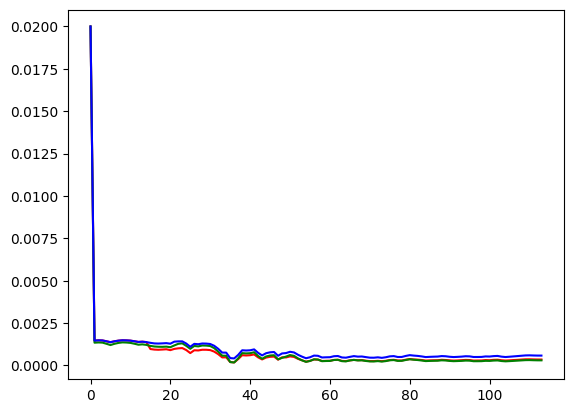

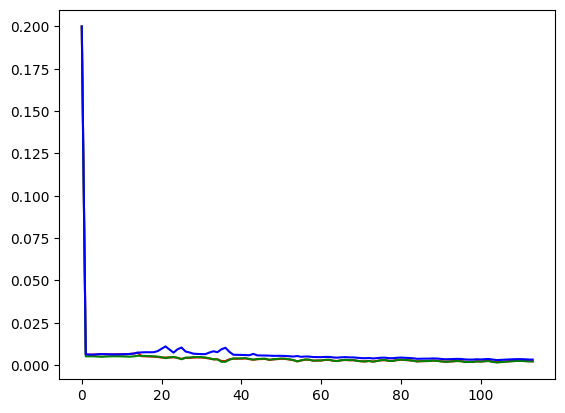

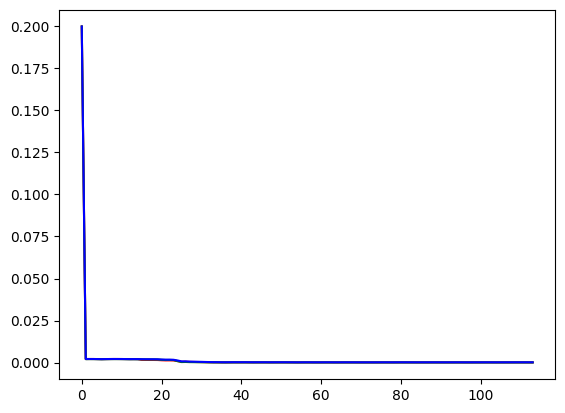

In [56]:
import matplotlib.pyplot as plt
for k in range(batch_size):
                    # Extract time series by averaging over spatial dimensions
    out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
    lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
    inp_ts = inp_upscaled[k].mean(dim=(1, 2)).cpu().detach().numpy()
    plt.plot(out_ts, c='r')
    plt.plot(lab_ts, c='g')
    plt.plot(inp_ts, c='b')
    plt.show()

In [47]:
from scipy.stats import ttest_ind
for i in range(1,5):
    print(ttest_ind(fscores.iloc[:,i], fscores2.iloc[:,i]))

TtestResult(statistic=2.4091034889527987, pvalue=0.032966649300201475, df=12.0)
TtestResult(statistic=-3.2680603188724624, pvalue=0.006727361751401408, df=12.0)
TtestResult(statistic=-3.725228017110646, pvalue=0.0028990666707221628, df=12.0)
TtestResult(statistic=-1.1969653766340307, pvalue=0.25443197745833224, df=12.0)


In [49]:
fscores2

Run  Final_MSE  Final_MAPE  Final_R2  Final_MAE
0    1  2442.9392    5.334447  0.946814  21.879475
1    2  2479.5654    5.886153  0.920825  21.397984
2    3  2488.6042    5.492086  0.898917  22.138857
3    4  2483.8652    5.857204  0.940309  21.721949
4    5  2502.5030    5.859288  0.928037  21.898440
5    6  2487.4983    5.218347  0.923037  21.576988
6    7  2475.7449    6.066061  0.933230  21.319910

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
import hydroeval as he

simulations = [5.3, 4.2, 5.7, 2.3]
evaluations = [4.7, 4.3, 5.5, 2.7]

nse = he.evaluator(he.nse, simulations, evaluations)

You should consider upgrading via the 'C:\Users\marcb\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [46]:
np.nanmean(final_mapes_noatt2)

nan

In [31]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torch.optim.lr_scheduler import ExponentialLR
# # from torchmetrics import MeanSquaredLogError
# import gc

# # Model, loss, and optimizer
# final_mses_noatt2=[]
# for m in range(20):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model1 = UNet3_Attention().to(device) 
    
#     torch.cuda.empty_cache()
#     gc.collect()
#     criterion2 = nn.MSELoss()
#     optimizer1 = optim.AdamW(model1.parameters(), lr=0.0006)
    
#     gamma = .9960# 
#     scheduler1 = ExponentialLR(optimizer1, gamma=gamma)
#     torch.cuda.empty_cache()
#     gc.collect()
#     #n=2
#     # Training loop
#     num_epochs = 16
#     for epoch in range(num_epochs):
#         model1.train()
#         count=0
#         running_loss=0
#         for batch in dataloader:
        
#             inputs = batch[0].to(device)
#             labels = batch[1].to(device)
#             optimizer1.zero_grad()
#             outputs = model1(inputs)
#             loss = criterion2(outputs, labels)
#             loss.backward()
#             optimizer1.step()
#             scheduler1.step()
#             count=count+1
#             running_loss = running_loss+loss.item()
#         torch.cuda.empty_cache()
#         gc.collect()
#         # Model testing
#         model1.eval()
#         nn_errors=[]
#         orig_errors=[]
#         with torch.no_grad():
#             for inp, lab in test_dataloader:
#                 inp = inp.to(device)
#                 lab= lab.to(device)                
#                 outp = model1(inp)          
#                 inp = inp.repeat_interleave(10, dim=3)
#                 nn_error = criterion2(outp, lab)
#                 orig_error = criterion2(lab, inp)
#                 nn_errors.append(nn_error.cpu().detach().numpy())
#                 orig_errors.append(orig_error.cpu().detach().numpy())
#         torch.cuda.empty_cache()
#         gc.collect()
#         print (np.mean(orig_errors), np.mean(nn_errors))
#         current_lr = optimizer1.param_groups[0]['lr']
#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count}, Learning Rate: {current_lr:.8f}")
#     print('Final MSE: ', np.mean(nn_errors))
#     final_mses_noatt2.append(np.mean(nn_errors))
#     torch.save(model1.state_dict(),'attn_model_bio_10x_upscaling_'+str(m)) 
#     torch.cuda.empty_cache()
#     gc.collect()

In [56]:
final_mses2 = np.concatenate([final_mses2.iloc[:,1], np.sort(final_mses_att2)])
final_mses2

array([0.00249811, 0.0025304 , 0.00255134, 0.00258547, 0.00259047,
       0.00263651, 0.00266514, 0.00269417, 0.00271953, 0.00272169,
       0.00277459, 0.00277513, 0.00284417, 0.00287499, 0.00296572,
       0.00297558, 0.00327387, 0.00345018, 0.00384249, 0.00403935,
       0.00250637, 0.00255497, 0.00255641, 0.00267108, 0.00268399,
       0.00271035, 0.00271838, 0.00273978, 0.00275599, 0.00282325,
       0.0028255 , 0.00286358, 0.00293215, 0.00293569, 0.00300053,
       0.0031007 , 0.00312719, 0.00314354, 0.00315595, 0.00347879])

In [63]:
final_mses = np.concatenate([final_mses.iloc[:,1], np.sort(final_mses_noatt2)])
final_mses

array([0.00258462, 0.00266109, 0.00267163, 0.00272126, 0.00274493,
       0.00276461, 0.00279445, 0.00282174, 0.0028454 , 0.00288503,
       0.00290678, 0.0031312 , 0.00330724, 0.00338993, 0.00360416,
       0.0036985 , 0.0037437 , 0.00375446, 0.00392897, 0.00435304,
       0.00252363, 0.00259132, 0.00259429, 0.00264992, 0.00267207,
       0.0027319 , 0.00278952, 0.00283204, 0.00285661, 0.00290205,
       0.00291513, 0.00293504, 0.0029933 , 0.00301861, 0.00330274,
       0.00340586, 0.00343912, 0.00348486, 0.00354197, 0.0039874 ])

In [45]:
final_mses2 = final_mses[:]
final_mses2

[0.0032738661,
 0.002844172,
 0.0027216894,
 0.0024981145,
 0.002590469,
 0.0026365116,
 0.0027195343,
 0.0038424877,
 0.004039352,
 0.0026651418,
 0.0027751315,
 0.0029657201,
 0.0028749947,
 0.0025513447,
 0.002774592,
 0.0025304046,
 0.0029755845,
 0.00345018,
 0.0025854658,
 0.0026941744]

In [64]:
from scipy.stats import ttest_ind
final_mses2=np.sort(final_mses2)
final_mses=np.sort(final_mses)
ttest_ind(final_mses2, final_mses)

In [76]:
ttest_ind(final_mses2, final_mses)

TtestResult(statistic=-2.2454075918591374, pvalue=0.027573315788200024, df=78.0)

In [75]:
np.mean(final_mses2)

0.002882328421299057

In [73]:
pd.DataFrame(final_mses).to_csv('mse.csv')

In [62]:
final_mses = pd.read_csv('mse.csv')

In [28]:
save_dataset = VelDataset(h5_files_train,h5_files)
save_dataloader = DataLoader(save_dataset, batch_size=4, shuffle=False,  num_workers=4, drop_last=False)


model1.eval()
outputs=torch.zeros((len(h5_files),114,100,2000))
count=0               
with torch.no_grad():
    for inp, lab in save_dataloader:
        inp = inp.to(device)
        #lab= lab.to(device)
        
        outp = model1(inp)
        outputs[count:count+4,:,:,:] = outp
        count = count+4

In [41]:



torch.save(model1.state_dict(),'attn_model_bio_10x_upscaling') 

In [53]:
outp.shape
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

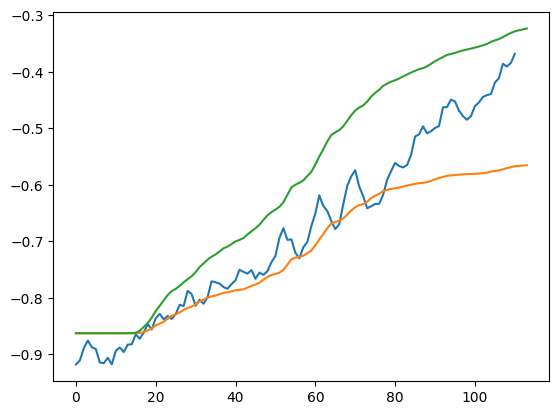

In [60]:
k=3
plt.plot(moving_average(outp.cpu().detach().numpy()[k], 4))
plt.plot(lab.cpu().detach().numpy()[k])
plt.plot(inp.cpu().detach().numpy()[k])

In [160]:
inputs.shape

torch.Size([8, 90, 100, 200])

In [238]:
torch.save(model1.state_dict(), 'resolution_model4_siluv2')

In [14]:
model_weights_path = 'weights_bio_overfit_big_fulltest_best_feb7'
model1.load_state_dict(torch.load(model_weights_path))

<All keys matched successfully>

In [34]:
import gc
torch.cuda.empty_cache()
gc.collect()

485

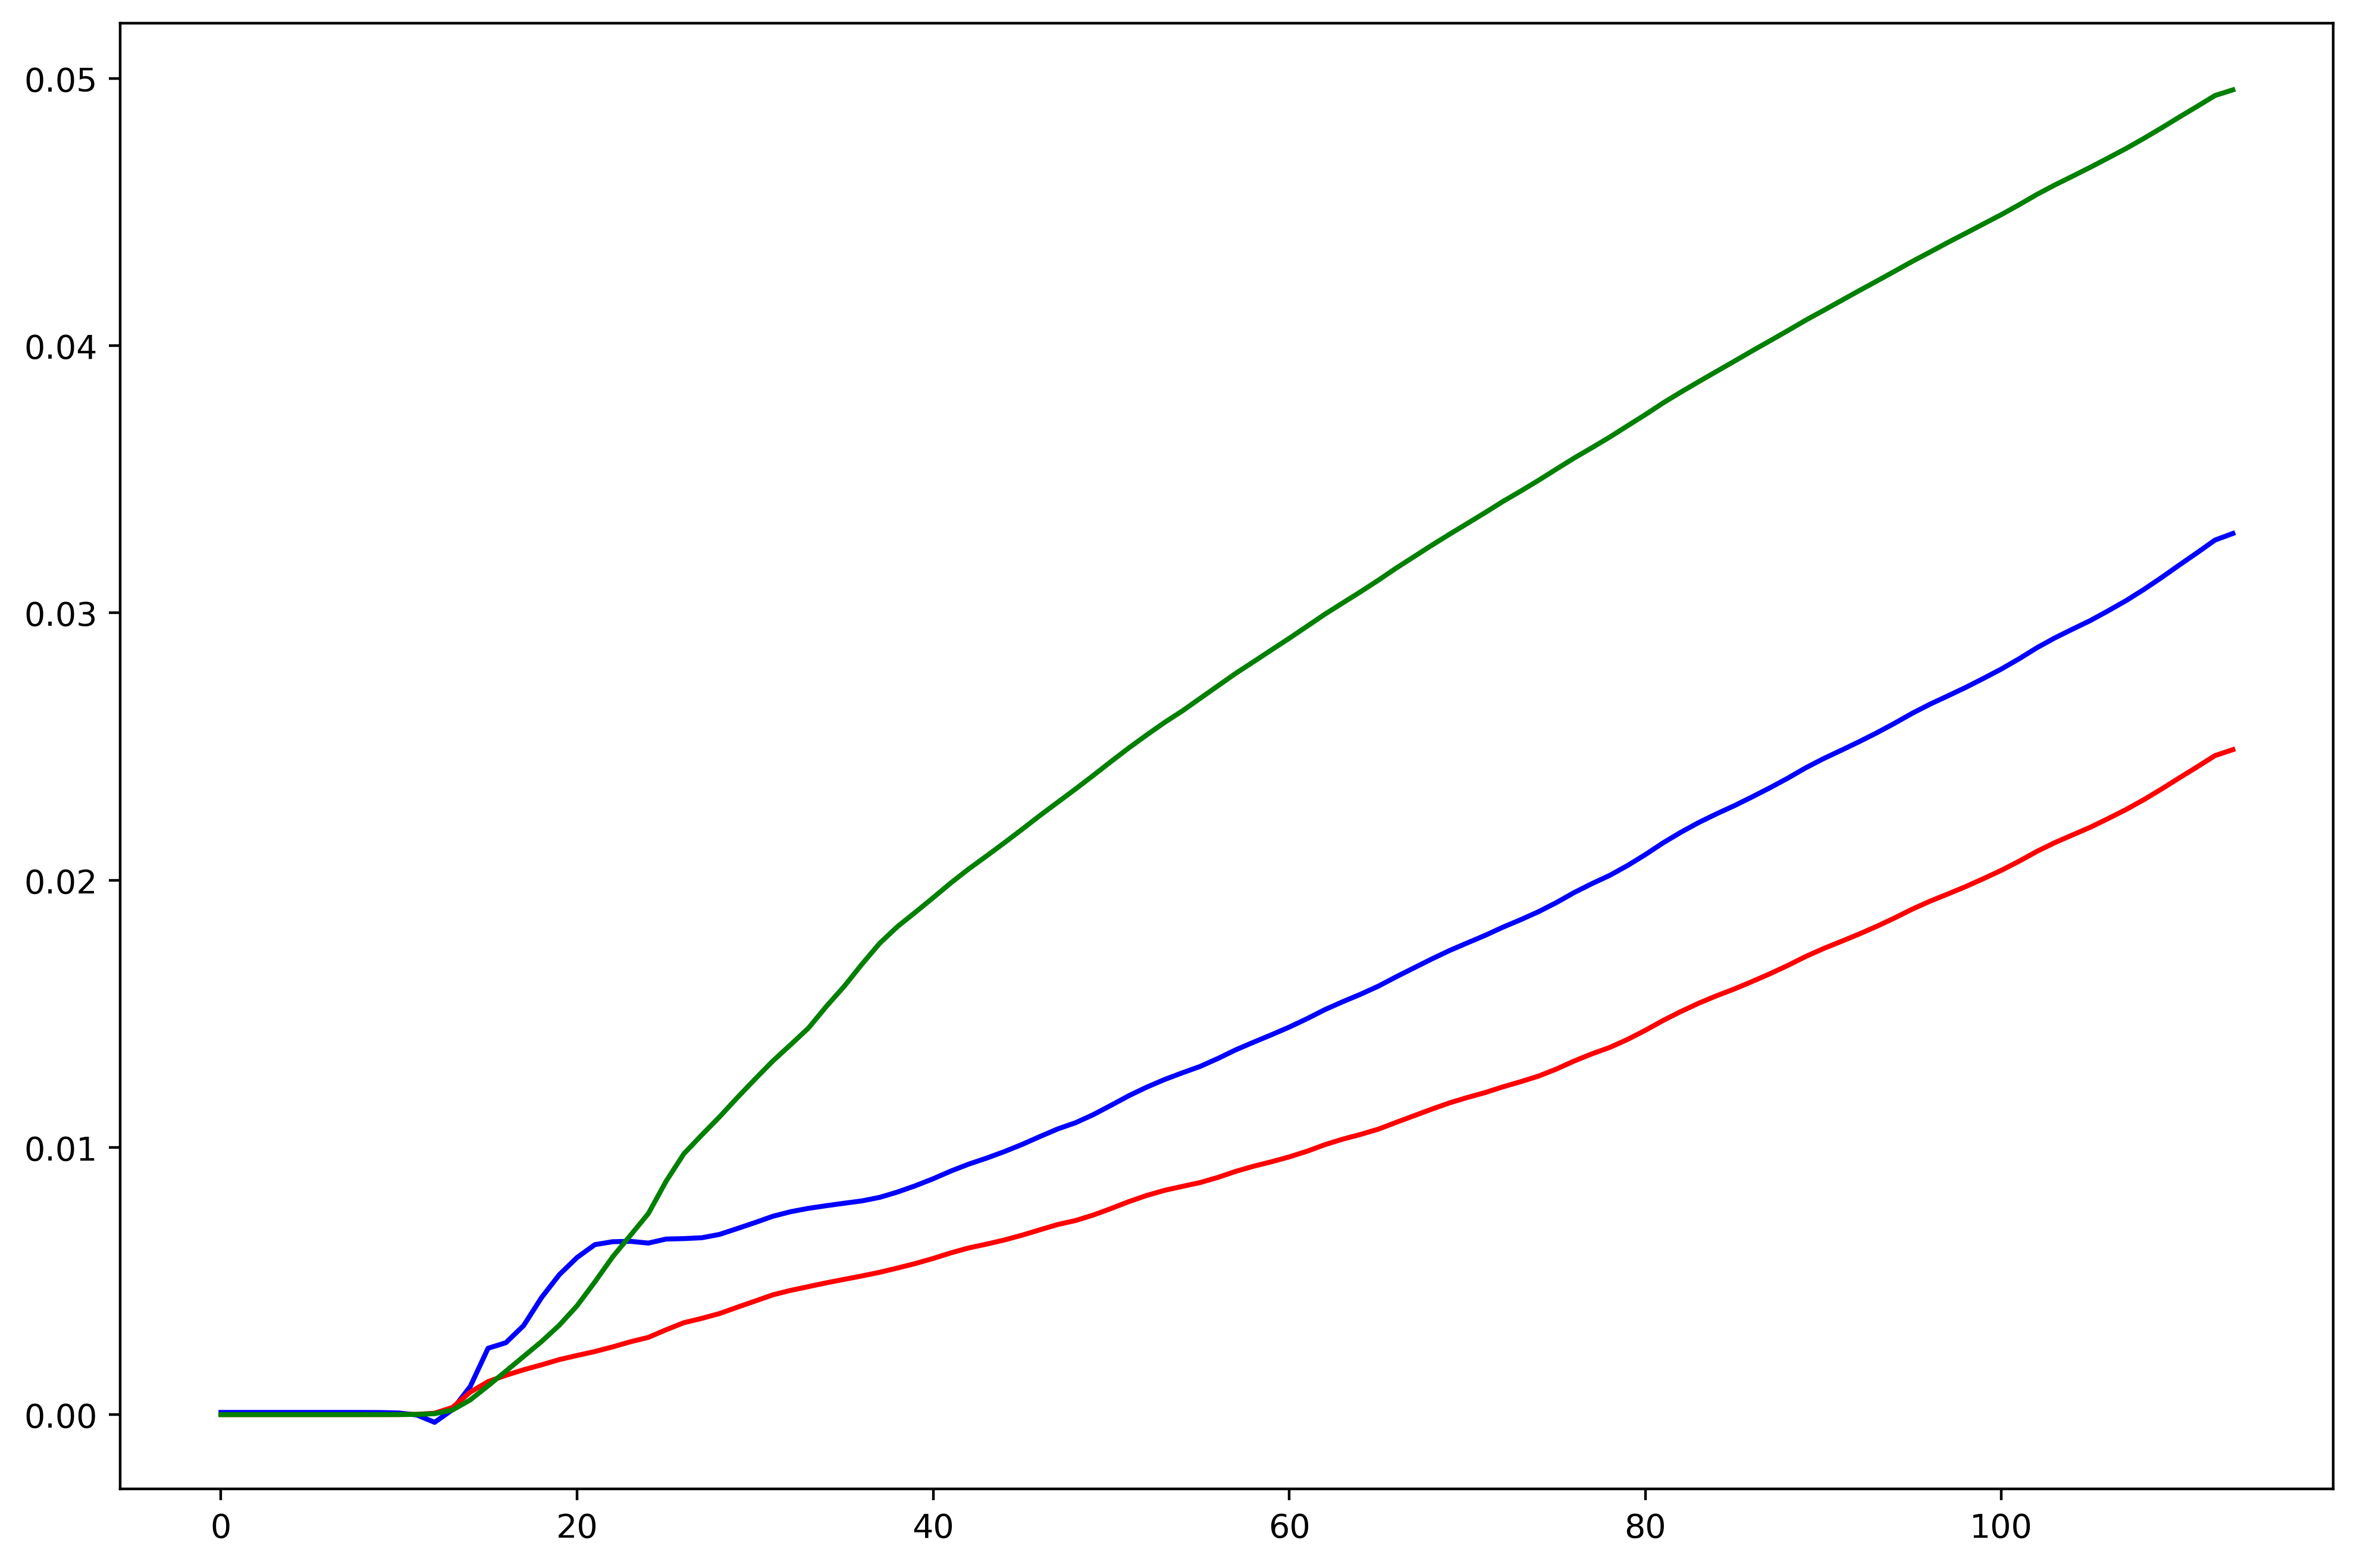

In [36]:
import matplotlib.pyplot as plt
k=7
n=0
#ablation studies for multi-input prediction
inputs.shape
out_ts = []
for i in range(outp.shape[1]):
    out_ts.append(np.mean(outp[k,i,:,:].cpu().detach().numpy()))

label_ts = []
for i in range(lab.shape[1]):
    label_ts.append(np.mean(lab[k,i,:,:].cpu().detach().numpy()))

inp_ts = []
for i in range(inp.shape[1]):
    inp_ts.append(np.mean(inp[k,i,:,:].cpu().detach().numpy()))
plt.figure(figsize=(12,8),dpi=400)
# plt.xlim([20,43])
# plt.yscale('log')
plt.plot(out_ts, c='b') 
plt.plot(label_ts, c='r')
plt.plot(inp_ts, c='g')

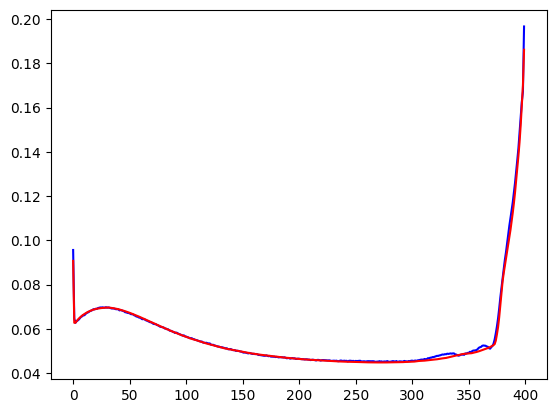

In [73]:
k=0
inputs.shape
out_ts = []
for i in range(outputs.shape[3]):
    out_ts.append(np.mean(outputs[k,:,:,i].cpu().detach().numpy()))

label_ts = []
for i in range(labels.shape[3]):
    label_ts.append(np.mean(labels[k,:,:,i].cpu().detach().numpy()))

inp_ts = []
for i in range(inputs.shape[1]):
    inp_ts.append(np.mean(inputs[k,i,:,:].cpu().detach().numpy()))
    
plt.plot(out_ts, c='b') 
plt.plot(label_ts, c='r')
# plt.plot(inp_ts, c='g')

In [46]:
torch.min(labels)

tensor(4.8552e-22, device='cuda:0')

In [39]:
x.shape
new_x=x.repeat_interleave(5, dim=3)

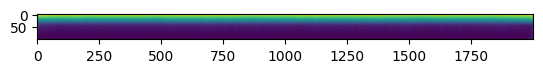

In [101]:
plt.imshow(outp[0,42,:,:].cpu().detach().numpy())

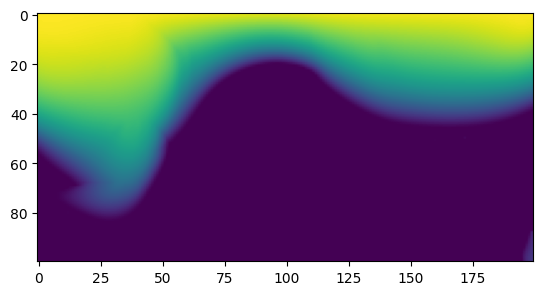

In [102]:
plt.imshow(inp[0,42,:,:].cpu().detach().numpy())

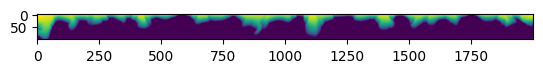

In [103]:
plt.imshow(lab[0,42,:,:].cpu().detach().numpy())

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 3 subplots side by side
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(12, 12), dpi=1000)
#biomss
#k=2
#chromium
k=0
t=30
labelsnp = labels.detach().cpu().numpy()
outputsnp = outputs.detach().cpu().numpy()
outputsnp_eca = outputs_eca.detach().cpu().numpy()
k=.01
i=0#50
j=0#1800

inputsnp = inputs.detach().cpu().numpy()
# Plot the label image
im1 = ax1.imshow(np.mean(labelsnp[idx],(0,1))[i:,j:], vmin=0.0, vmax=.01)
ax1.set_title('Ground Truth')

# im5 = ax5.imshow(np.mean(outputsnp,(0,1))[50:,1800:], vmin=0, vmax=100)
# ax5.set_title('outputs')

# im4 = ax4.imshow(np.mean(inputsnp,(0,1)), vmin=0, vmax=100)
# ax4.set_title('inputs')
fig.colorbar(im1, ax=ax1, orientation='horizontal')

# Plot the difference between label and output
diff_output = np.mean(labelsnp[idx],(0,1))[i:,j:] - np.mean(outputsnp,(0,1))[i:,j:]
im2 = ax2.imshow(diff_output, cmap='RdBu_r', vmin=-k, vmax=k)
ax2.set_title('Ground Truth - STAMNet-Upscale')
# fig.colorbar(im2, ax=ax2)

# Plot the difference between label and input
diff_input = np.mean(labelsnp[idx],(0,1))[i:,j:] - np.mean(inputsnp,(0,1))[i:,j:]
im4 = ax4.imshow(diff_input, cmap='RdBu_r', vmin=-k, vmax=k)
ax4.set_title('Ground Truth - Interpolation')

diff_input = np.mean(labelsnp[idx],(0,1))[i:,j:] - np.mean(outputsnp_eca,(0,1))[i:,j:]
im3 = ax3.imshow(diff_input, cmap='RdBu_r', vmin=-k, vmax=k)
ax3.set_title('Ground Truth - MLP+ECA')
fig.colorbar(im3, ax=ax3, orientation='horizontal')

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('spatial_comparison_full_upscale_molass_new.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

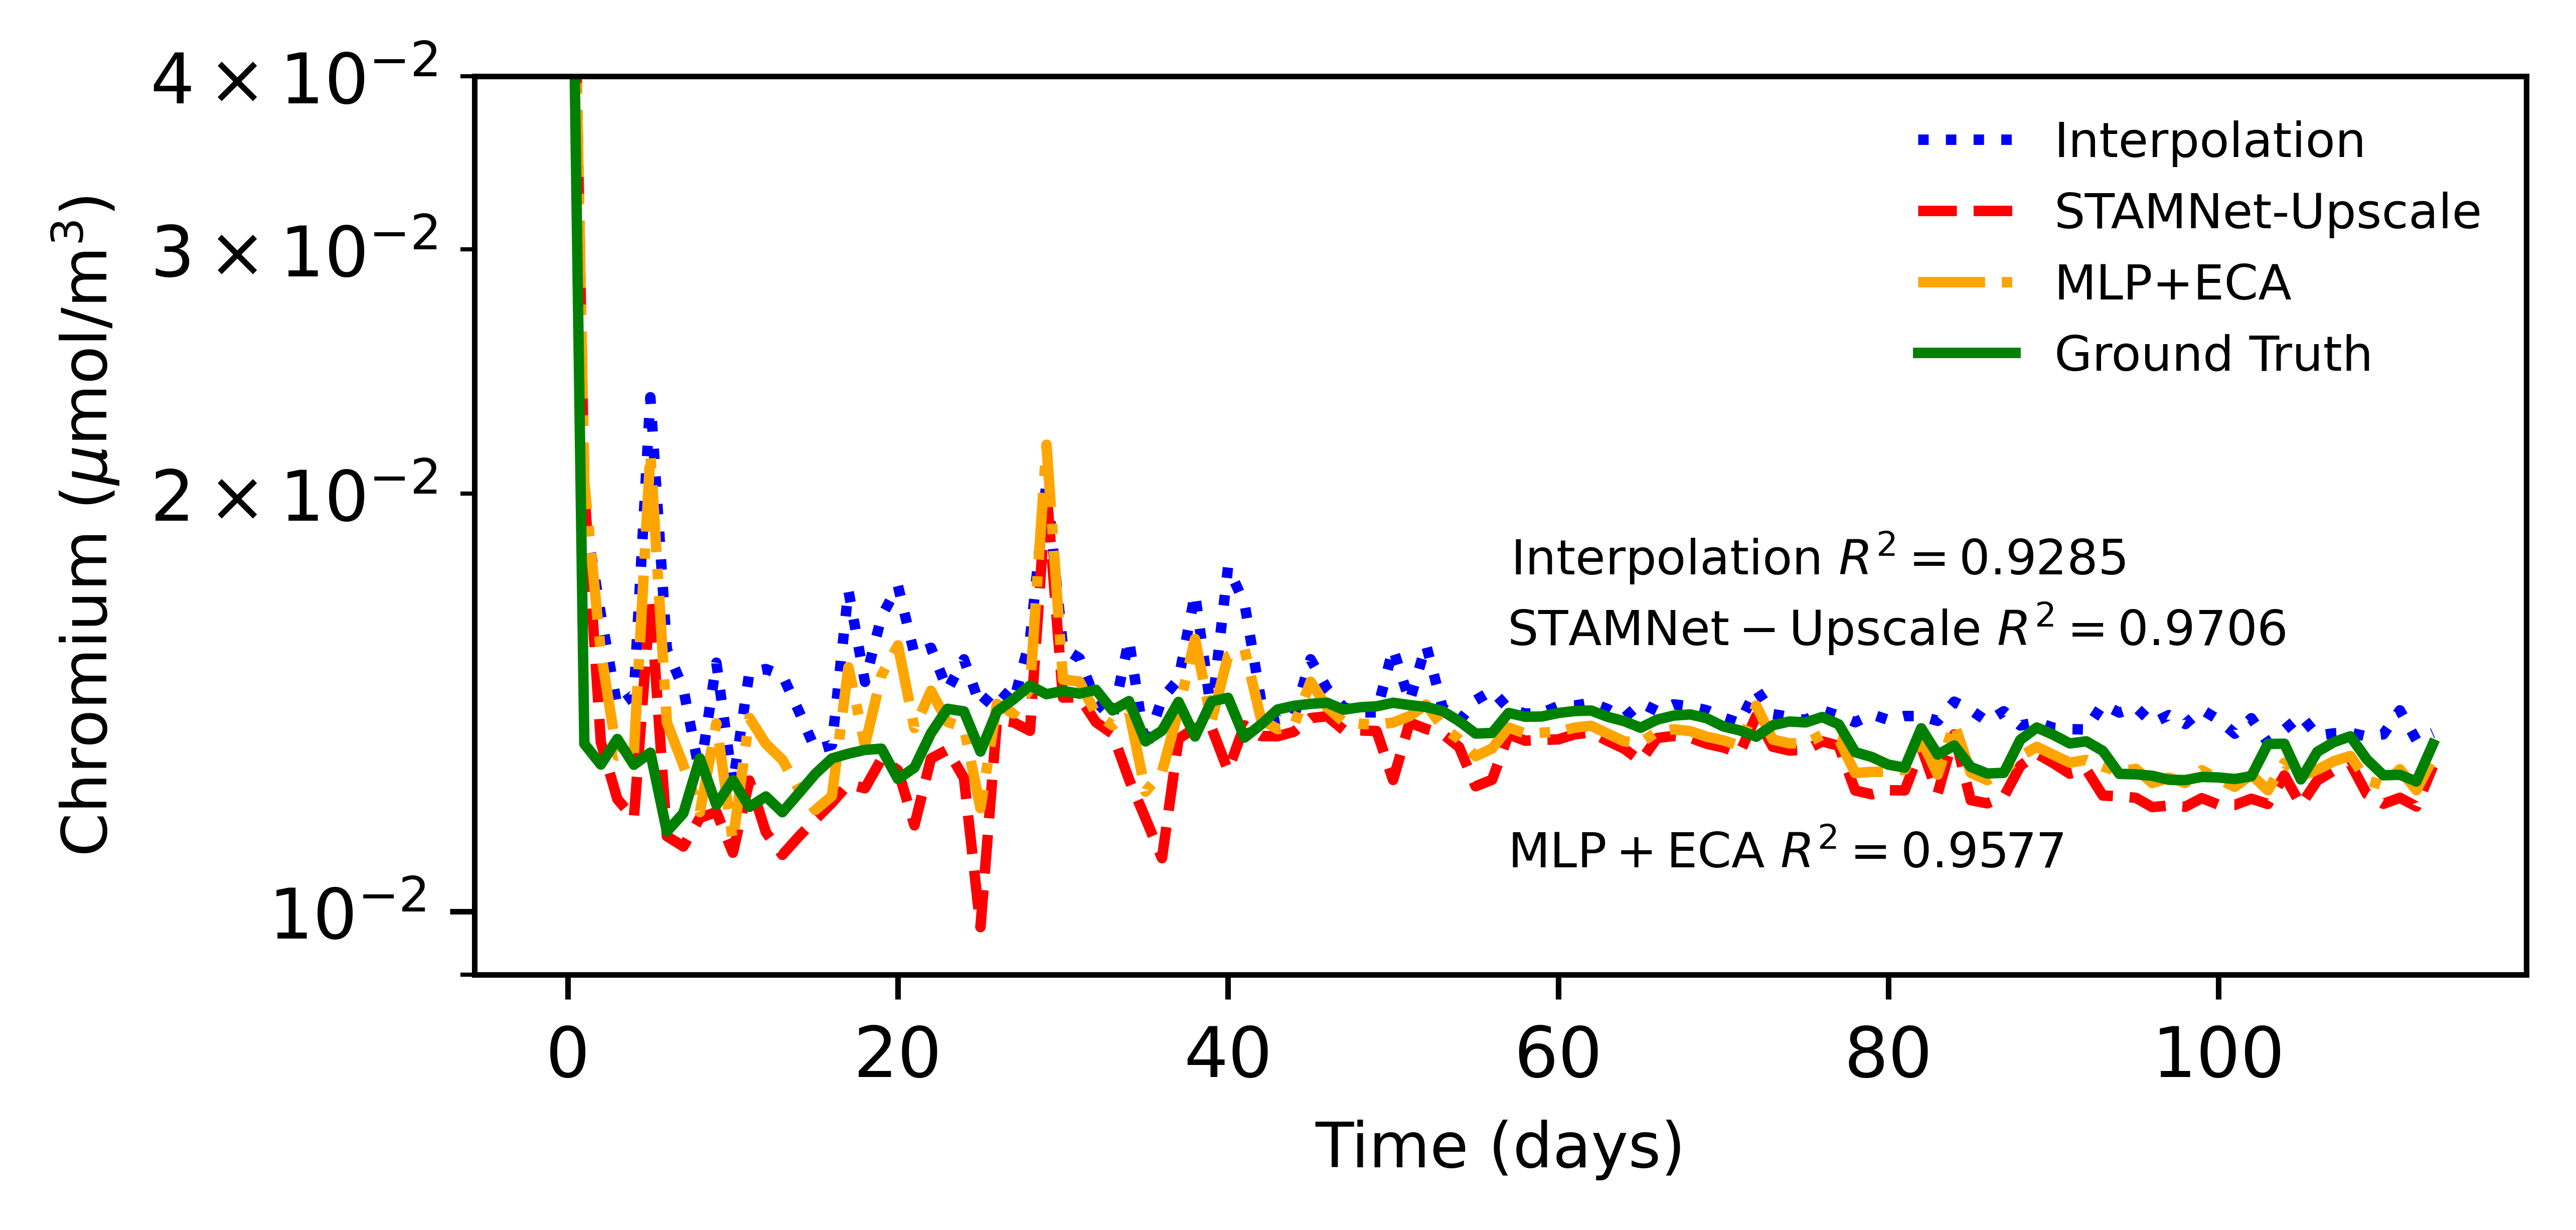

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2.5),dpi=1000)
plt.plot(torch.mean(inputs[idx].detach().cpu(),(0,2,3)), c='b', ls=':')
plt.plot(torch.mean(outputs[idx].detach().cpu(),(0,2,3)), c='r', ls='--')
plt.plot(torch.mean(outputs_eca[idx].detach().cpu(),(0,2,3)), c='orange', ls='-.')
plt.plot(torch.mean(labels[idx].detach().cpu(),(0,2,3)), c='g')

# low speed
# 0.8945628509394937
# 0.8552690954093534
# -0.3599919719650999

# high speed
# 0.9891587677288192
# 0.977810917509046
# 0.9711279695253231

# 0.9914756912632711
# 0.9817130688678347
# 0.9314000214387418

#molass
# 0.8018122709994522
# 0.8038750026265371
# -0.5579241732397224

# 0.9705980206499916
# 0.9576639647753773
# 0.9285488608882269

plt.text(75.75, 1.8e-2, r'$\mathrm{Interpolation}\ R^2 = 0.9285$', 
         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'),
         ha='center', va='center', fontsize=7)
plt.text(80.5, 1.6e-2, r'$\mathrm{STAMNet-Upscale}\ R^2 = 0.9706$', 
         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'),
         ha='center', va='center', fontsize=7)
plt.text(73.8, 1.1e-2, r'$\mathrm{MLP+ECA}\ R^2 = 0.9577$', 
         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'),
         ha='center', va='center', fontsize=7)
plt.ylabel(r'$\mathrm{Chromium}\ (\mu\mathrm{mol}/\mathrm{m^3})$', fontsize=9)
plt.xlabel('Time (days)',fontsize=9)
plt.legend(['Interpolation', 'STAMNet-Upscale', 'MLP+ECA','Ground Truth'], fontsize=7, edgecolor='white')
plt.yscale('log')
# plt.xscale('log')
# Adjust the layout
plt.tight_layout()
#plt.xlim([10,44])
plt.ylim([9e-3,4e-2])
# Save the figure with adjusted bbox
plt.savefig('time_comparison_full_upscale_crv_new.png', bbox_inches='tight', pad_inches=0.01)


In [164]:
ytest

array(['../pt_files_biov3/gaining_42_11_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_30_15_10xscale.pt',
       '../pt_files_biov3/high_gaining_14_10_10xscale.pt',
       '../pt_files_biov3/high_gaining_34_21_10xscale.pt',
       '../pt_files_biov3/high_gaining_41_20_10xscale.pt',
       '../pt_files_biov3/high_gaining_right_34_6_10xscale.pt',
       '../pt_files_biov3/high_gaining_right_41_12_10xscale.pt',
       '../pt_files_biov3/high_hanford_gain_18_10_10xscale.pt',
       '../pt_files_biov3/high_hanford_gain_37_9_10xscale.pt',
       '../pt_files_biov3/high_losing_22_16_10xscale.pt',
       '../pt_files_biov3/high_losing_34_15_10xscale.pt',
       '../pt_files_biov3/high_losing_39_13_10xscale.pt',
       '../pt_files_biov3/high_losing_47_9_10xscale.pt'], dtype='<U54')

In [163]:
labels.shape

torch.Size([13, 114, 100, 2000])

76.14189
10.525617
175.50987
5.964905
3.9757762
2.4090655
3.8786688
133.97794
1.4032172
48.66538
35.967045
18.406431
135.09053


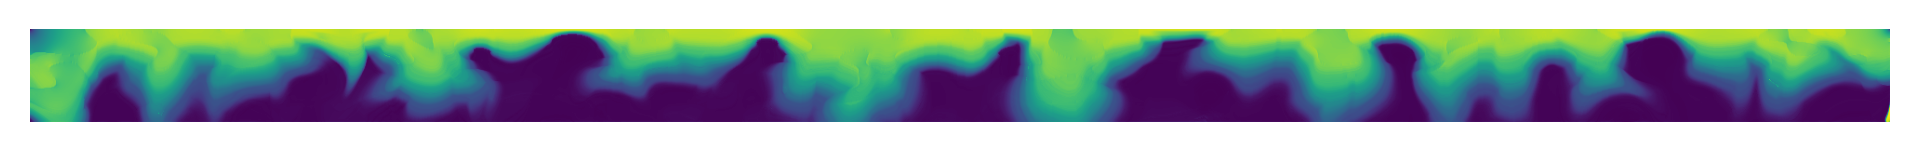

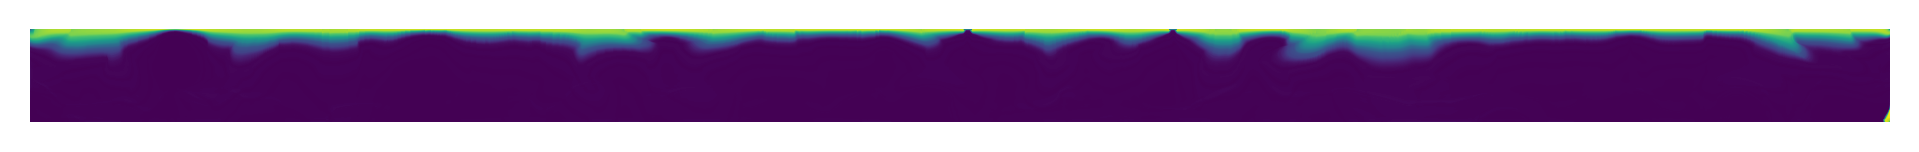

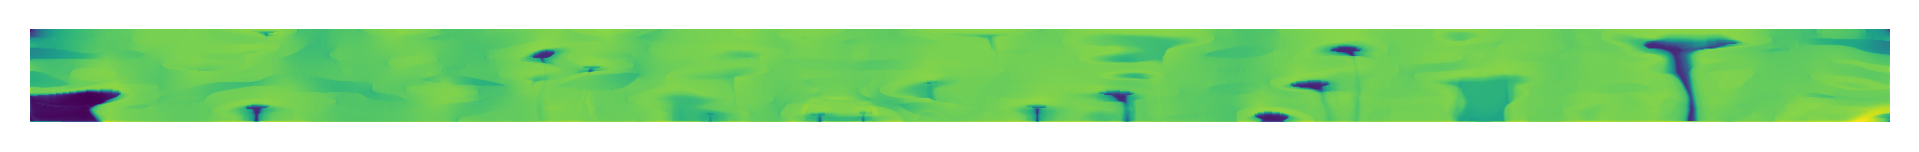

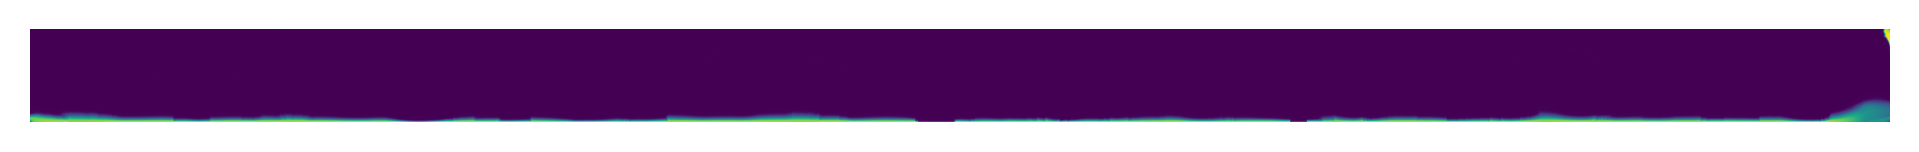

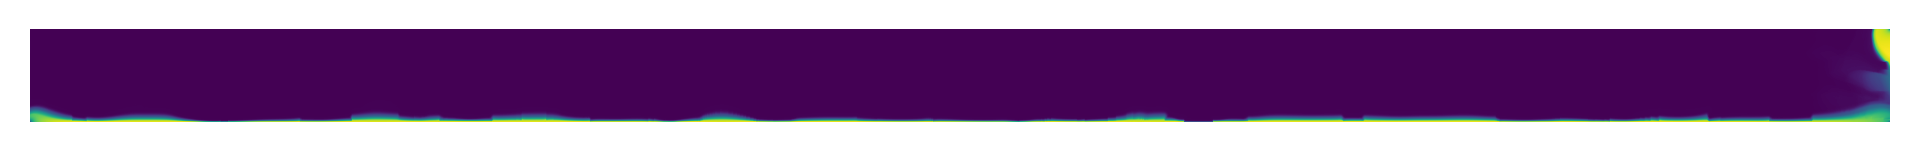

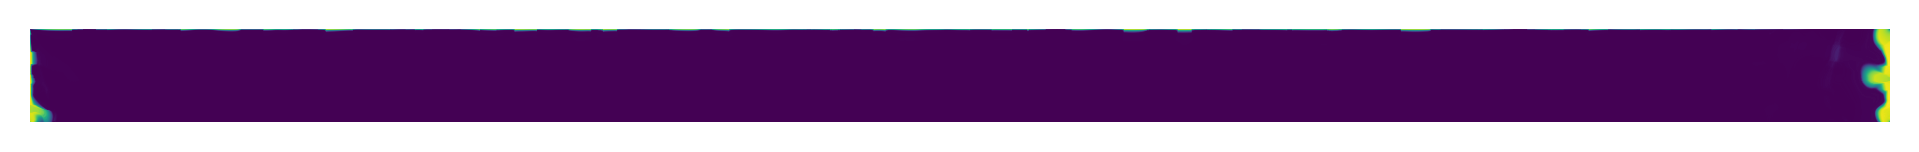

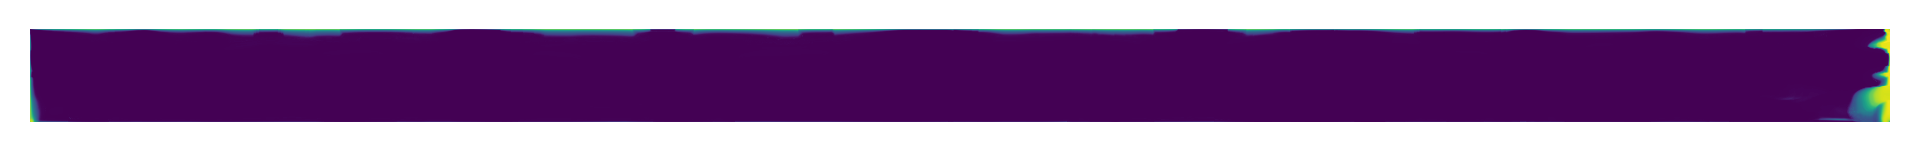

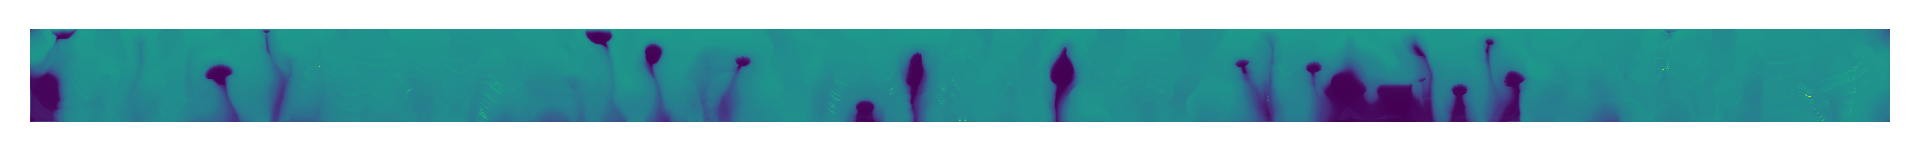

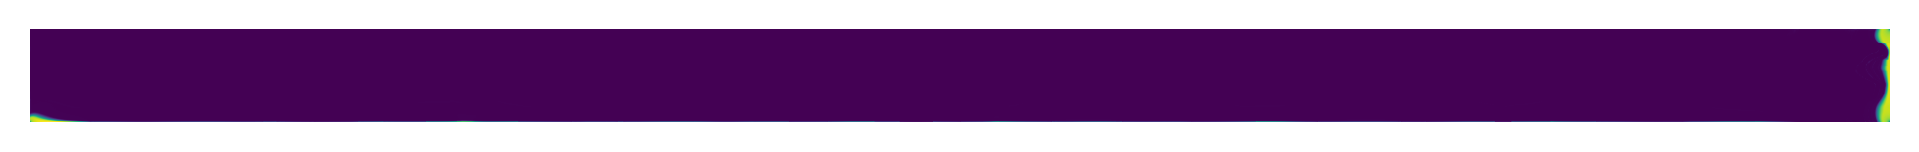

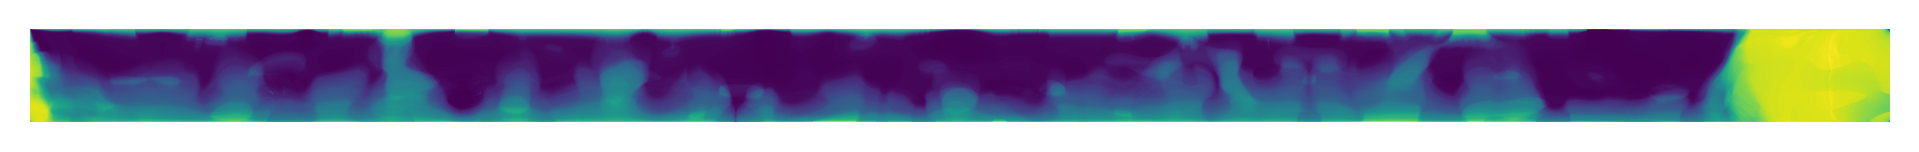

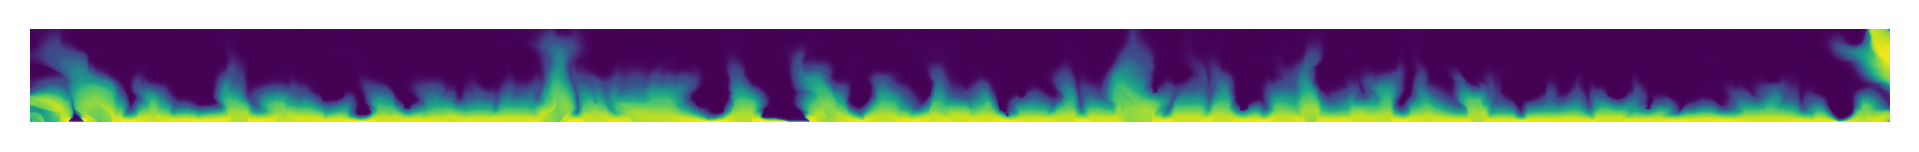

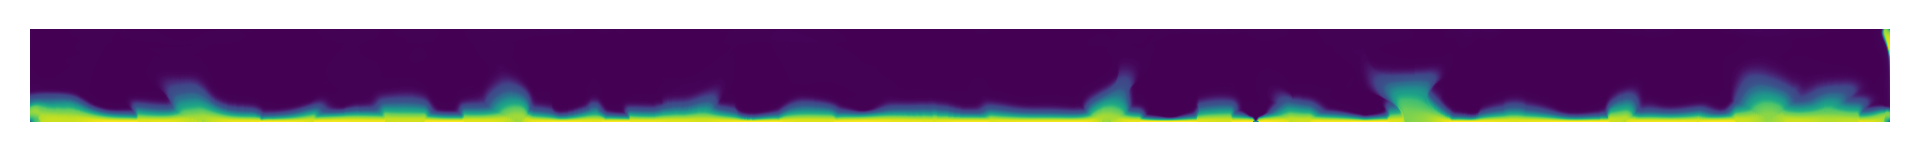

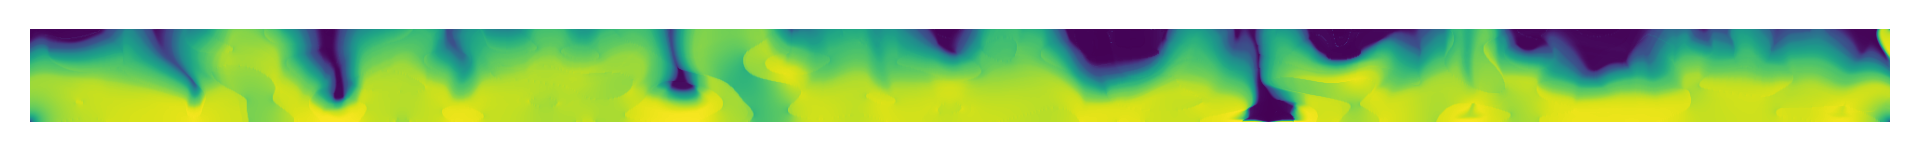

In [167]:
n=1
# for i in range(20,110,20):
for i in range(13):
    out = labels[i,:,:,:].cpu().detach().numpy()
    out = np.mean(out,0)
    print(np.mean(out))
    #out[out<=0] = np.min(out[out>0])
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    fig = plt.figure(figsize=(8,8), dpi=300)
    plt.imshow(out)
    plt.axis('off')
    # plt.savefig('output_t_'+str(i), bbox_inches='tight', pad_inches=0.1)
    #plt.show()
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

#orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

#nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
#print (orig_error, nn_error)

#high biomass test sims:
#0, 2, 7, 9, 12

#low biomass test sims:
#3,4,5,6,8

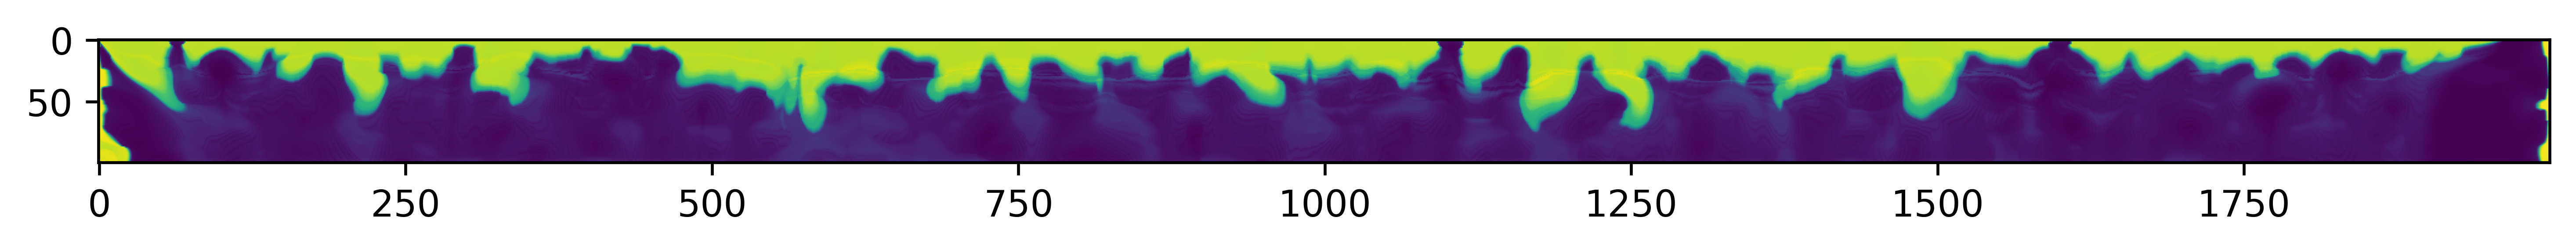

In [27]:
n=1
out = lab[3,40,:,:].cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

#orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

#nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
#print (orig_error, nn_error)

In [ ]:
### test_dataset = VelDataset(h5_files_train[41:], h5_files[41:])
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False,  num_workers=0)

In [70]:
outputs.shape

torch.Size([4, 90, 100, 2000])

In [57]:
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_labels = []
n=5

model1.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.float()
        labels = labels.float()
        #inputs = inputs.repeat_interleave(10, dim=3)
        #labels = labels[0,:,:,:,:].permute(0,2,1,3)
        # Forward pass
        outputs = model1(inputs)
        all_predictions.append(outputs.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        print(criterion2(labels, outputs))
        # inputs = inputs.repeat_interleave(10, dim=3)
        # print (criterion2(labels, inputs))
        # If you have a loss function, compute the loss (optional)
        #orig_error = np.abs(np.mean(inputs.cpu().detach().numpy()) - np.mean(labels.cpu().detach().numpy()))

        #nn_error = np.abs(np.mean(outputs.cpu().detach().numpy()) - np.mean(labels.cpu().detach().numpy()))
        #print (orig_error, nn_error)

C:\Users\marcb\AppData\Local\Temp\ipykernel_5548\437577996.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  low_scale = torch.load(file1)[:,:,:,0].float()
C:\Users\marc

tensor(5.8261, device='cuda:0')


In [60]:
inputs.shape

torch.Size([2, 90, 100, 400, 2])

In [16]:
print((0.0043909806+0.023773938+0.03114998+0.0043200747+0.0049229813+0.0026212687)/6)
print((0.0034722257+0.05977188+0.063873395+0.012106983+0.0037977695+0.0053939596)/6)

0.011863203883333333
0.024736035466666664


In [61]:
all_predictions[0].shape

(1, 90, 100, 2000)

In [62]:
criterion2(labels, outputs)

tensor(2559.6172, device='cuda:0')

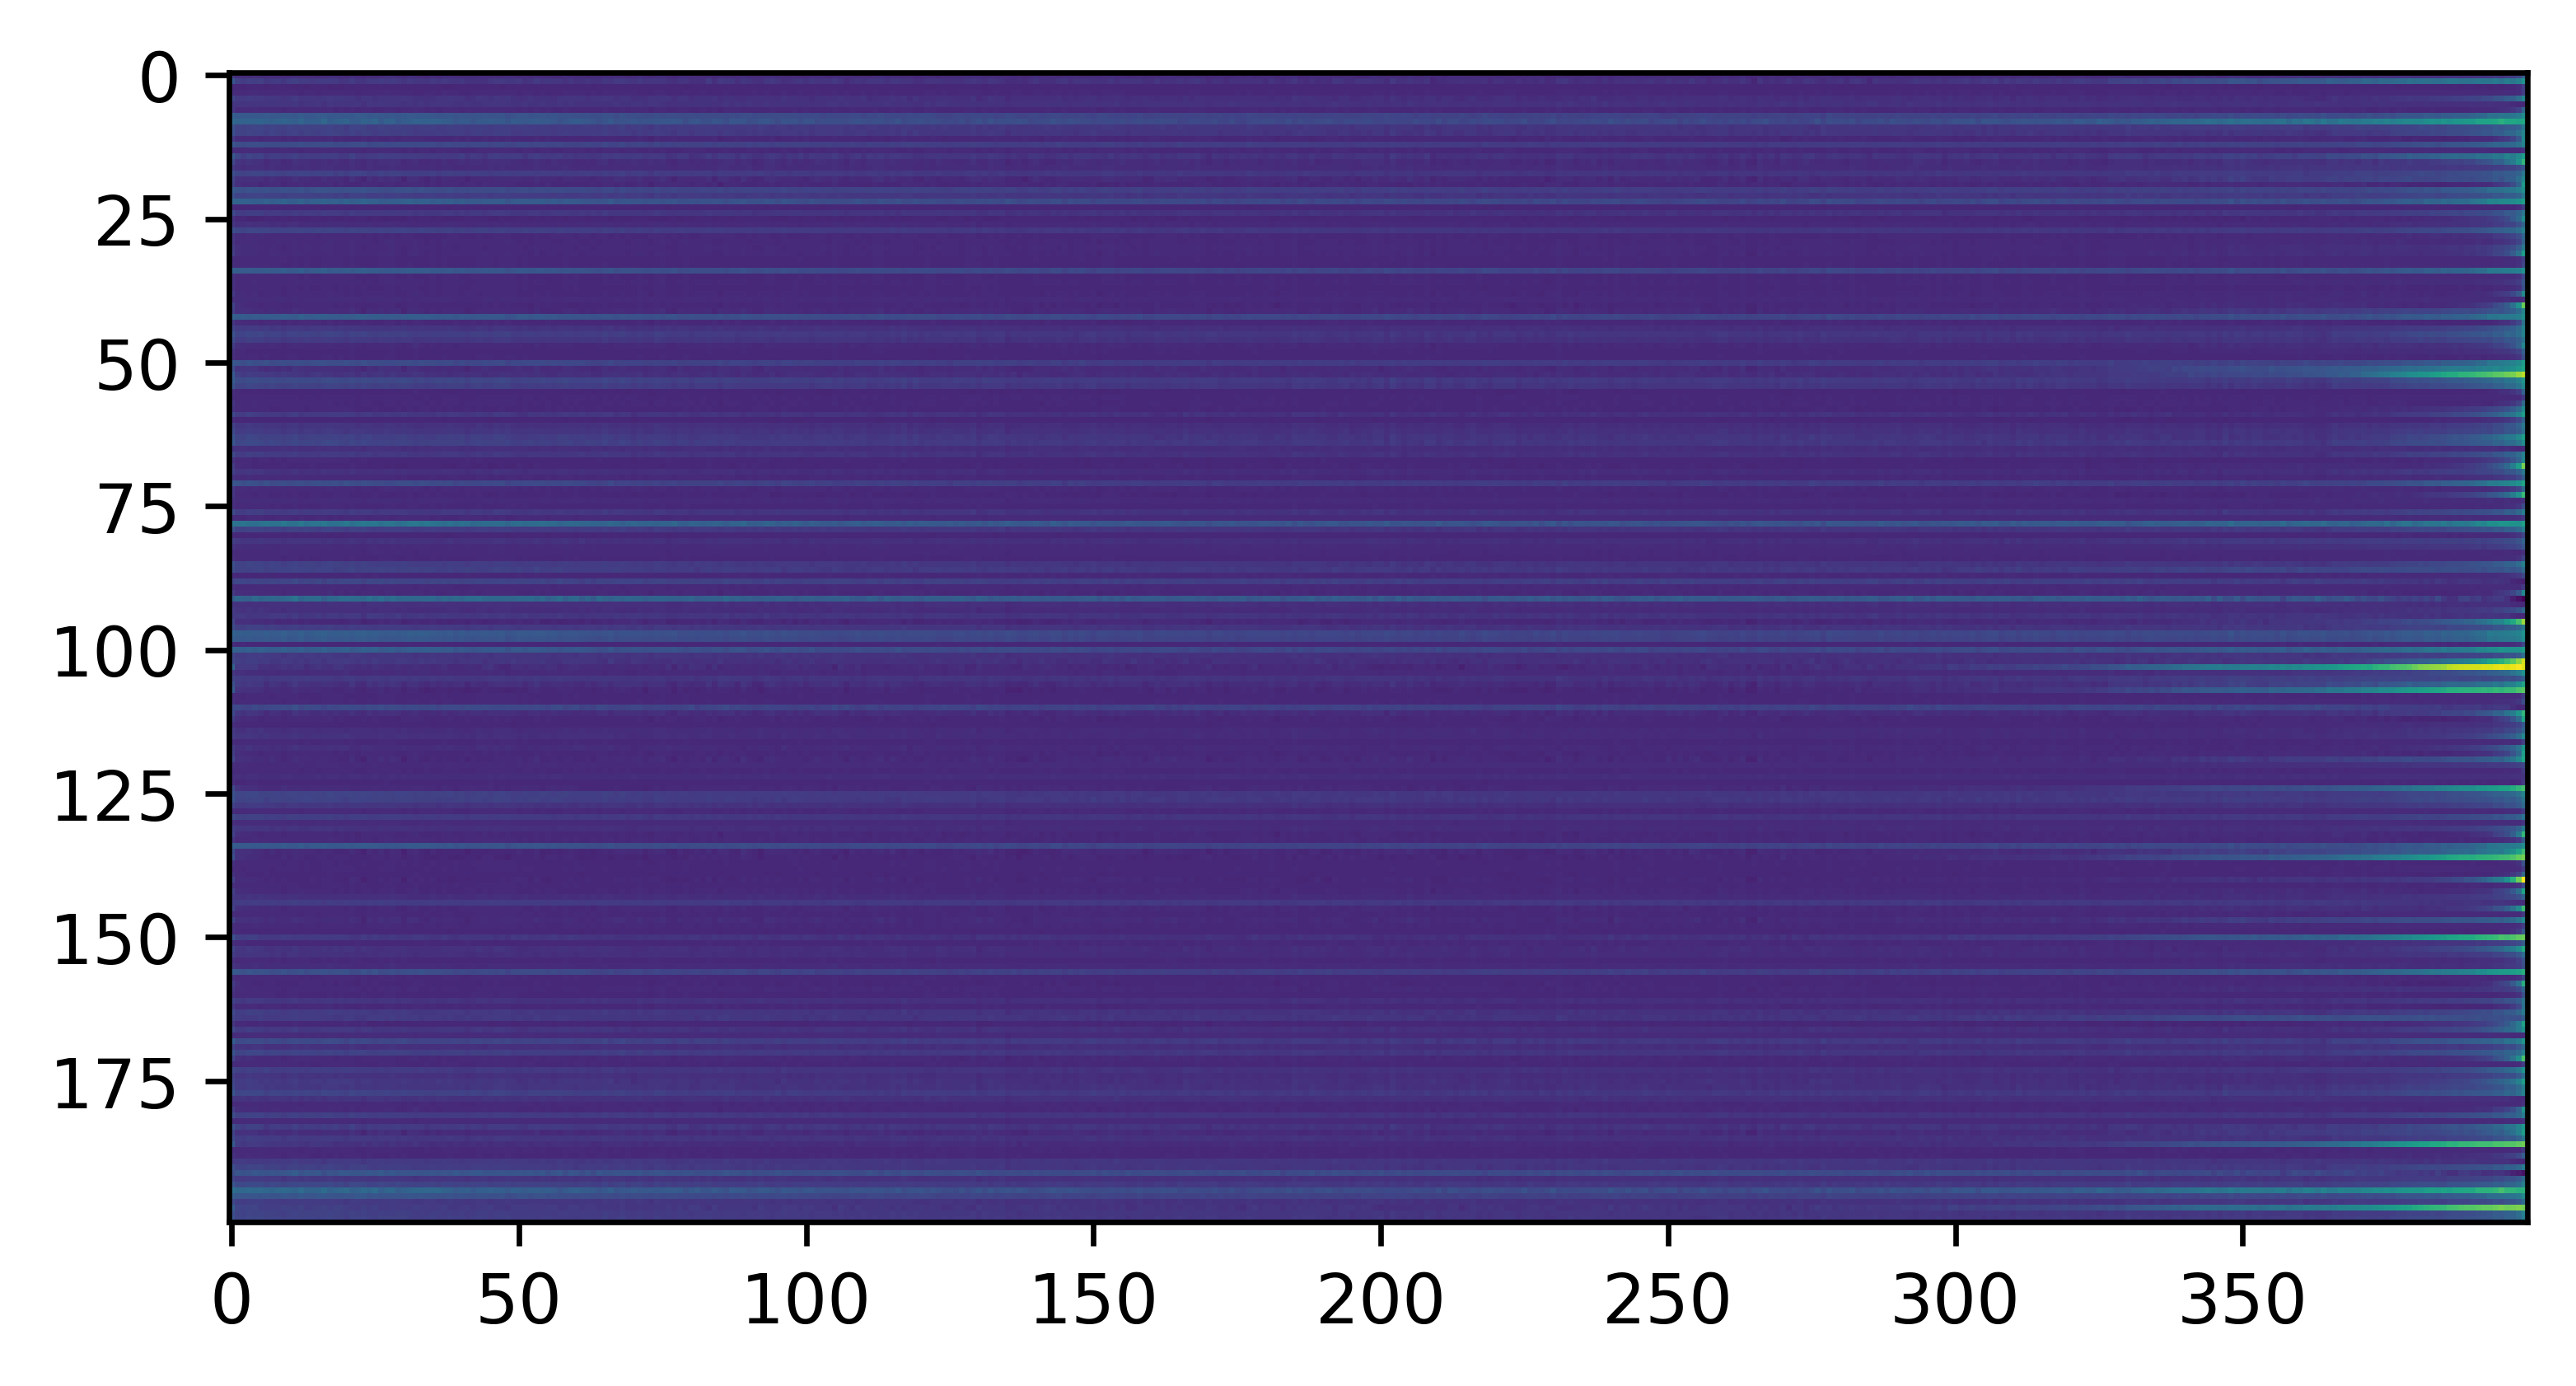

In [62]:
n=4
out = all_predictions[0][0,41,:,:]
#out = all_labels[0][0,89,:,:]

#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(6,6), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()



In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = UNet3(400, 2000).to(device)
model2 = UNet3(400, 2000).to(device)
model3 = UNet3(400, 2000).to(device)
model4 = UNet3(400, 2000).to(device)
model5 = UNet5(400, 2000).to(device)
model6 = UNet5(400, 2000).to(device)


#model2 = UNet2(400, 800).to(device)

#model3 = UNet2(800, 1200).to(device)

#model4 = UNet2(1200, 1600).to(device)

#model5 = UNet2(1600, 2000).to(device)
model1

UNet3(
  (up1): Conv2d(400, 800, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=6, out_features=12, bias=True)
  (d1): Dropout(p=0.1, inplace=False)
  (up2): Conv2d(800, 1200, kernel_size=(1, 1), stride=(1, 1))
  (fc2): Linear(in_features=12, out_features=1, bias=True)
  (up4): Conv2d(1200, 2000, kernel_size=(1, 1), stride=(1, 1))
)

In [15]:
model_weights_path = 'weights_vel2'
model1.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_press2'
model2.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_por2'
model3.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_crv2'
model4.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_molass2'
model5.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_bio2'
model6.load_state_dict(torch.load(model_weights_path))
model6

UNet5(
  (up1): Conv2d(400, 800, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=6, out_features=24, bias=True)
  (d1): Dropout(p=0.1, inplace=False)
  (up2): Conv2d(800, 1200, kernel_size=(1, 1), stride=(1, 1))
  (fc2): Linear(in_features=24, out_features=6, bias=True)
  (up4): Conv2d(1200, 2000, kernel_size=(1, 1), stride=(1, 1))
  (fc3): Linear(in_features=6, out_features=1, bias=True)
)

In [24]:
model7 = UNet4(400, 2000).to(device)
model7

UNet4(
  (fc1): Linear(in_features=6, out_features=6, bias=True)
)

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR


#class CustomDataset(Dataset):
#    def __init__(self, x, target):
#        """
#        Args:
#            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
#        """
#        self.x = torch.tensor(x, dtype=torch.float32)
#        self.target = torch.tensor(target, dtype=torch.float32)#
#
#    def __len__(self):
#        return len(self.x)
#
#    def __getitem__(self, idx):
#        input = self.x[idx]
#        target = self.target[idx]
#        return input, target

#criterion3 = SmoothnessLoss(.1, .1)
#dataset = CustomDataset(x, y)
#dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#criterion1 = DivLoss()
criterion2 = nn.MSELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.0002)
optimizer3 = optim.Adam(model3.parameters(), lr=0.0002)
optimizer4 = optim.Adam(model4.parameters(), lr=0.0002)
optimizer5 = optim.Adam(model5.parameters(), lr=0.0002)
optimizer6 = optim.Adam(model5.parameters(), lr=0.0002)
optimizer7 = optim.Adam(model5.parameters(), lr=0.0002)


gamma = .9999  # The exponential decay factor (adjust as needed)
scheduler1 = ExponentialLR(optimizer1, gamma=gamma)
scheduler2 = ExponentialLR(optimizer2, gamma=gamma)
scheduler3 = ExponentialLR(optimizer3, gamma=gamma)
scheduler4 = ExponentialLR(optimizer4, gamma=gamma)
scheduler5 = ExponentialLR(optimizer5, gamma=gamma)
scheduler6 = ExponentialLR(optimizer6, gamma=gamma)
scheduler7 = ExponentialLR(optimizer7, gamma=gamma)

optimizers = [optimizer1,optimizer2,optimizer3,optimizer4,optimizer5,optimizer6,optimizer7]
schedulers = [scheduler1,scheduler2,scheduler3,scheduler4,scheduler5,scheduler6,scheduler7]
#import gc
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()
model = [model1,model2,model3,model4,model5,model6]
model7.train()
# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    
    count=0
    running_loss=0
    for batch in dataloader:
        inputs = batch[0].to(device)
        inputs = inputs.float()
        labels = batch[1].to(device)
        labels = labels.float()
        #labels = labels[0,:,:,:,4].permute(2,1,0)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        outputs = torch.zeros((80,2000,100,6)).to(device)
        for k in range(labels.shape[3]):
            #with torch.no_grad():
            outputs[:,:,:,k] = model[k](inputs)

        #labels1 = labels[:,0:400,:,:]
        #labels2 = labels[:,0:800,:,:]
        #labels3 = labels[:,0:1200,:,:]
        #labels4 = labels[:,0:1600,:,:]
        optimizer1.zero_grad()
        #optimizer2.zero_grad()
        #optimizer3.zero_grad()
        #optimizer4.zero_grad()
        #optimizer5.zero_grad()
        #outputs1 = model1(inputs)
        #outputs2 = model2(outputs1)
        #outputs3 = model3(outputs2)
        #outputs4 = model4(outputs3)
        outputs = model7(outputs)
        #outputs2 = outputs2[:,400:800,:,:]
        #outputs3 = outputs3[:,800:1200,:,:]
        #outputs4 = outputs4[:,1200:1600,:,:]
        
        #loss1 = criterion2(outputs1, labels1)
        #loss2 = criterion2(outputs2, labels2)
        #loss3 = criterion2(outputs3, labels3)
        #loss4 = criterion2(outputs4, labels4)
        loss = criterion2(outputs, labels)

        #loss = (loss1*4+loss2+loss3+loss4+loss5)/8

        loss.backward()
        optimizer1.step()
        #optimizer2.step()
        #optimizer3.step()
        #optimizer4.step()
        #optimizer5.step()
        scheduler1.step()
        ##scheduler2.step()
        #scheduler3.step()
        #scheduler4.step()
        #scheduler5.step()
        count=count+1
        running_loss = running_loss+loss.item()
    #model7.eval()
# Iterate through the test data
    #nn_errors=[]
    #orig_errors=[]
    #with torch.no_grad():
    #    for inputs, labels in test_dataloader:
    #        inputs = inputs.to(device)
    #        labels = labels.to(device)
    #        inputs = inputs.float()
    #        labels = labels.float()
    #        labels = labels[0,:,:,:,:].permute(0,2,1,3)
    #        # Forward pass
    #        outputs = model1(inputs)
    #        #all_predictions.append(outputs.cpu().detach().numpy())
    #        #all_labels.append(labels.cpu().detach().numpy())
    #        # If you have a loss function, compute the loss (optional)
    #        n=0
    #        orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
    
    #        nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
    #        nn_errors.append(nn_error)
    #        orig_errors.append(orig_error)
    #print (np.mean(orig_errors), np.mean(nn_errors))
    current_lr = optimizer1.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count}, Learning Rate: {current_lr:.8f}")

Epoch 1/200, Loss: 159.88739277124404, Learning Rate: 0.00099601
Epoch 2/200, Loss: 153.98396366238595, Learning Rate: 0.00099203
Epoch 3/200, Loss: 153.21422865986824, Learning Rate: 0.00098807
Epoch 4/200, Loss: 152.37736921310426, Learning Rate: 0.00098413
Epoch 5/200, Loss: 151.97827052175998, Learning Rate: 0.00098020
Epoch 6/200, Loss: 151.8371748328209, Learning Rate: 0.00097628
Epoch 7/200, Loss: 151.63196961581707, Learning Rate: 0.00097239
Epoch 8/200, Loss: 151.5796983897686, Learning Rate: 0.00096851
Epoch 9/200, Loss: 151.64396729171276, Learning Rate: 0.00096464
Epoch 10/200, Loss: 151.4676573753357, Learning Rate: 0.00096079
Epoch 11/200, Loss: 151.48888604044913, Learning Rate: 0.00095695
Epoch 12/200, Loss: 151.32529764473438, Learning Rate: 0.00095313
Epoch 13/200, Loss: 151.35672963261604, Learning Rate: 0.00094933
Epoch 14/200, Loss: 151.29406080842017, Learning Rate: 0.00094554
Epoch 15/200, Loss: 151.2871945589781, Learning Rate: 0.00094176
Epoch 16/200, Loss: 151

KeyboardInterrupt: 

In [35]:
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

model7.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.float()
        labels = labels.float()
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        outputs = torch.zeros((80,2000,100,6)).to(device)
        for k in range(labels.shape[3]):
            #with torch.no_grad():
            outputs[:,:,:,k] = model[k](inputs)
        # Forward pass
        #outputs = model7(outputs)
        all_predictions.append(outputs.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        loss = criterion(outputs,labels)
        print ("Loss: ", loss.item())
        # If you have a loss function, compute the loss (optional)
        orig_error = np.abs(np.mean(inputs[0,:,:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,:].cpu().detach().numpy()))

        nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,:].cpu().detach().numpy()))
        print (orig_error, nn_error)

Loss:  2.6761043071746826
0.09839177 0.5566623
Loss:  2.659982442855835
0.12734497 0.61660105
Loss:  2.929009437561035
0.1413343 0.091187716
Loss:  3.2276692390441895
0.026858568 0.7345431
Loss:  2.6161303520202637
0.050297737 0.16991472
Loss:  1.6953140497207642
0.022475481 0.3268901


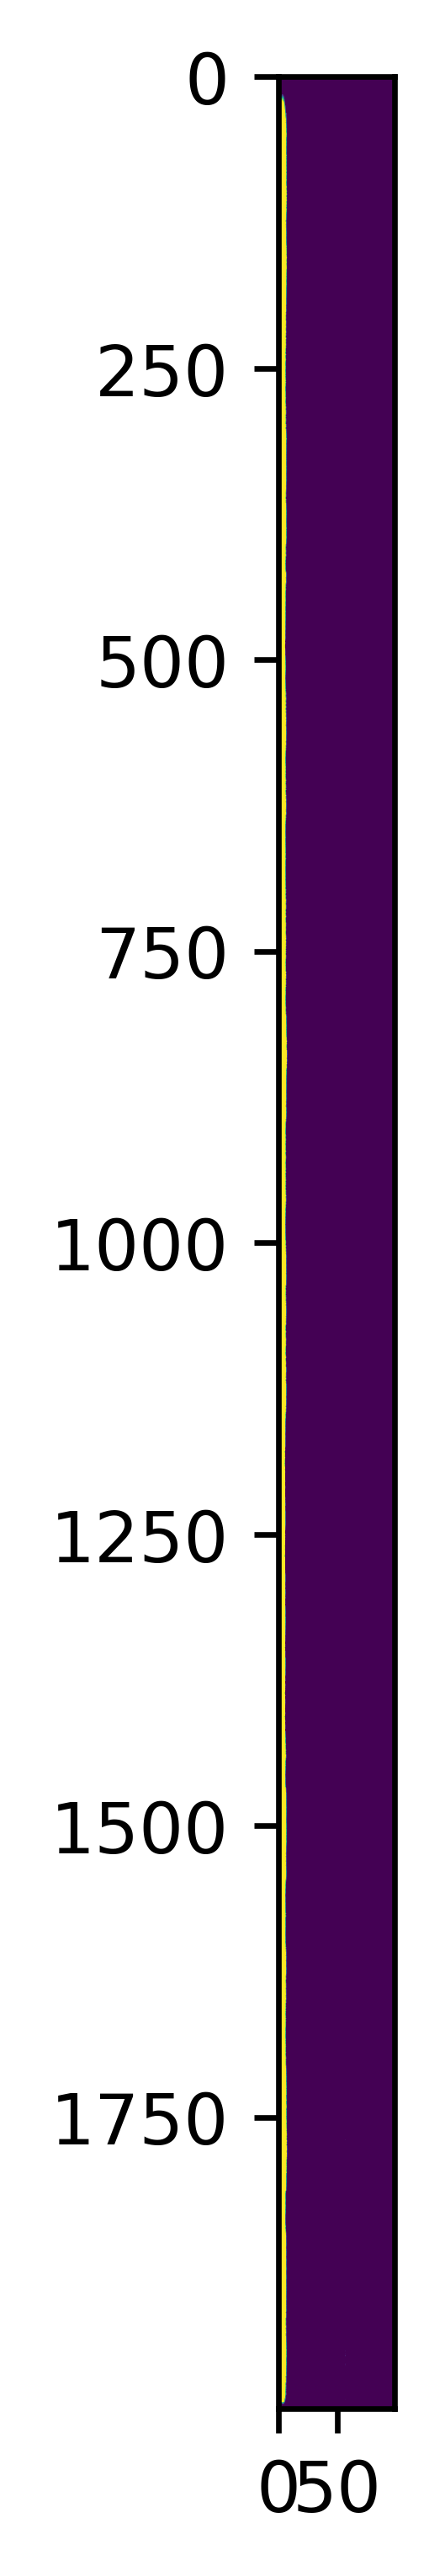

In [62]:
n=0
out = all_predictions[4][70,:,:,n]#.cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(6,6), dpi=600)
plt.imshow(out, vmin = -.5, vmax=.5)

In [ ]:
import torch
import torch.nn as nn

def aggregate_horizontal_means(tensor):
    """
    Aggregate horizontal means for every 10 rows along the 100-length dimension.
    Args:
        tensor (torch.Tensor): Tensor of shape [batch_size, 100, 2000, 19].
    Returns:
        torch.Tensor: Tensor of shape [batch_size, 10, 19].
    """
    batch_size, _, width, channels = tensor.shape
    aggregated_means = []

    for start_row in range(0, 100, 10):
        # Extract 10-row block and compute mean
        block = tensor[:, start_row:start_row + 10, :, :]
        block_mean = torch.mean(block, dim=2)  # Mean along the width (2000)
        block_mean = torch.mean(block_mean, dim=1)  # Mean along the 10 rows
        aggregated_means.append(block_mean)

    # Combine the means into a single tensor
    aggregated_means_tensor = torch.stack(aggregated_means, dim=1)
    return aggregated_means_tensor

class CustomMSELoss(nn.Module):
    def __init__(self):
        super(CustomMSELoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        # Aggregate horizontal means
        y_pred_agg = aggregate_horizontal_means(y_pred)
        y_true_agg = aggregate_horizontal_means(y_true)

        # Calculate MSE between the aggregated tensors
        return self.mse_loss(y_pred_agg, y_true_agg)



# Example usage
# Assuming y_pred and y_true are your model's output and ground truth tensors respectively
# with shape [batch_size, 100, 2000, 19]
custom_loss = CustomMSELoss()
#loss = custom_loss(y_pred, y_true)

import torch
import torch.nn as nn
import torch.nn.functional as F


class SmoothnessLoss(nn.Module):
    def __init__(self, dx, dy):
        """

        """
        super(SmoothnessLoss, self).__init__()
        self.dx = dx
        self.dy = dy

    def forward(self, v):
        v1 = v[:,:,:,0].permute(0,2,1)
        v2 = v[:,:,:,1].permute(0,2,1)

        # Calculate horizontal and vertical differences
        horizontal_diff = torch.abs(torch.diff(v1, dim=2) / self.dx)
        vertical_diff = torch.abs(torch.diff(v2, dim=1) / self.dy)

        # Calculate the squared differences (L2 norm)
        horizontal_loss = torch.sum(horizontal_diff)
        vertical_loss = torch.sum(vertical_diff)

        # Total loss
        loss = horizontal_loss + vertical_loss
        #if loss > .001:

        return loss

# Example usage with dummy data
# Create sample velocity fields as PyTorch tensors



def calculate_divergence(vx, vy, dx, dy):
    # Use PyTorch's built-in functions for gradient computation
    dvx_dx = torch.diff(vx, dim=1) / dx
    dvy_dy = torch.diff(vy, dim=2) / dy


    # Pad the last dimension to match the original size
    #dvx_dx = F.pad(dvx_dx, (0, 1), "constant", 0)
    #dvy_dy = F.pad(dvy_dy, (0, 0, 0, 1), "constant", 0)

    return dvx_dx[:,:,0:1999] + dvy_dy[:,0:99,:]

class DivLoss(nn.Module):
    def __init__(self):
        super(DivLoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        dx = .1
        dy = dx
        
        ypred_vx = y_pred[:,:,:,0].permute(0,2,1)
        ypred_vy = y_pred[:,:,:,1].permute(0,2,1)
    
        ytrue_vx = y_true[:,:,:,0].permute(0,2,1)
        ytrue_vy = y_true[:,:,:,1].permute(0,2,1)
        
        y_pred_div = calculate_divergence(ypred_vx, ypred_vy, dx, dy)
        y_true_div = calculate_divergence(ytrue_vx, ytrue_vy, dx, dy)

        return torch.mean(torch.abs(torch.abs(y_pred_div)-torch.abs(y_true_div)))

class NormLoss(nn.Module):
    def __init__(self):
        super(NormLoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        true_means=[]
        pred_means=[]
        for i in y_pred.shape[3]:
            ypred_flat = torch.flatten(y_pred[:,:,:,i])
            ypred_mean = torch.mean(ypred_flat)
            ypred_std = torch.std(ypred_flat)
            pred_means.append([ypred_mean, ypred_std])

            ytrue_flat = torch.flatten(y_true[:,:,:,i])
            ytrue_mean = torch.mean(ytrue_flat)
            ytrue_std = torch.std(ytrue_flat)
            true_means.append([ytrue_mean, ytrue_std])

        return self.mse_loss(pred_means, true_means)
# Example usage (assuming y_pred and y_true are PyTorch tensors with appropriate dimensions)
# loss_fn = DivLoss()
# loss = loss_fn(y_pred, y_true)



#divergence = calculate_divergence(vx, vy, dx, dy)


In [ ]:
vx = torch.rand(114, 100, 2000)  # Assuming the shape [batch_size, height, width]
vy = torch.rand(114, 100, 2000)

# Assume uniform grid spacing
dx = 0.1  # x-spacing
dy = 0.1  # y-spacing

# Create an instance of the SmoothnessLoss class
smoothness_loss_fn = SmoothnessLoss(dx, dy)

# Calculate smoothness loss for vx and vy
smoothness_loss_vx = smoothness_loss_fn(vx)
smoothness_loss_vy = smoothness_loss_fn(vy)

(smoothness_loss_vx.item(), smoothness_loss_vy.item())

In [ ]:
dx = .1
dy = dx

ypred_vx = outputs[:,:,:,0].permute(0,2,1)
ypred_vy = outputs[:,:,:,1].permute(0,2,1)

ytrue_vx = labels[:,:,:,0].permute(0,2,1)
ytrue_vy = labels[:,:,:,1].permute(0,2,1)

y_pred_div = calculate_divergence(ypred_vx, ypred_vy, dx, dy)
y_true_div = calculate_divergence(ytrue_vx, ytrue_vy, dx, dy)
plt.figure(figsize=(12,12))
plt.imshow(np.abs(y_pred_div.cpu().detach().numpy()[50,:,:]), norm=LogNorm())
plt.colorbar()

In [ ]:
# Assuming you have a CustomDataset class
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR


class CustomDataset(Dataset):
    def __init__(self, x, target):
        """
        Args:
            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
        """
        self.x = torch.tensor(x, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        input = self.x[idx]
        target = self.target[idx]
        return input, target

from sklearn.preprocessing import StandardScaler

#scalerx = StandardScaler()
#scalery = StandardScaler()

#x_scaled = scalerx.fit_transform(x.reshape(1, -1))
#y_scaled = scalery.fit_transform(y.reshape(1 -1))

criterion3 = SmoothnessLoss(.1, .1)
dataset = CustomDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(n_channels=100, n_classes=9).to(device)
criterion1 = DivLoss()
criterion2 = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
gamma = 0.99998  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)
#import gc

# Training loop
num_epochs = 40000
for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
         # Assuming you want to compare against the input
        loss2 = criterion2(outputs, labels)
        if epoch < 3000:
            loss1 = criterion1(outputs, labels) 
            loss3 = criterion3(outputs)
            loss = (.2*loss1+loss2*2 + .000000002*loss3)/3
        else:
            loss1 = criterion1(outputs, labels) 
            loss = loss2+.001*loss1
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")



In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0015)
gamma = 0.99994  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)
#import gc

# Training loop
num_epochs = 30000
for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss1 = criterion1(outputs, labels)  # Assuming you want to compare against the input
        loss2 = criterion2(outputs, labels)
        loss3 = criterion3(outputs)
        loss = (loss1*.1+loss2*2 + .000000001*loss3)/3
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")

In [ ]:
criterion = DivLoss()#nn.MSELoss()

criterion(outputs, labels)

In [ ]:
labels[10,:,:,1]

In [ ]:
num_epochs = 30000

dataset = CustomDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
from torch.optim.lr_scheduler import ExponentialLR

# Model, loss, and optimizer

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0012)
gamma = 0.99995  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)

for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Assuming you want to compare against the input
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']

    # Print the current learning rate    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")


In [ ]:
with h5py.File(h5_files[0], 'r') as file:
    for name in file:
        #if isinstance(file[name], h5py.Group):
        print(file[name])

In [171]:
torch.save(model1.state_dict(), 'resolution_model')

3.9034523e-05 0.006597762


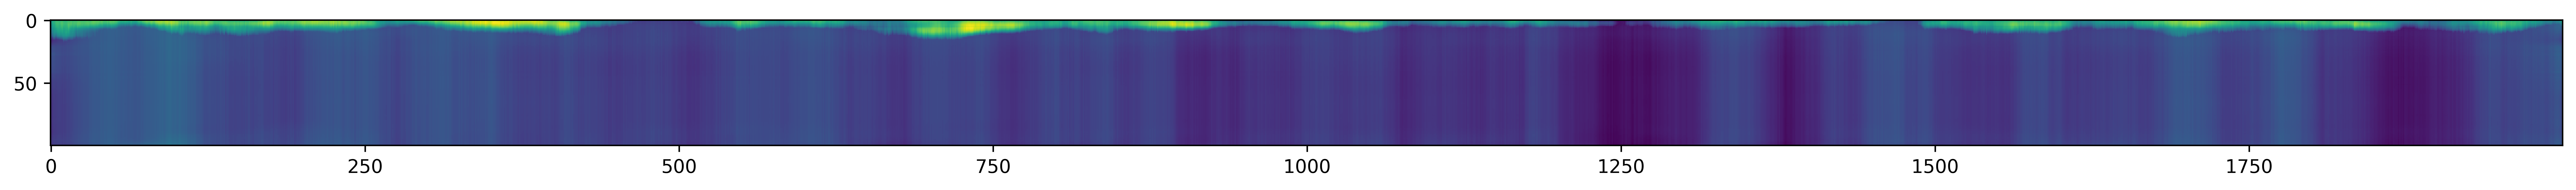

In [18]:
n=6
out = outputs[100,:,:,n].permute(1,0).cpu().detach().numpy()
out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(24,24), dpi=600)
plt.imshow(out)#, norm=LogNorm(.0001,.5))
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

nn_error = np.abs(np.mean(outputs[:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
print (orig_error, nn_error)

In [ ]:
np.max(out)

In [ ]:
# Number of time steps and features to extract
#file_path = '/mnt/data/high_losing_42_11_1xscale.h5'
import h5py
import cv2
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

base_dir = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/'
f_dir = os.listdir(base_dir)
h5_files = []
h5_files_train = []

# Iterate over all files in the directory
for filename in f_dir:
    if (filename.endswith(".h5")) & ((("2x" in filename))):
        h5_files_train.append(base_dir+filename)
#     if (filename.endswith(".h5")) & (("8x" in filename)):
#         if (("10_5" not in filename) & ("20_20" not in filename)):
#             h5_files_train.append(base_dir+filename)
    if (filename.endswith(".h5")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        h5_files.append(base_dir+filename)
# Run the processing in parallel
h5_files_train =  sorted(
    h5_files_train,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)
h5_files =  sorted(
    h5_files,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)

h5_files_test = h5_files[20:21]
h5_files_train_test = h5_files_train[20:21]
hdf5_file = h5py.File(h5_files_test[0], 'r')
# Fetching the first five time steps
time_steps = sorted(list(hdf5_file.keys()))

# Inspecting the features present in each of these time steps
features_per_time_step = {time_step: list(hdf5_file[time_step].keys()) for time_step in time_steps}


num_time_steps = 115
num_features = 9  # As observed from the dataset

# Initialize the final array with the desired shape [5, 100, 200, 19]
y_test = np.zeros((len(h5_files_test),num_time_steps-1, 100, 2000, num_features))

# Extracting and reshaping data from the first five time steps
for i in range(len(h5_files_test)):
    hdf5_file = h5py.File(h5_files_test[i], 'r')
    for t_idx, time_step in enumerate(time_steps[2:]):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features_per_time_step[time_step]):
            if ('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
                dataset = hdf5_file[time_step][feature]
                y_test[i, t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
                count = count+1

# Checking the shape of the extracted data array


x_test = np.zeros((len(h5_files_train_test),num_time_steps-1, 100, 400, num_features))

# Extracting and reshaping data from the first five time steps
for i in range(len(h5_files_train_test)):
    hdf5_file = h5py.File(h5_files_train_test[i], 'r')
    for t_idx, time_step in enumerate(time_steps[2:]):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features_per_time_step[time_step]):
            if ('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
                dataset = hdf5_file[time_step][feature]
                x_test[i, t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
                count = count+1

In [ ]:
#torch.save(model, 'model')
#torch.save(model.state_dict(), 'model_weights2')
x_test.shape


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_channels=100, n_classes=9).to(device)


In [ ]:
model_weights_path = 'weights_att'

# Load the model's state dictionary (weights)
model1.load_state_dict(torch.load(model_weights_path))
model1

In [ ]:
scales=[[-3.8411125549317013, 597.4671440974266],
 [-615.1042997637863, 357.84820748247256],
 [0.0, 6822.169871757096],
 [0.0001, 0.6],
 [7.788525219135888, 15.024872883573318],
 [9.998195511764697e-21, 0.0021615209557147423],
 [9.992418077905442e-21, 0.00019222389277486797],
 [1e-10, 353.88041919640534],
 [9.999999999999992e-21, 4.945182939521276]]

for i in range(x_test.shape[4]):
    xmin = scales[i][0]
    xmax = scales[i][1]
    x_test[:,:,:,:,i] = (x_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    y_test[:,:,:,:,i] = (y_test[:,:,:,:,i] - xmin)/(xmax-xmin)
scales

In [ ]:
for i in range(x_test.shape[4]):
    xmin = scales[i][0]
    xmax = scales[i][1]
    x_test[:,:,:,:,i] = (x_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    y_test[:,:,:,:,i] = (y_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    #scales.append([xmin,xmax])
y_test[0,100,0,:,7]

In [ ]:
test_dataset = CustomDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # Adjust batch size as needed

# Define a loss function if needed (e.g., for validation)
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_true_labels = []

model1.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        # Forward pass
        outputs = model1(inputs)
        all_predictions.append(output.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        # If you have a loss function, compute the loss (optional)
        loss = criterion(outputs, labels)
        print (loss)


# Calculate accuracy (or other evaluation metrics)


In [ ]:
n=7
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(24,24), dpi=600)
val = outputs[100,:,:,n].permute(1,0).cpu().detach().numpy()
plt.imshow(val)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label_test.png')  # Replace 'output.png' with your desired file path and format

field_names[n]

In [ ]:
n=7

orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

nn_error = np.abs(np.mean(outputs[:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
print (orig_error, nn_error)

In [ ]:
print (orig_error, nn_error)

In [ ]:
scales=[[-3.8411125549317013, 597.4671440974266],
 [-615.1042997637863, 357.84820748247256],
 [0.0, 6822.169871757096],
 [0.0001, 0.6],
 [7.788525219135888, 15.024872883573318],
 [9.998195511764697e-21, 0.0021615209557147423],
 [9.992418077905442e-21, 0.00019222389277486797],
 [1e-10, 353.88041919640534],
 [9.999999999999992e-21, 4.945182939521276]]
scales

In [ ]:
import numpy as np

def calculate_divergence(vx, vy, dx, dy):
    """
    Calculate the divergence of a 2D velocity field using a forward-looking finite difference scheme.
    
    Parameters:
    vx: 2D array of velocity in the x-direction
    vy: 2D array of velocity in the y-direction
    dx: Grid spacing in the x-direction
    dy: Grid spacing in the y-direction
    
    Returns:
    divergence: 2D array of divergence values
    """
    # Get the dimensions of the velocity field
    rows, cols = vx.shape

    # Initialize an array to store divergence
    divergence = np.zeros((rows, cols))

    # Calculate divergence using forward differences
    # For the edges, we use backward differences to avoid index out of range
    for i in range(rows):
        for j in range(cols):
            dvx_dx = (vx[i, min(j+1, cols-1)] - vx[i, j]) / dx
            dvy_dy = (vy[min(i+1, rows-1), j] - vy[i, j]) / dy
            divergence[i, j] = dvx_dx + dvy_dy

    return divergence

# Example usage with dummy data
# Create sample velocity fields
#vx = outputs[100,:,:,0].permute(1,0).cpu().detach().numpy()

#vy = outputs[100,:,:,1].permute(1,0).cpu().detach().numpy()


# Assume uniform grid spacing
#dx = 1  # x-spacing
#dy = 1  # y-spacing

# Calculate divergence
#divergence = calculate_divergence(vx, vy, dx, dy)
#divergence


In [ ]:
mse=nn.MSELoss()

In [ ]:
mse(1,1)

In [ ]:
scales_train=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        scales_train.append(i.split('_')[7][0])
    else:
        scales_train.append(i.split('_')[6][0])
    
scales=[]
for i in h5_files:
    if 'high_gaining' in i:
        scales.append(i.split('_')[7][0])
    else:
        scales.append(i.split('_')[6][0])
scales

In [ ]:
import h5py
import cv2

base_dir = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/'
f_dir = os.listdir(base_dir)
h5_files = []
h5_files_train = []

# Iterate over all files in the directory
for filename in f_dir:
    if (filename.endswith(".h5")) & ((("2x" in filename))):
        h5_files_train.append(base_dir+filename)
#     if (filename.endswith(".h5")) & (("8x" in filename)):
#         if (("10_5" not in filename) & ("20_20" not in filename)):
#             h5_files_train.append(base_dir+filename)
    if (filename.endswith(".h5")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        h5_files.append(base_dir+filename)
# Run the processing in parallel
h5_files_train =  sorted(
    h5_files_train,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)
h5_files =  sorted(
    h5_files,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)

perm_covar=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        perm_covar.append(int(i.split('_')[5])/int(i.split('_')[6]))
    else:
        perm_covar.append(int(i.split('_')[4])/int(i.split('_')[5]))
perm_covar    

In [ ]:
perm_covar=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        perm_covar.append(int(i.split('_')[5])/int(i.split('_')[6]))
    else:
        perm_covar.append(int(i.split('_')[4])/int(i.split('_')[5]))
perm_covar   

max_l=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        max_l.append(np.max([int(i.split('_')[5]),int(i.split('_')[6])]))
    else:
        max_l.append(np.max([int(i.split('_')[4]),int(i.split('_')[5])]))
max_l

growth_rates=[]
rate_c=[]
rate_d=[]
exp_b = []
for i in range(len(h5_files)):
    file_path = h5_files[i][:-3]+'.in'
    #print (file_path)
    with open(file_path, 'r') as file:
        lines = file.readlines()
    gr = float(lines[79].split()[1].replace('d', 'e'))
    c = float(lines[81].split()[1].replace('d', 'e'))
    d = float(lines[94].split()[1].replace('d', 'e'))
    b = float(lines[65].split()[1])
    growth_rates.append(gr)
    rate_c.append(c)
    rate_d.append(d)
    exp_b.append(b)


tags =[rate_c, rate_d, exp_b, max_l, perm_covar, growth_rates]
count=0
tag_scales = []
for i in tags:
    xmax = np.max(i)
    xmin = np.min(i)
    tags[count] = (i-xmin)/(xmax-xmin)
    tag_scales.append([xmin, xmax])
    count = count+1

tags_small = np.zeros([6,114,100,400,1)
for i in range(len(h5_files)):
    tags_small[i,:,0:16, :, :] = torch.full((1,114,16,400,1),tags[0][i])
    tags_small[i,:,16:32, :, :] = torch.full((1,114,16,400,1),tags[1][i])
    tags_small[i,:,32:48, :, :] = torch.full((1,114,16,400,1),tags[2][i])
    tags_small[i,:,48:64, :, :] = torch.full((1,114,16,400,1),tags[3][i])
    tags_small[i,:,64:80, :, :] = torch.full((1,114,16,400,1),tags[4][i])
    tags_small[i,:,80:, :, :] = torch.full((1,114,20,400,1),tags[5][i])

tags_big = torch.copy(tags_small)

In [ ]:


tags =[rate_c, rate_d, exp_b, max_l, perm_covar, growth_rates]
count=0
tag_scales = []
for i in tags:
    xmax = np.max(i)
    xmin = np.min(i)
    tags[count] = (i-xmin)/(xmax-xmin)
    tag_scales.append([xmin, xmax])
    count = count+1


In [ ]:
tags_small = np.zeros([6,114,100,400,1)
for i in range(len(h5_files)):
    tags_small[i,:,0:16, :, :] = torch.full((1,114,16,400,1),tags[0][i])
    tags_small[i,:,16:32, :, :] = torch.full((1,114,16,400,1),tags[1][i])
    tags_small[i,:,32:48, :, :] = torch.full((1,114,16,400,1),tags[2][i])
    tags_small[i,:,48:64, :, :] = torch.full((1,114,16,400,1),tags[3][i])
    tags_small[i,:,64:80, :, :] = torch.full((1,114,16,400,1),tags[4][i])
    tags_small[i,:,80:, :, :] = torch.full((1,114,20,400,1),tags[5][i])

tags_big = torch.copy(tags_small)
#torch.concat(x,tags_small)

In [ ]:
for i in range(len(dfs)):
    print (i,len(dfs_train[i]))

In [ ]:
h5_files

In [ ]:
import numpy as np
for i in range(len(dfs)):
    #rate b_1 (growth rate)
    #rate_c
    #exp_b
    #rate d_1 (carbon reuse)
    dfs[i]['sim_id']=i
    #dfs[i]['scale']=scales[i]
   # if 'gaining' in h5_files[i]:
   #     dfs[i]['type_id']=0
   # if 'high_gaining' in h5_files[i]:
   #     dfs[i]['type_id']=1
   # if 'losing' in h5_files[i]:
   #     dfs[i]['type_id']=2
   # if 'highlosing' in h5_files[i]:
   #     dfs[i]['type_id']=3
    dfs[i]['perm_covar']=perm_covar[i]
    dfs[i]['max_l']=max_l[i]
    perm_values = dfs[i]["Permeability_X [m^2]"].values
    if perm_covar[i]>1:
        k_eff =np.mean(perm_values.size / np.sum(1.0 / perm_values))
    else:
        k_eff = np.mean(perm_values)

    #dfs[i]['k_eff']=k_eff
    dfs[i]['growth_rates']=growth_rates[i]
    dfs[i]['rate_c']=rate_c[i]
    dfs[i]['rate_d']=rate_d[i]
    dfs[i]['exp_b']=exp_b[i]

for i in range(len(dfs_train)):
    dfs_train[i]['sim_id']=i
    #dfs_train[i]['scale']=scales_train[i]
    #if 'gaining' in h5_files[i]:
    #    dfs_train[i]['type_id']=0
    #if 'high_gaining' in h5_files[i]:
        #print (i[1].fname)
    #    dfs_train[i]['type_id']=1
    #if 'losing' in h5_files[i]:
    #    dfs_train[i]['type_id']=2
    #if 'highlosing' in h5_files[i]:
    #    dfs_train[i]['type_id']=3
#     if i >= 33:
#         dfs[i]['sim_id']=4
#     dfs[i]['sim_id2']=i
    
    dfs_train[i]['perm_covar']=perm_covar[i]
#     dfs[i]['gaining']=gaining[i]
#     dfs[i]['losing']=losing[i]
    dfs_train[i]['max_l']=max_l[i]
    #dfs[i]['NL']=NL[i]
    perm_values = dfs_train[i]["Permeability_X [m^2]"].values
    #if perm_covar[i]>1:
    #    k_eff =np.mean(perm_values.size / np.sum(1.0 / perm_values))
    #else:
    #    k_eff = np.mean(perm_values)

    #dfs_train[i]['k_eff']=k_eff
    #dfs_train[i]['k_eff']=k_eff
    dfs_train[i]['growth_rates']=growth_rates[i]
    dfs_train[i]['rate_c']=rate_c[i]
    dfs_train[i]['rate_d']=rate_d[i]
    dfs_train[i]['exp_b']=exp_b[i]
    

combined_df = pd.concat(dfs)
combined_df_train = pd.concat(dfs_train)
combined_df
final_data = np.array(combined_df)
final_data_train = np.array(combined_df_train)
x = np.delete(final_data_train, [1,2,5,7,8,15,16], 1)
target = np.delete(final_data, [1,2,5,7,8,15,16], 1)
 
#x_test = np.delete(final_data_train, [1,2,5,7,8,14,15,16,19], 1)
# #target = np.delete(final_data, [1,2,5,7,8,14,15,16,19], 1)
# #x = np.delete(final_data, [3, 5, 6, 11, 12, 13, 16,17,18,19], 1)
# y_train = final_data_train[:, 13]
# y_test = final_data[:, 13]
print (x.shape, target.shape)

In [ ]:
dfs_train[0].iloc[1,9:]


In [ ]:
dfs_train[0]